# Bank Loan 

Copyright (c) 2023 RIDDHI DINESH VORA


The right to deal in the software without restriction, including without limitation the right to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the software, is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), subject to the following requirements:

All copies or substantial portions of the Software must include the aforementioned copyright notice and this permission notice.

THE SOFTWARE IS PROVIDED "AS IS" AND WITHOUT ANY EXPRESS OR IMPLIED WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, OR NON-INFRINGEMENT. ANY CLAIM, DAMAGES, OR OTHER LIABILITY, WHETHER IN A CONTRACT, TORT, OR OTHERWISE, ARISING FROM, OUT OF, OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE, SHALL NOT BE THE LIABILITY OF THE AUTHORS OR COPYRIGHT HOLDERS.

# **Abstract**



This dataset has data about 5000 customers and the information includes the customer's age, income, and other demographics; the customer's relationship with the bank; and the customer's response to the most recent personal loan campaign (Personal Loan). Only 480 (or 9.6%) of these 5000 clients accepted the personal loan that was presented to them during the previous campaign.

**Aim:**
In this assignment we aim to create a complete ML project with

Checking Data Quality
Feature Selection
Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
Model Interpretibility
Reports and Visualizations

**Variable Description:**

Here's information regarding the attributes of the dataset: Attribute Information:

1.ID : Customer ID

2.Age : Customer's age in completed years

3.Experience : #years of professional experience

4.Income : Annual income of the customer ($000)

5.ZIP Code : Home Address ZIP code.

6.Family : Family size of the customer

7.CCAvg : Avg. spending on credit cards per month ($000)

8.Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

9.Mortgage : Value of house mortgage if any. ($000)

10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11.Securities Account : Does the customer have a securities account with the bank?

12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13.Online : Does the customer use internet banking facilities?

14.Credit card : Does the customer use a credit card issued by ID



In [59]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**What question are you trying to answer? How did you frame it as an ML task?**


Here, I'm attempting to forecast the Personal Loan based on some of its characteristics, such as its Age, Income, and Experience. Numbers 3 to 8 are used to indicate the quality of wine, with 3 being the worst and 8 being the best.

Personal Loan is indicated by an integer value between 3 and 8. It is a common classification issue. 


However, if we only consider it a classification issue, it might not be a fair game. E.g. Let's say a wine was expected to be of a personal Loan in range  of 7, but it actually was of 8. In this instance, we were reasonably successful in predicting its Personal Loan, but because this is purely a classification issue, the prediction is still incorrect.Therefore, another approach is to view this issue as a regression problem.


**What is human-level performance on that task? What level of performance is needed?**

Human taste experts conduct sensory tests, which is a very complex and expensive process. Due to human bias introduced by the testers' extensive testing of numerous ways, this process is also not very accurate.With this technique, we have used 11  characteristics that can predict Personal Loan quickly and easily with little to no human involvement, saving time and money and producing a very accurate prediction.

In [60]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/RiddhiVora23/Data_Science/main/Bank_Personal_Loan_Modelling.csv"
)  # Reading CSV file into Pandas DataFrame

**Where did the feature data and label come from?**


I used the Bank Loan Dataset from the Kaggle. The dataset contains levels of the 14 properties were determined:

1.ID  

2.Age 

3.Experience

4.Income 

5.ZIP Code 

6.Family 

7.CCAvg 

8.Education 

9.Mortgage 

10.Personal Loan 

11.Securities Account 

12.CD Account

13.Online 

14.Credit card


The Personal Loan is a score between 3 and 8.

# **Exploratory Data Analysis**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [62]:
df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [63]:
df.shape

(5000, 14)

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


          sumsquare_error          aic            bic        kl_div  \
uniform      7.525074e-35  1707.398634 -435430.119607  1.421085e-16   
powerlaw     2.340865e-10  1709.410048 -153437.066128  2.911887e-05   
rayleigh     4.644110e-07  1737.821428 -115481.410608  6.971059e-02   
norm         5.187862e-07  1742.685688 -114927.801539  7.856143e-02   
gamma        5.187866e-07  1744.685402 -114919.280135  7.856142e-02   

          ks_statistic     ks_pvalue  
uniform       0.000200  1.000000e+00  
powerlaw      0.002938  1.000000e+00  
rayleigh      0.069255  2.690270e-21  
norm          0.057307  1.028349e-14  
gamma         0.057308  1.026350e-14  


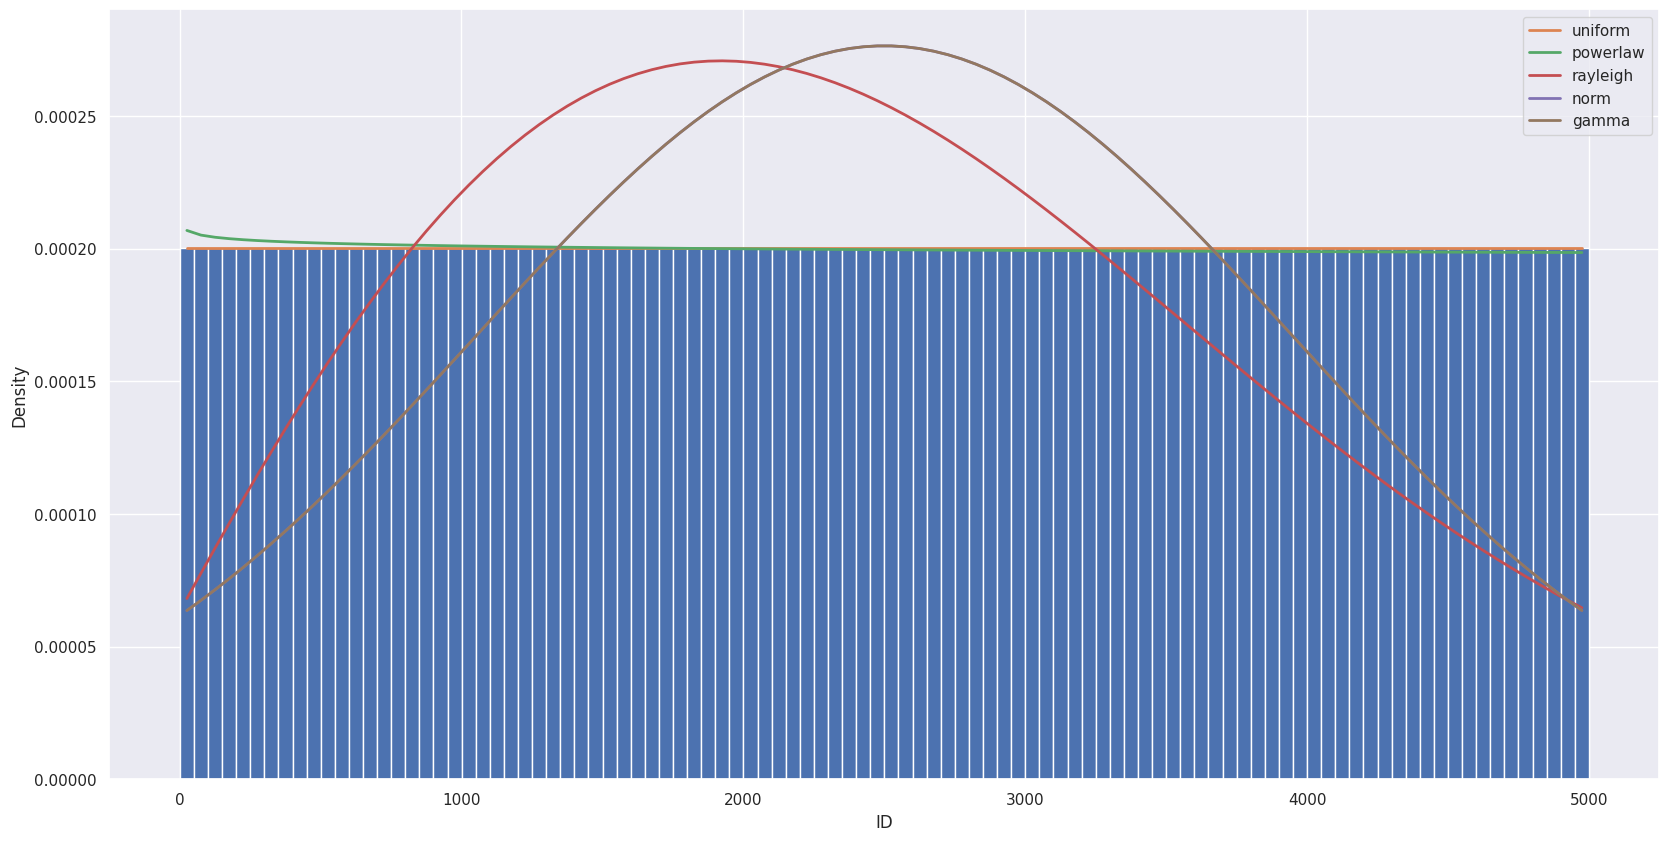

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  3.89it/s]


          sumsquare_error         aic           bic  kl_div  ks_statistic  \
powerlaw         0.073793  764.344798 -55592.851601     inf      0.068434   
exponpow         0.073879  786.783075 -55587.067384     inf      0.064643   
uniform          0.074379  760.837927 -55561.872524     inf      0.063364   
rayleigh         0.075522  794.861253 -55485.569289     inf      0.087866   
lognorm          0.076292  800.438103 -55426.360905     inf      0.072206   

             ks_pvalue  
powerlaw  8.353323e-21  
exponpow  1.312464e-18  
uniform   6.778587e-18  
rayleigh  4.899329e-34  
lognorm   4.094725e-23  


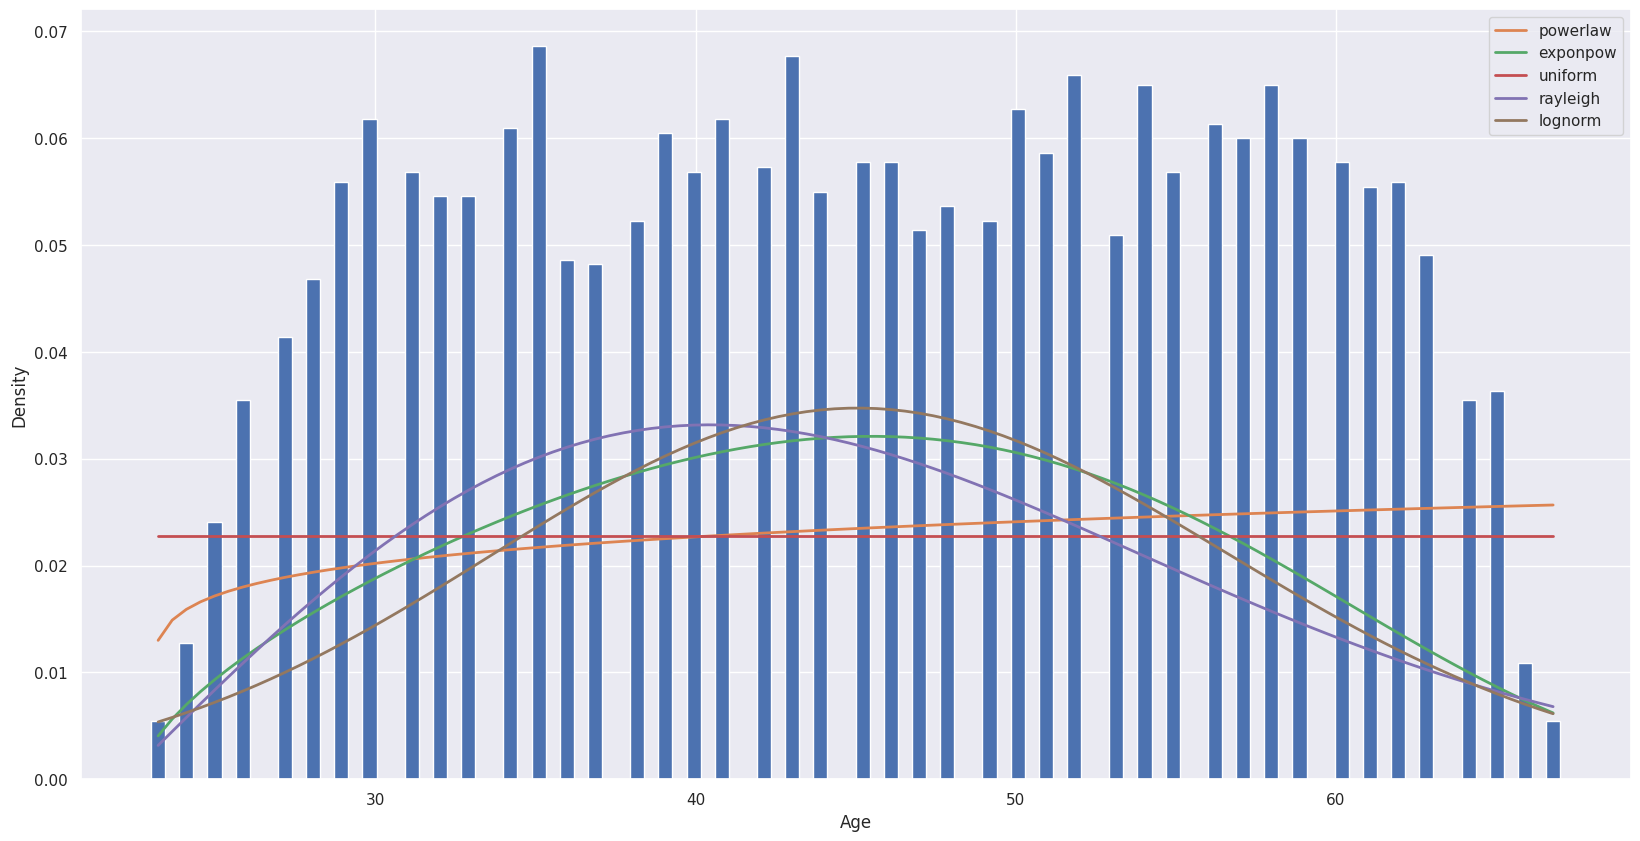

Fitting 10 distributions: 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]


          sumsquare_error         aic           bic  kl_div  ks_statistic  \
rayleigh         0.066403  807.568520 -56129.024597     inf      0.083004   
powerlaw         0.066924  773.641835 -56081.376369     inf      0.094196   
norm             0.067060  809.780292 -56079.805526     inf      0.068696   
gamma            0.067071  811.783857 -56070.429529     inf      0.068429   
lognorm          0.067113  811.870734 -56067.325467     inf      0.067486   

             ks_pvalue  
rayleigh  2.045087e-30  
powerlaw  4.623746e-39  
norm      5.824781e-21  
gamma     8.407721e-21  
lognorm   3.041239e-20  


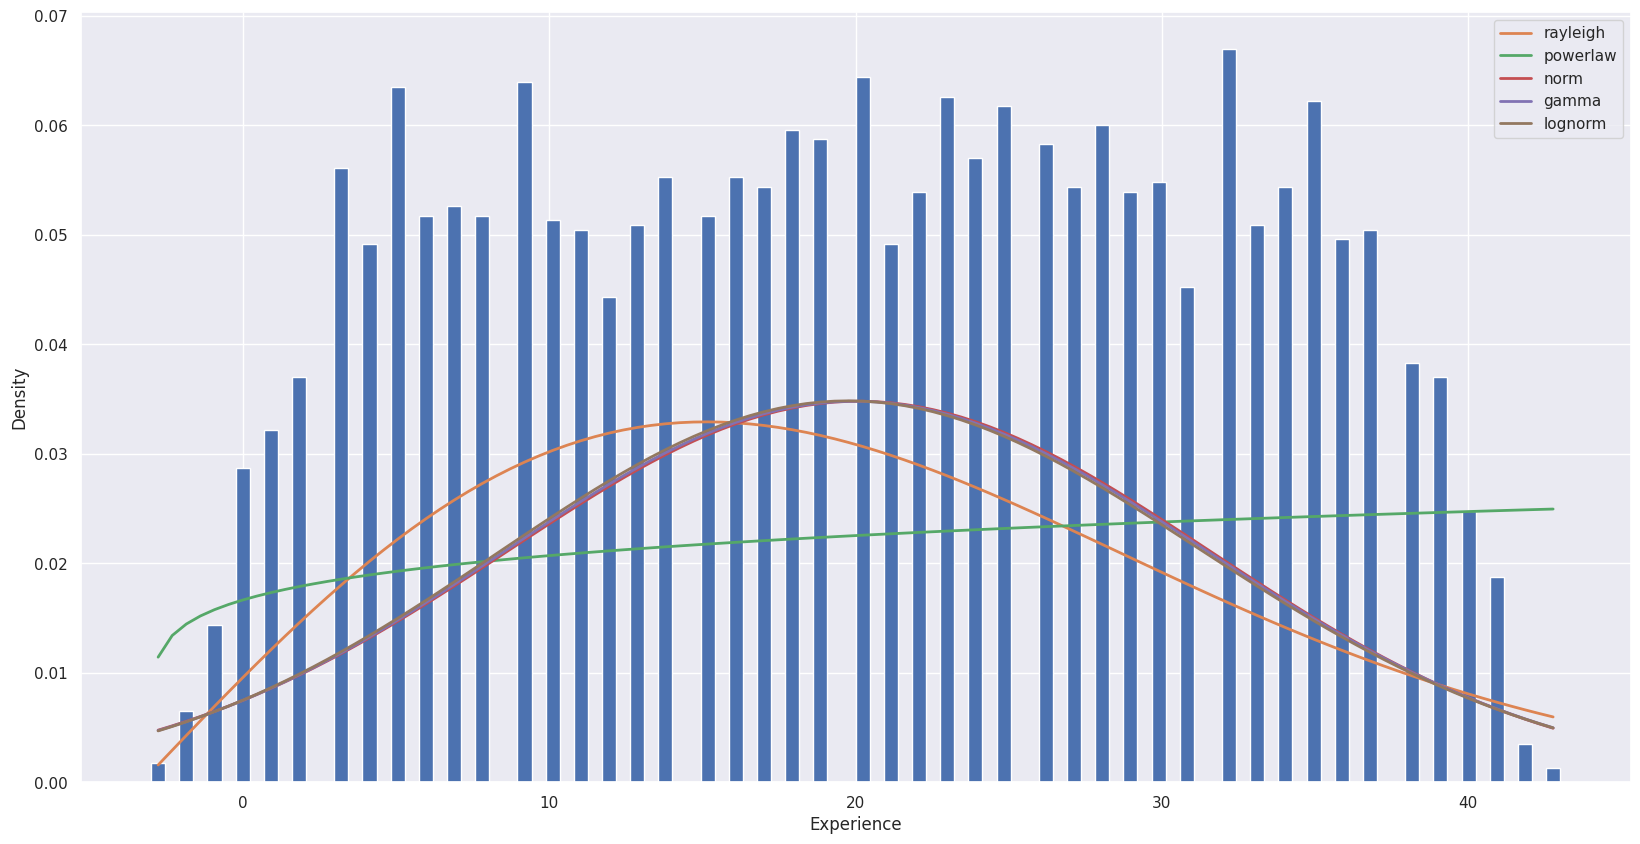

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
chi2             0.000719  1176.620972 -78746.686332     inf      0.035870   
gamma            0.000719  1176.621220 -78746.684569     inf      0.035871   
rayleigh         0.000889  1195.727547 -77695.465678     inf      0.098549   
norm             0.001105  1221.291695 -76609.002808     inf      0.098460   
cauchy           0.001131  1246.386774 -76491.667160     inf      0.150011   

             ks_pvalue  
chi2      5.027799e-06  
gamma     5.025790e-06  
rayleigh  1.011114e-42  
norm      1.204968e-42  
cauchy    1.086587e-98  


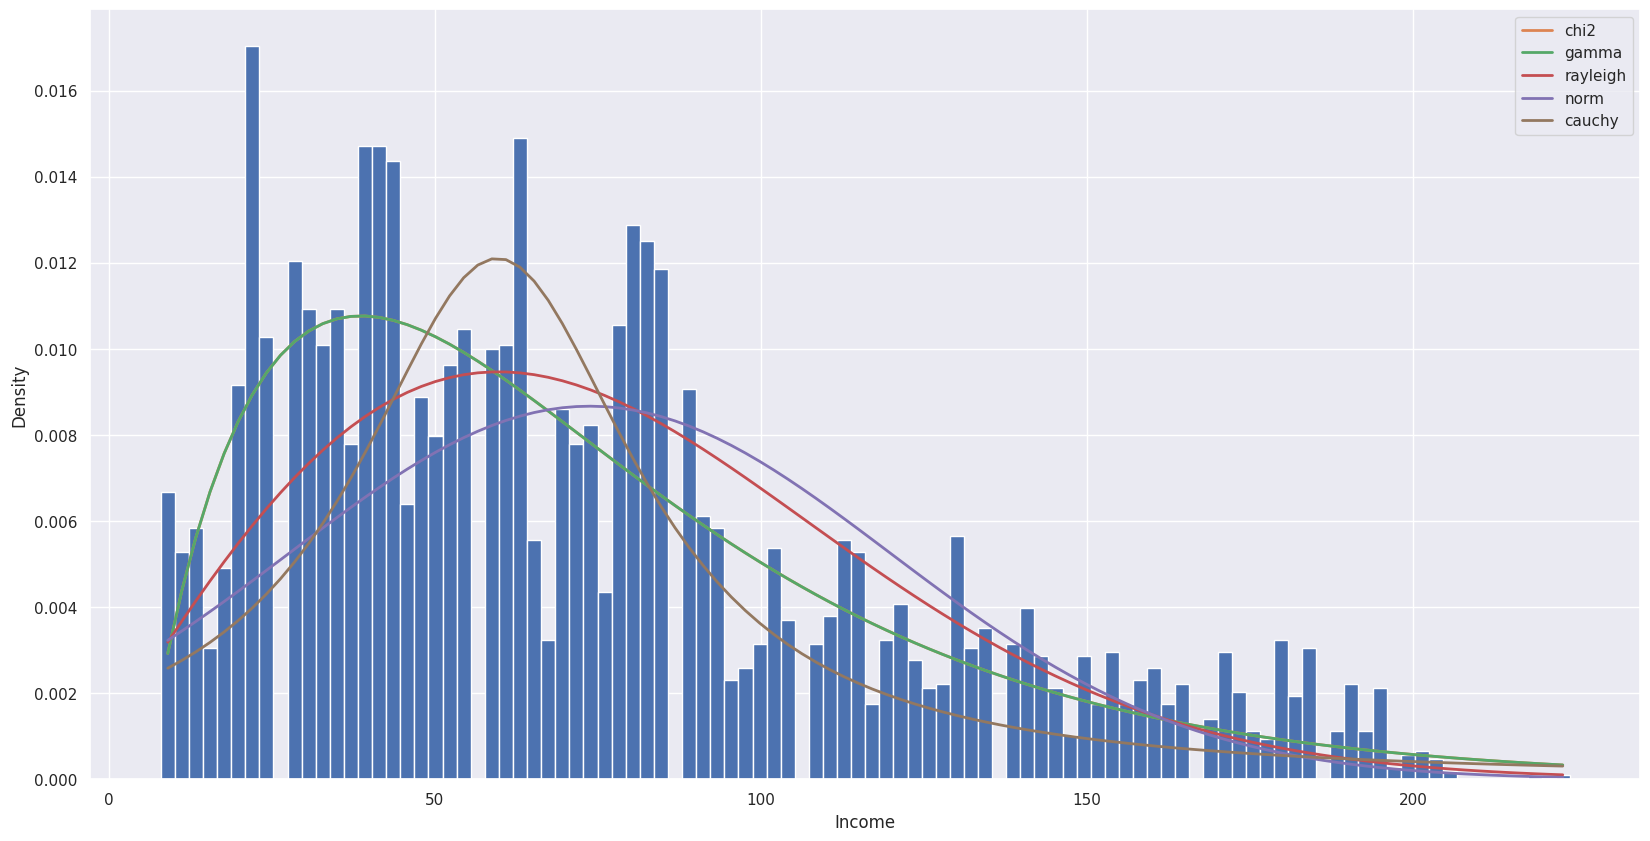

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]


          sumsquare_error           aic            bic  kl_div  ks_statistic  \
norm         4.035013e-08  5.169571e+04 -127697.287926     inf      0.127946   
chi2         5.097581e-08           inf -126519.987393     inf      0.163147   
cauchy       7.118975e-08  2.909124e+03 -124858.516568     inf      0.154513   
powerlaw     8.848432e-08  5.116718e+03 -123762.616521     inf      0.246742   
rayleigh     1.887115e-07  2.396117e+03 -119984.163632     inf      0.603567   

              ks_pvalue  
norm       8.153985e-72  
chi2      9.303312e-117  
cauchy    1.044252e-104  
powerlaw  1.367875e-268  
rayleigh   0.000000e+00  


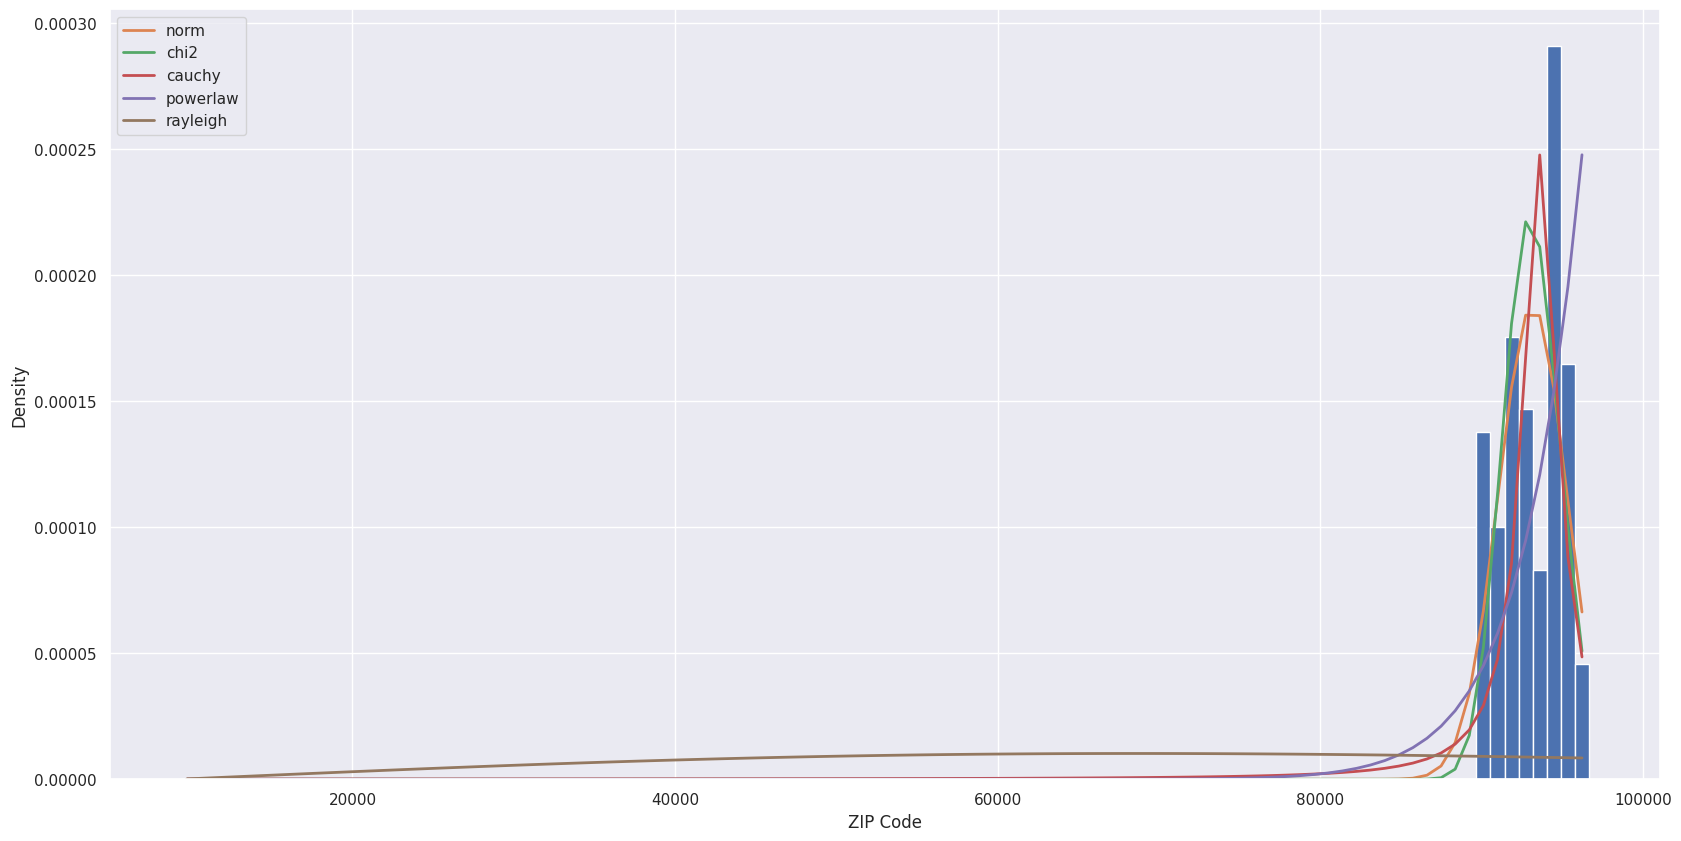

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]


          sumsquare_error         aic           bic  kl_div  ks_statistic  \
powerlaw       226.100274  532.301194 -15455.521432     inf      0.614531   
exponpow       231.679577  364.378891 -15333.637955     inf      0.378457   
chi2           250.193875  322.868317 -14949.233784     inf      0.305303   
lognorm        255.977971  786.806314 -14834.957435     inf      0.463635   
expon          270.811988  285.617655 -14561.807527     inf      0.294400   

          ks_pvalue  
powerlaw        0.0  
exponpow        0.0  
chi2            0.0  
lognorm         0.0  
expon           0.0  


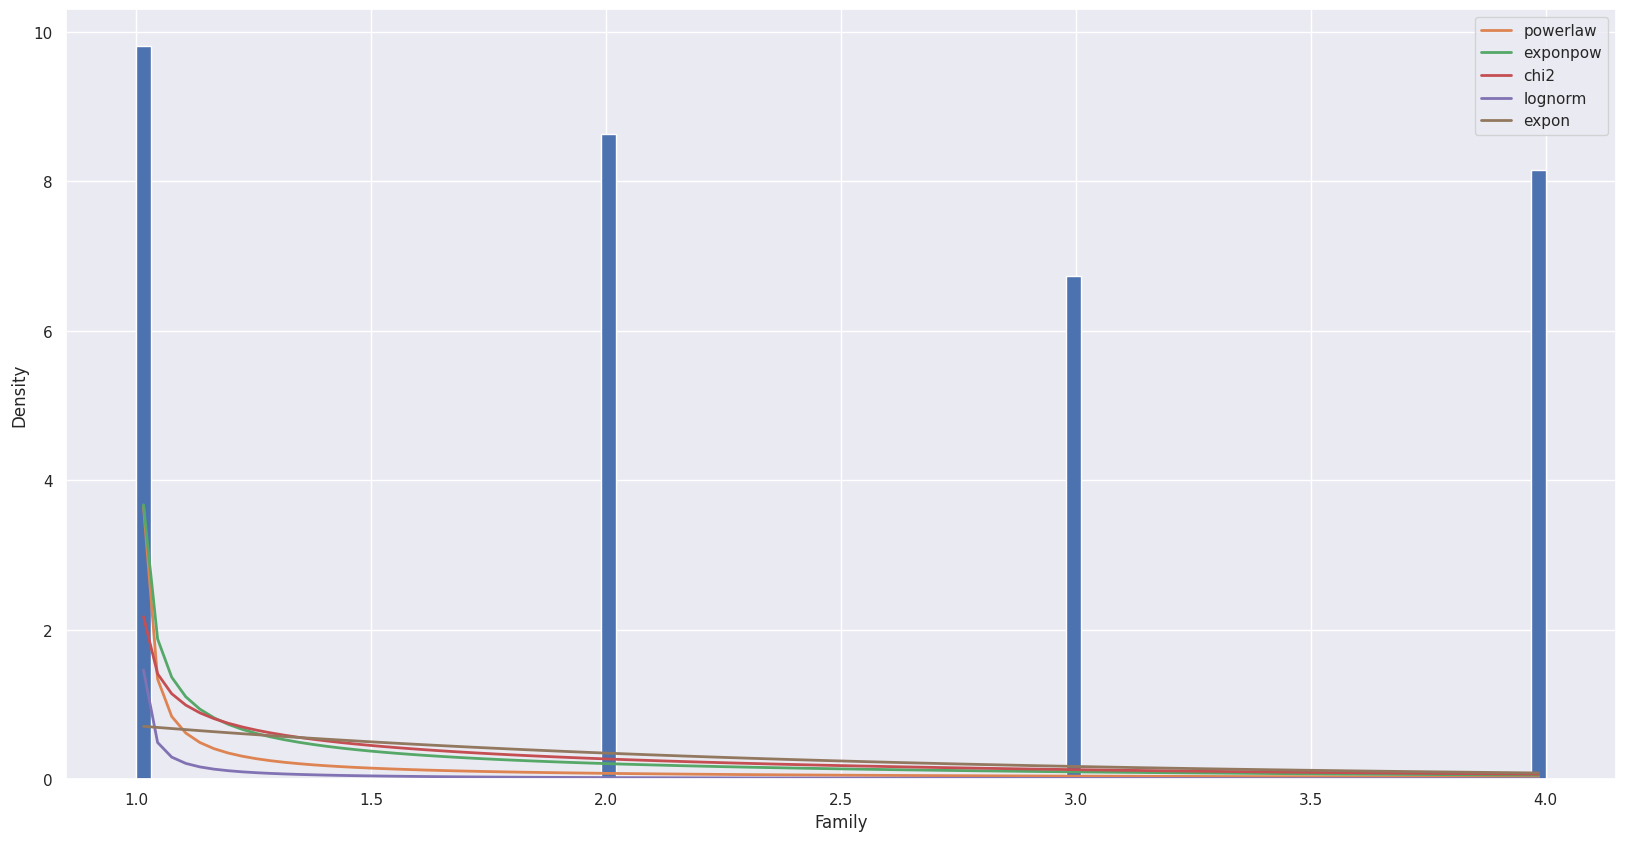

Fitting 10 distributions: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]


          sumsquare_error         aic           bic  kl_div  ks_statistic  \
gamma            1.353697  663.087943 -41046.218102     inf      0.060507   
expon            1.411090  652.337284 -40847.120719     inf      0.075909   
lognorm          1.419801  665.937568 -40807.830805     inf      0.069269   
exponpow         1.599150  650.764133 -40213.054190     inf      0.081164   
rayleigh         1.639774  819.734474 -40096.139388     inf      0.127480   

             ks_pvalue  
gamma     2.350417e-16  
expon     1.672122e-25  
lognorm   2.638969e-21  
exponpow  4.239556e-29  
rayleigh  2.704197e-71  


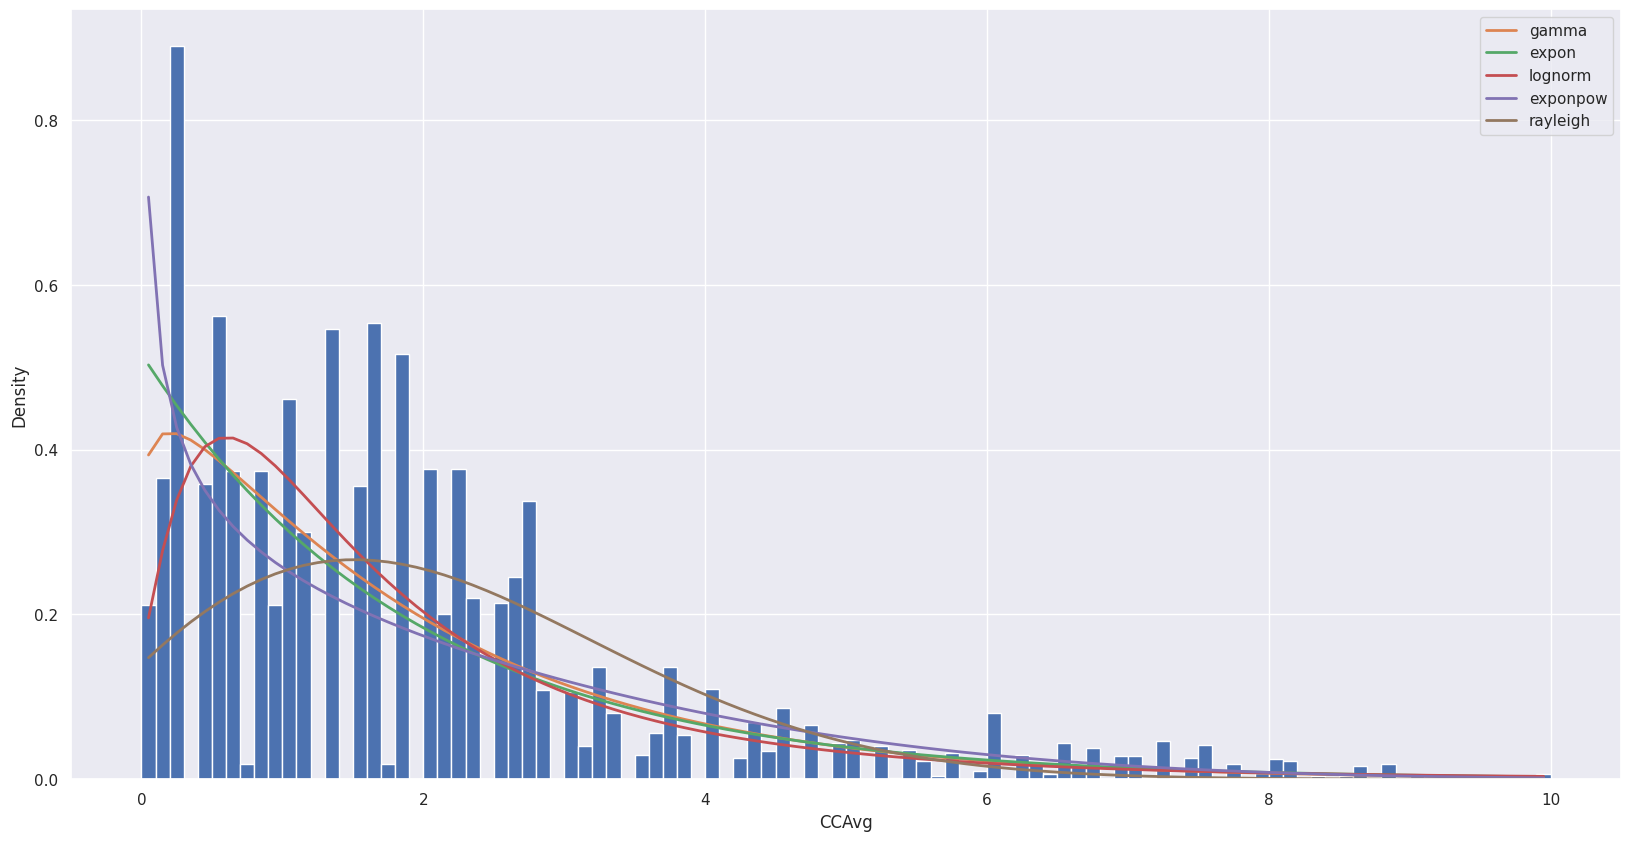

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]


          sumsquare_error         aic           bic  kl_div  ks_statistic  \
exponpow       660.441991  325.483616 -10095.867904     inf      0.419190   
lognorm        673.294746  523.747112  -9999.498418     inf      0.419200   
powerlaw       696.015983  510.945263  -9833.551258     inf      0.538103   
gamma          722.806645  310.266228  -9644.705616     inf      0.473876   
chi2           728.102489  256.038308  -9608.205278     inf      0.419200   

          ks_pvalue  
exponpow        0.0  
lognorm         0.0  
powerlaw        0.0  
gamma           0.0  
chi2            0.0  


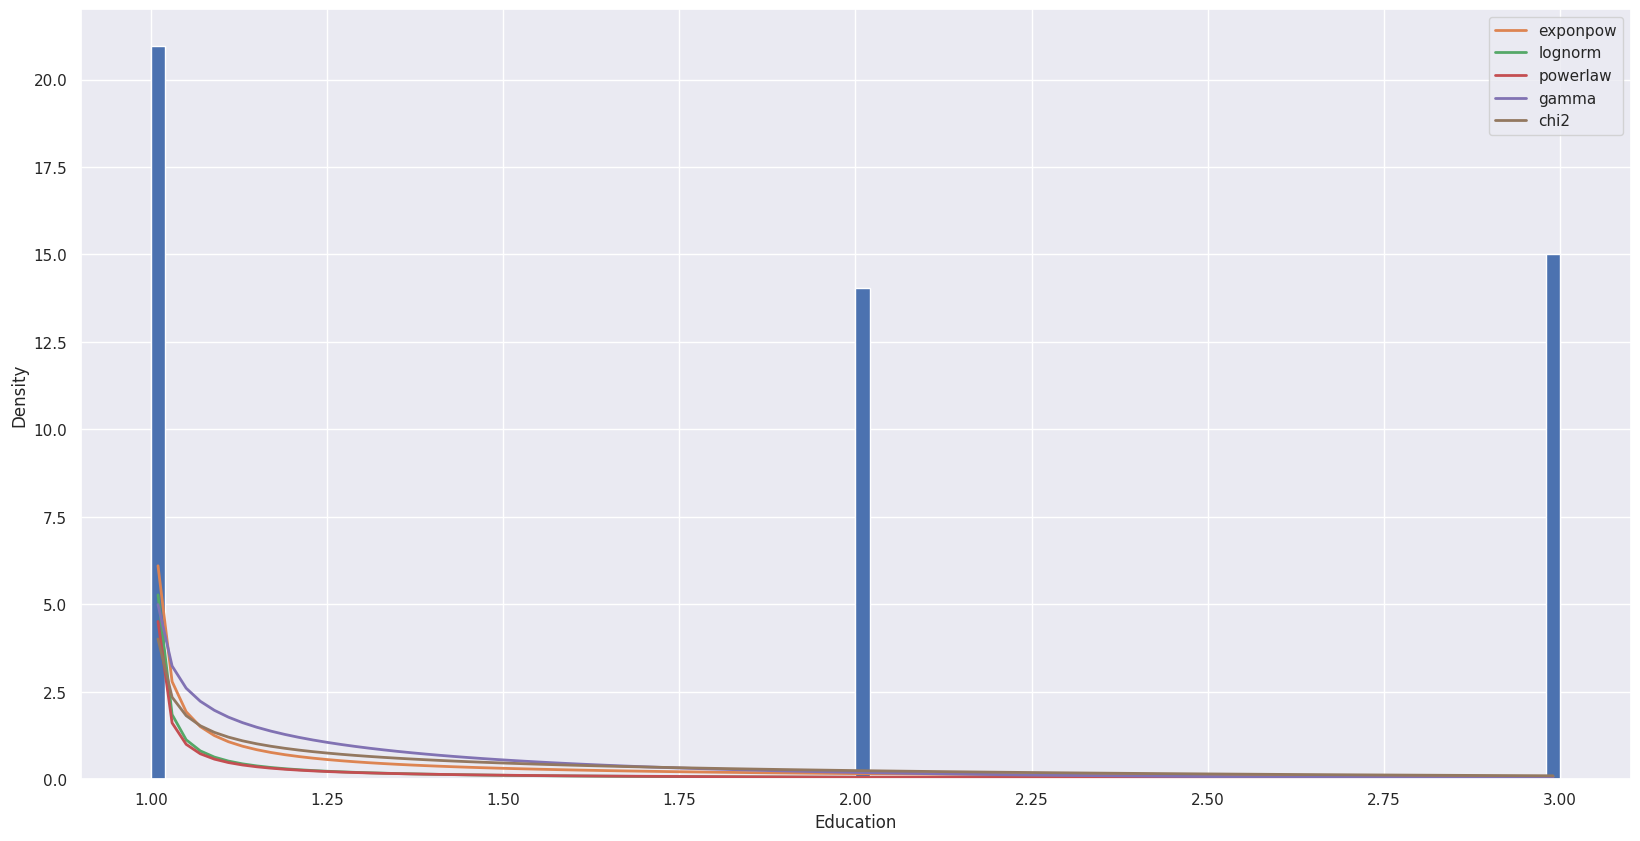

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
gamma            0.006151  1804.782230 -68015.841942     inf      0.692400   
chi2             0.009149  1449.139612 -66030.724773     inf      0.692400   
expon            0.009548  1934.761556 -65825.944023     inf      0.692400   
exponpow         0.009904  1677.570394 -65634.289514     inf      0.692400   
rayleigh         0.011212  2037.785403 -65022.689028     inf      0.477229   

          ks_pvalue  
gamma           0.0  
chi2            0.0  
expon           0.0  
exponpow        0.0  
rayleigh        0.0  


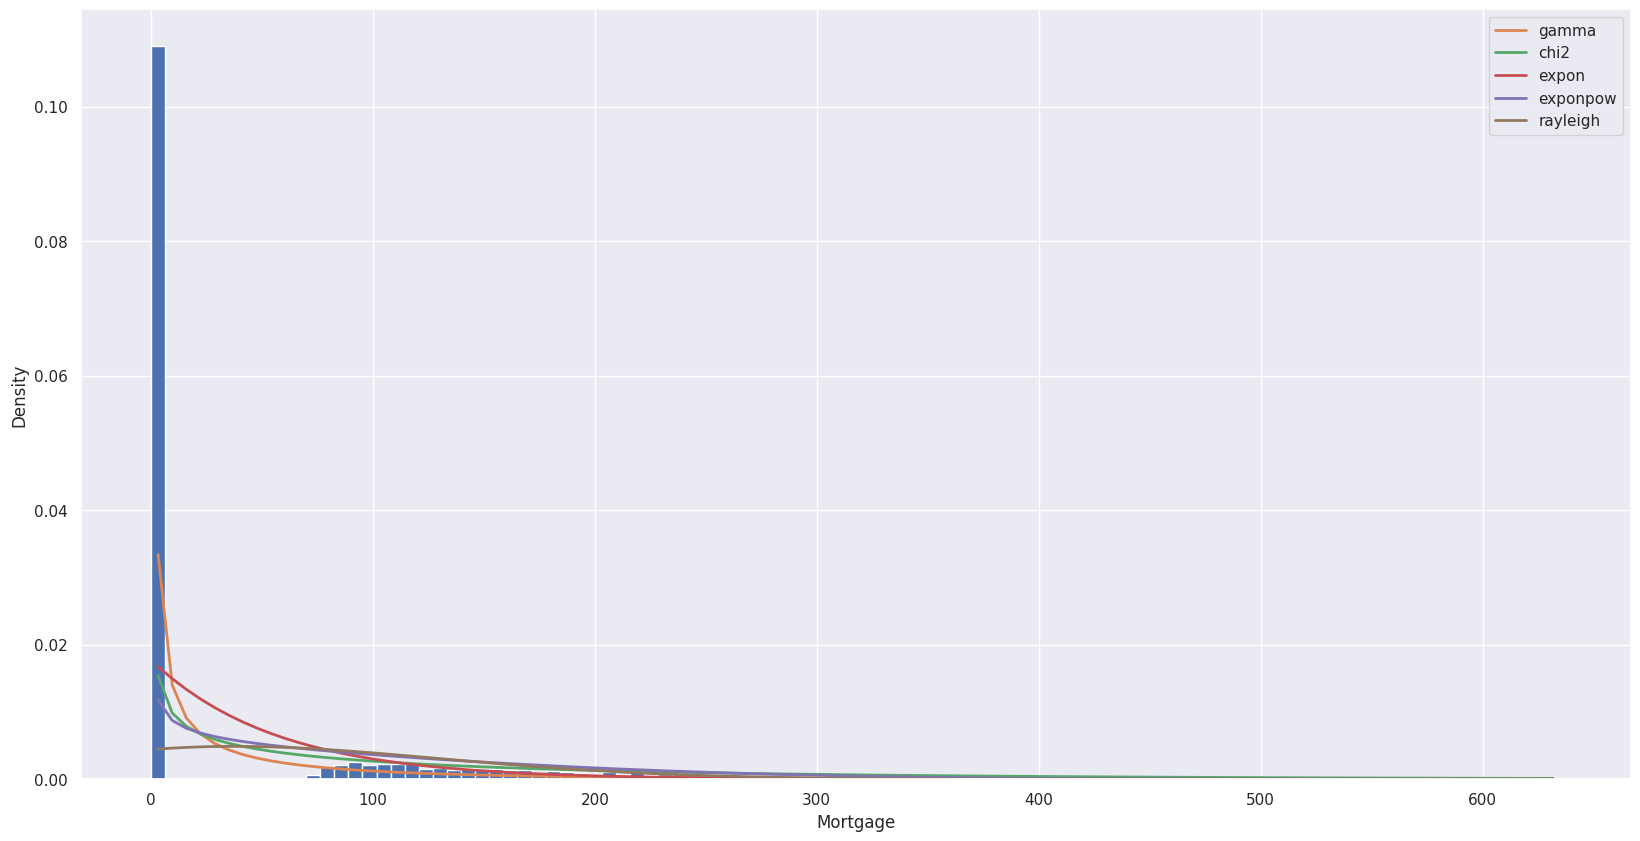

Fitting 10 distributions: 100%|██████████| 10/10 [00:03<00:00,  2.50it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      6144.975298  321.394369  1056.535633     inf      0.903948   
expon         6996.452604  576.985249  1696.861073     inf      0.904000   
gamma         7301.724016  100.012860  1918.914452     inf      0.904000   
chi2          7437.731281   93.940850  2011.191353     inf      0.904000   
rayleigh      8041.133549  241.472523  2392.695134     inf      0.612443   

          ks_pvalue  
exponpow        0.0  
expon           0.0  
gamma           0.0  
chi2            0.0  
rayleigh        0.0  


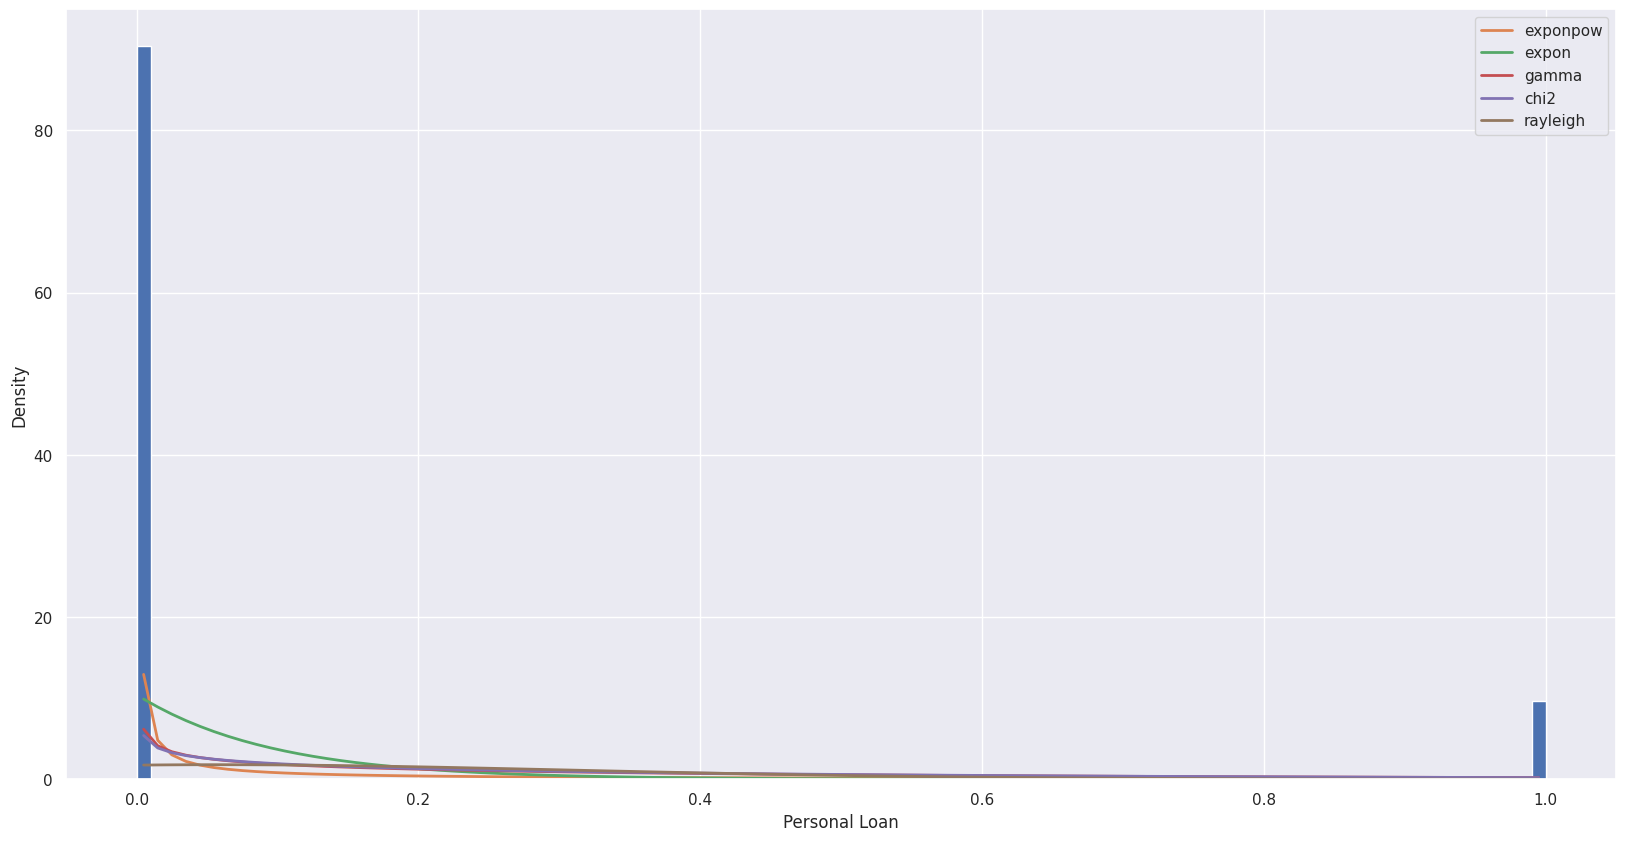

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.20it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma         5777.760568  238.864297   748.442830     inf      0.895599   
exponpow      5792.054744  565.630211   760.797551     inf      0.895451   
expon         6972.692836  509.949285  1679.852308     inf      0.895600   
chi2          7331.500897   92.704695  1939.263296     inf      0.895600   
rayleigh      7920.563772  217.904595  2317.156757     inf      0.608817   

          ks_pvalue  
gamma           0.0  
exponpow        0.0  
expon           0.0  
chi2            0.0  
rayleigh        0.0  


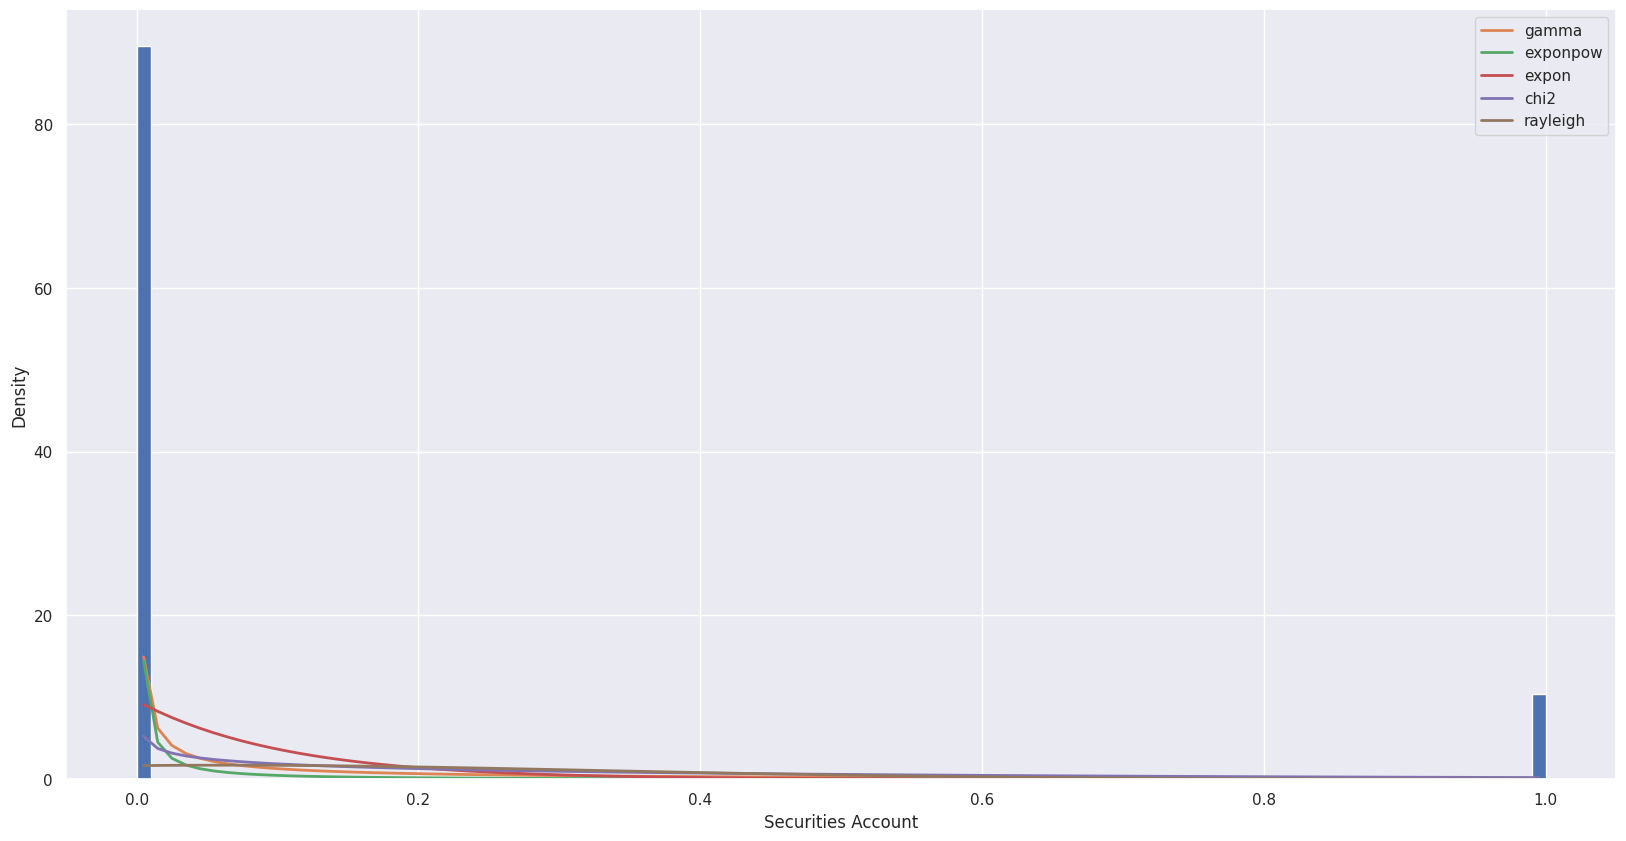

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.30it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon         6824.931952  1098.275904  1572.756677     inf      0.939600   
gamma         6870.357794   162.651945  1614.442945     inf      0.939600   
chi2          7983.536936   104.201497  2365.269709     inf      0.939600   
exponpow      8168.263760   608.924319  2479.643878     inf      0.844947   
rayleigh      8555.753972   427.489938  2702.865003     inf      0.625531   

          ks_pvalue  
expon           0.0  
gamma           0.0  
chi2            0.0  
exponpow        0.0  
rayleigh        0.0  


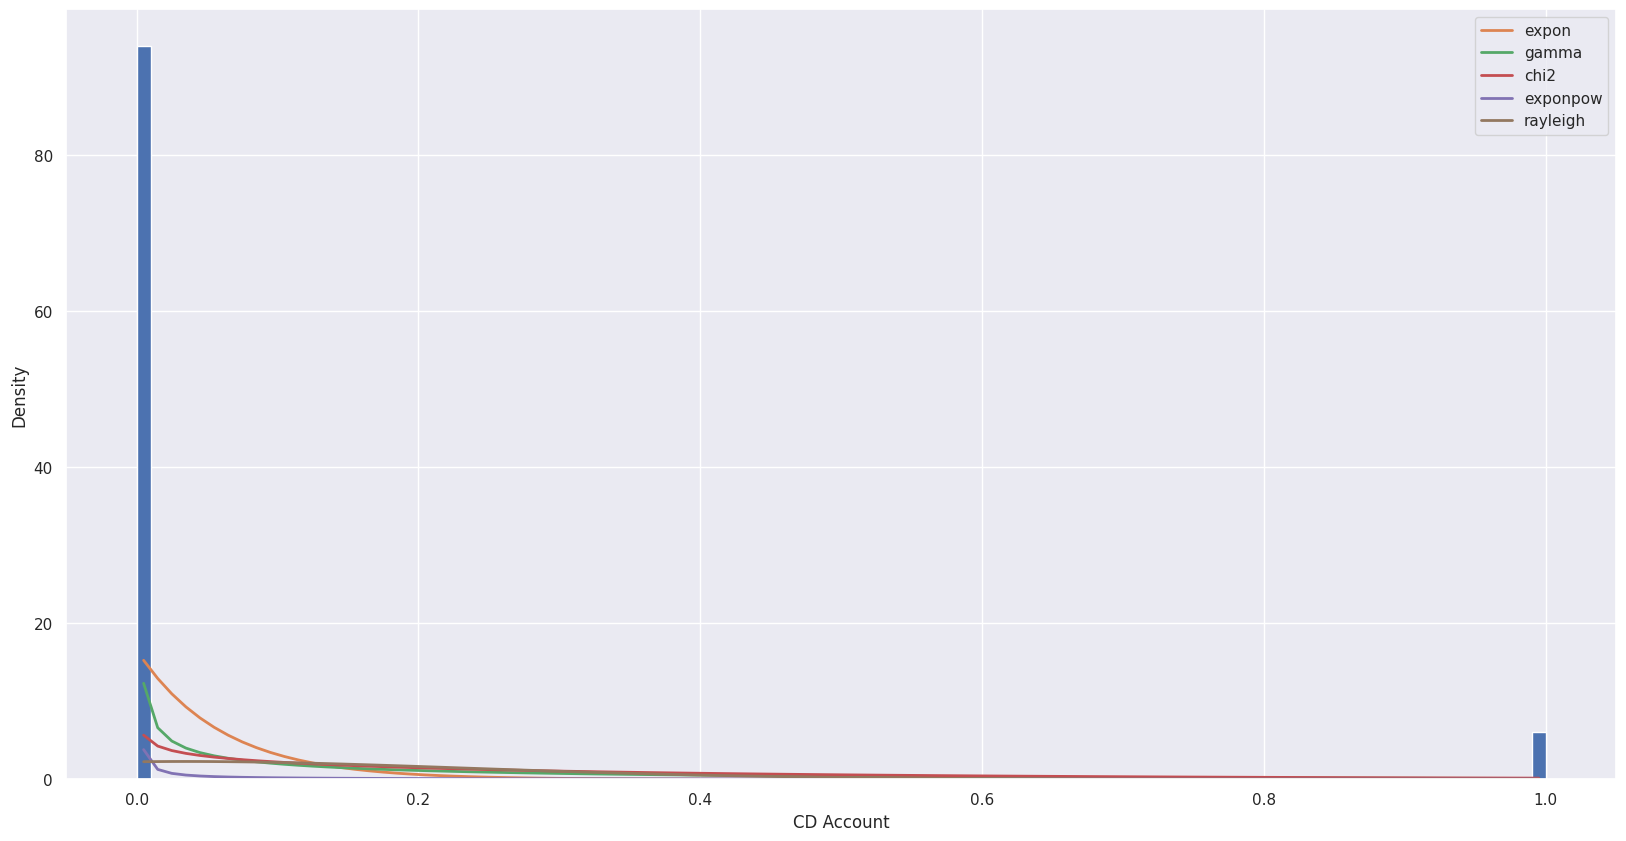

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.98it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow      4418.029398  245.645207 -593.169187     inf      0.403200   
lognorm       4625.166133  438.959729 -364.076527     inf      0.434062   
chi2          5072.525349  107.982004   97.555967     inf      0.403200   
uniform       5087.404800    4.000000  103.684015     inf      0.596800   
expon         5096.497992   68.325676  112.613002     inf      0.409605   

          ks_pvalue  
exponpow        0.0  
lognorm         0.0  
chi2            0.0  
uniform         0.0  
expon           0.0  


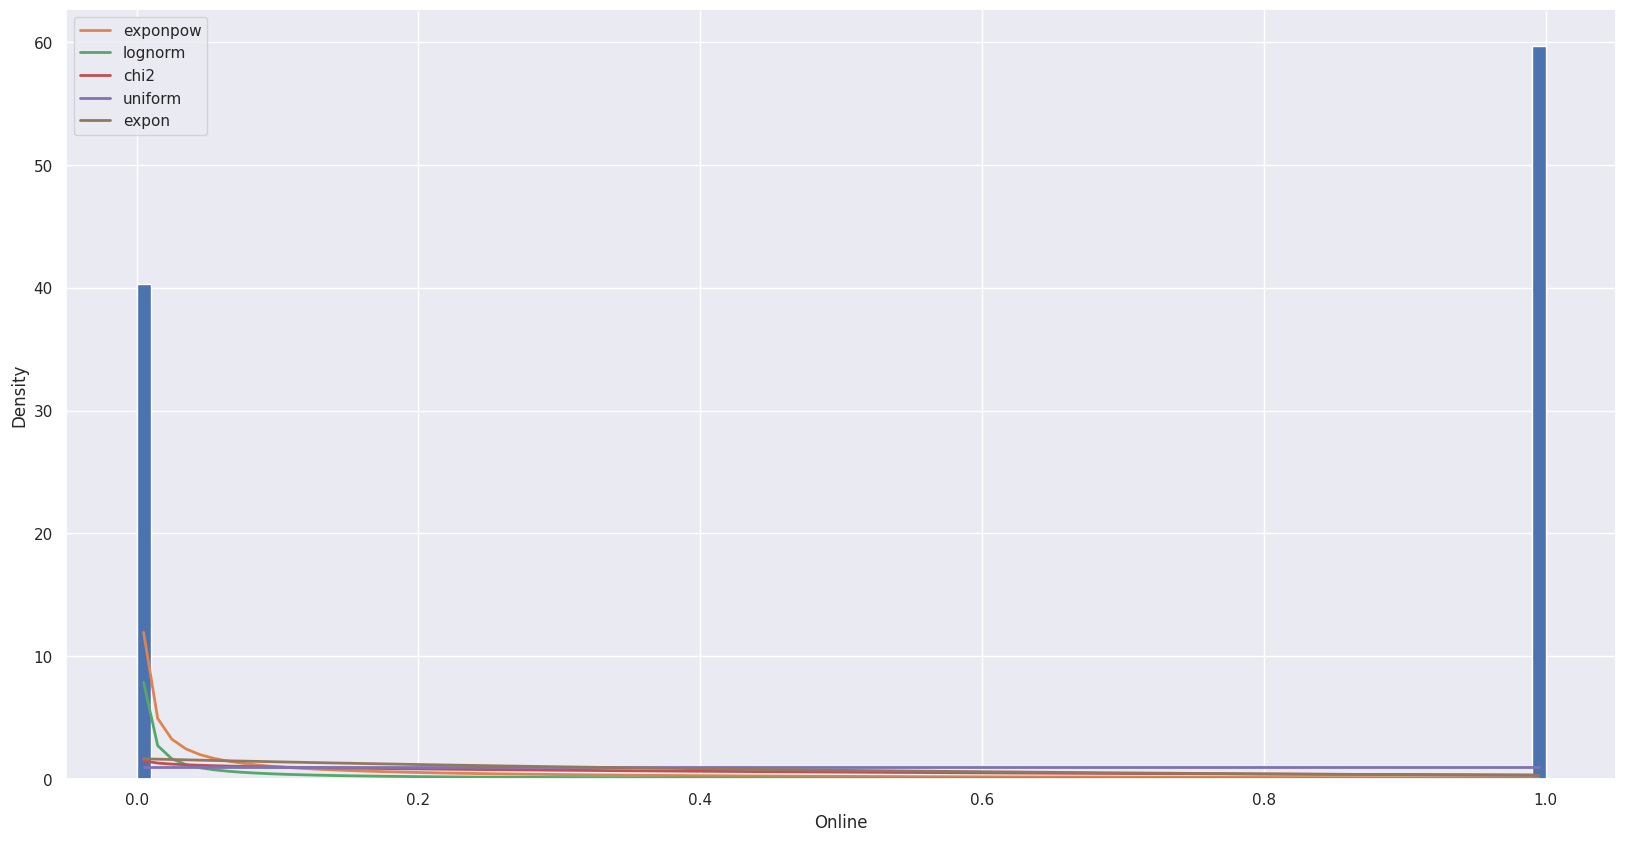

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.25it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow      4244.437936  264.994177 -793.590958     inf      0.705999   
gamma         4786.836651  227.271996 -192.289051     inf      0.706000   
chi2          4957.388451  112.786232  -17.242582     inf      0.706000   
expon         5539.613185   99.300952  529.468205     inf      0.706000   
uniform       5748.720000    4.000000  714.730931     inf      0.706000   

          ks_pvalue  
exponpow        0.0  
gamma           0.0  
chi2            0.0  
expon           0.0  
uniform         0.0  


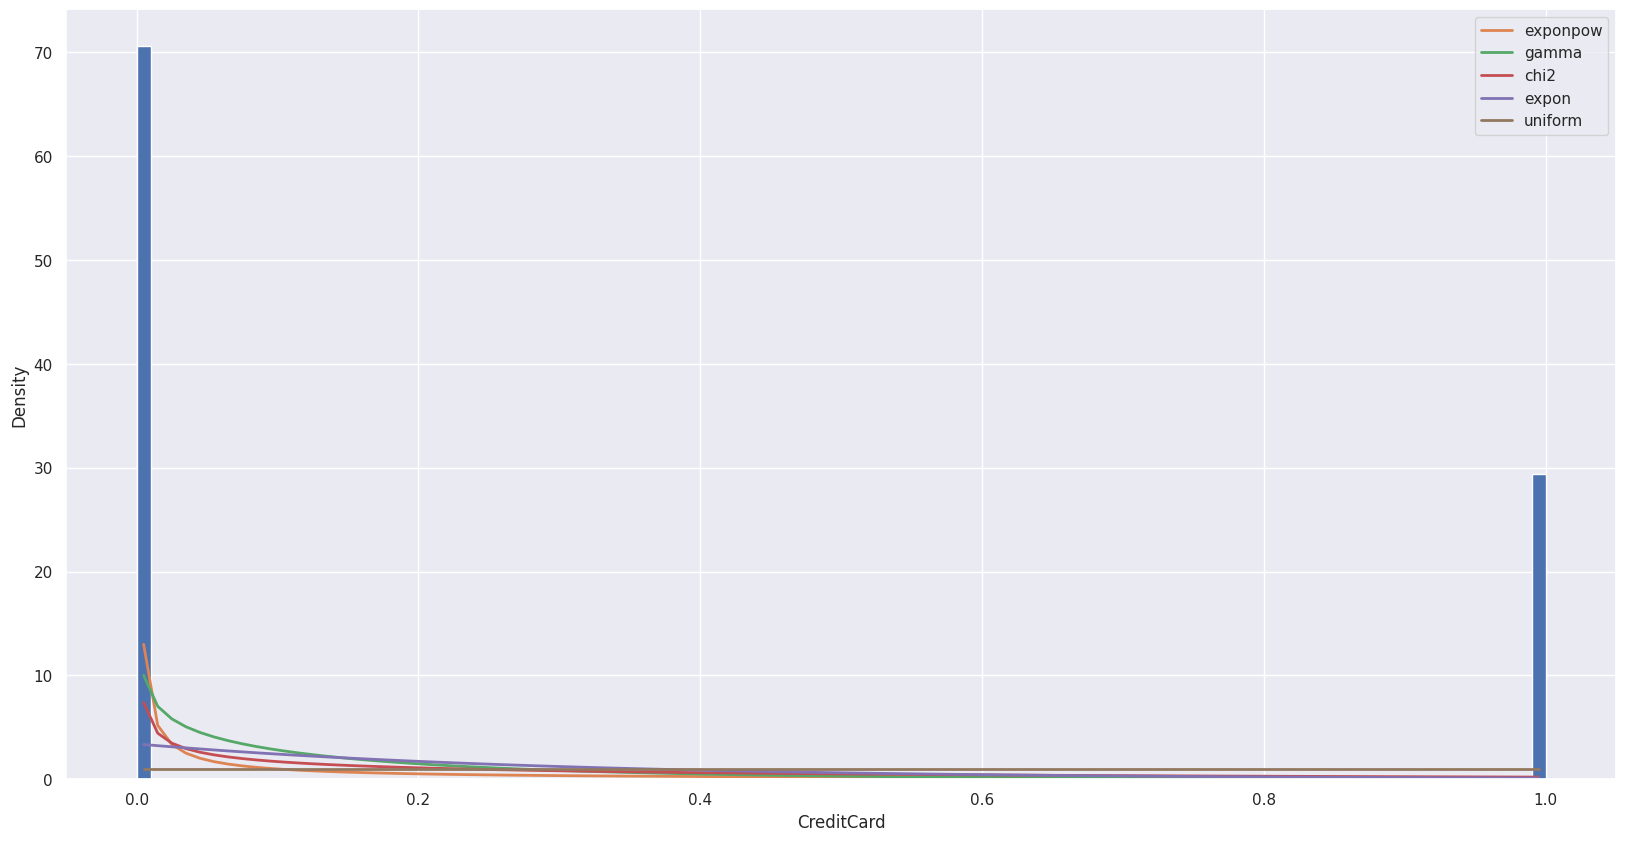

In [64]:
plt.rcParams["figure.figsize"] = (20, 10)
for i in df.columns:
    values = df[i].values
    f = Fitter(values, distributions=get_common_distributions())
    f.fit()
    print(f.summary())
    plt.ylabel("Density")
    plt.xlabel(i)
    plt.show()

<Axes: >

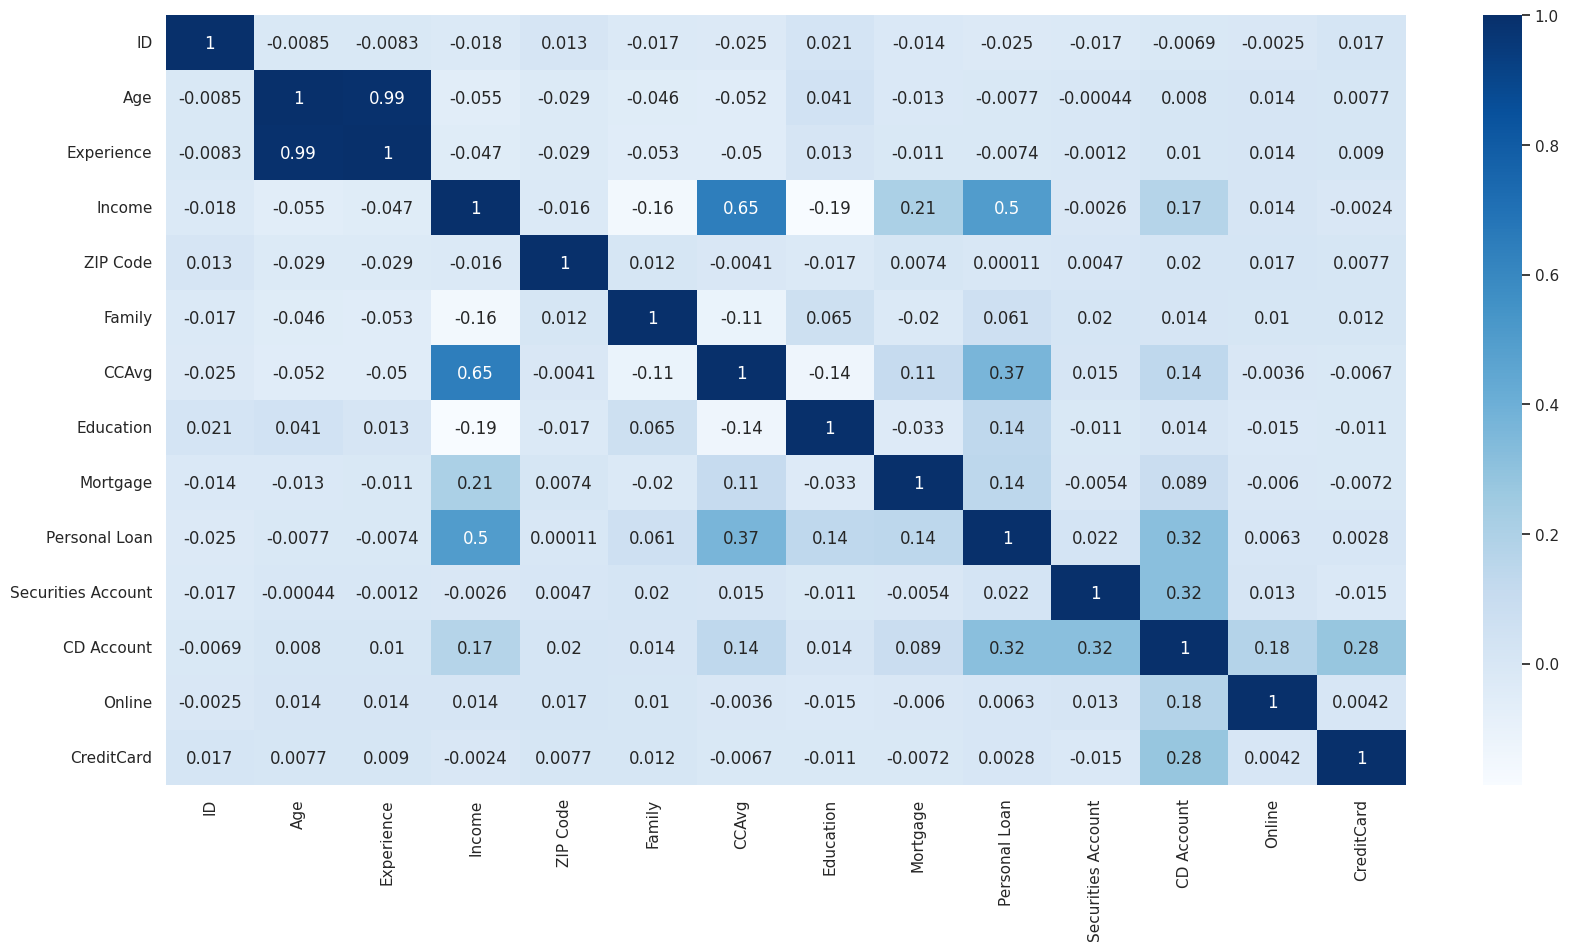

In [65]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(
    df.corr(), annot=True, cmap="Blues"
)  # Heatmap showing correlation between the attributes

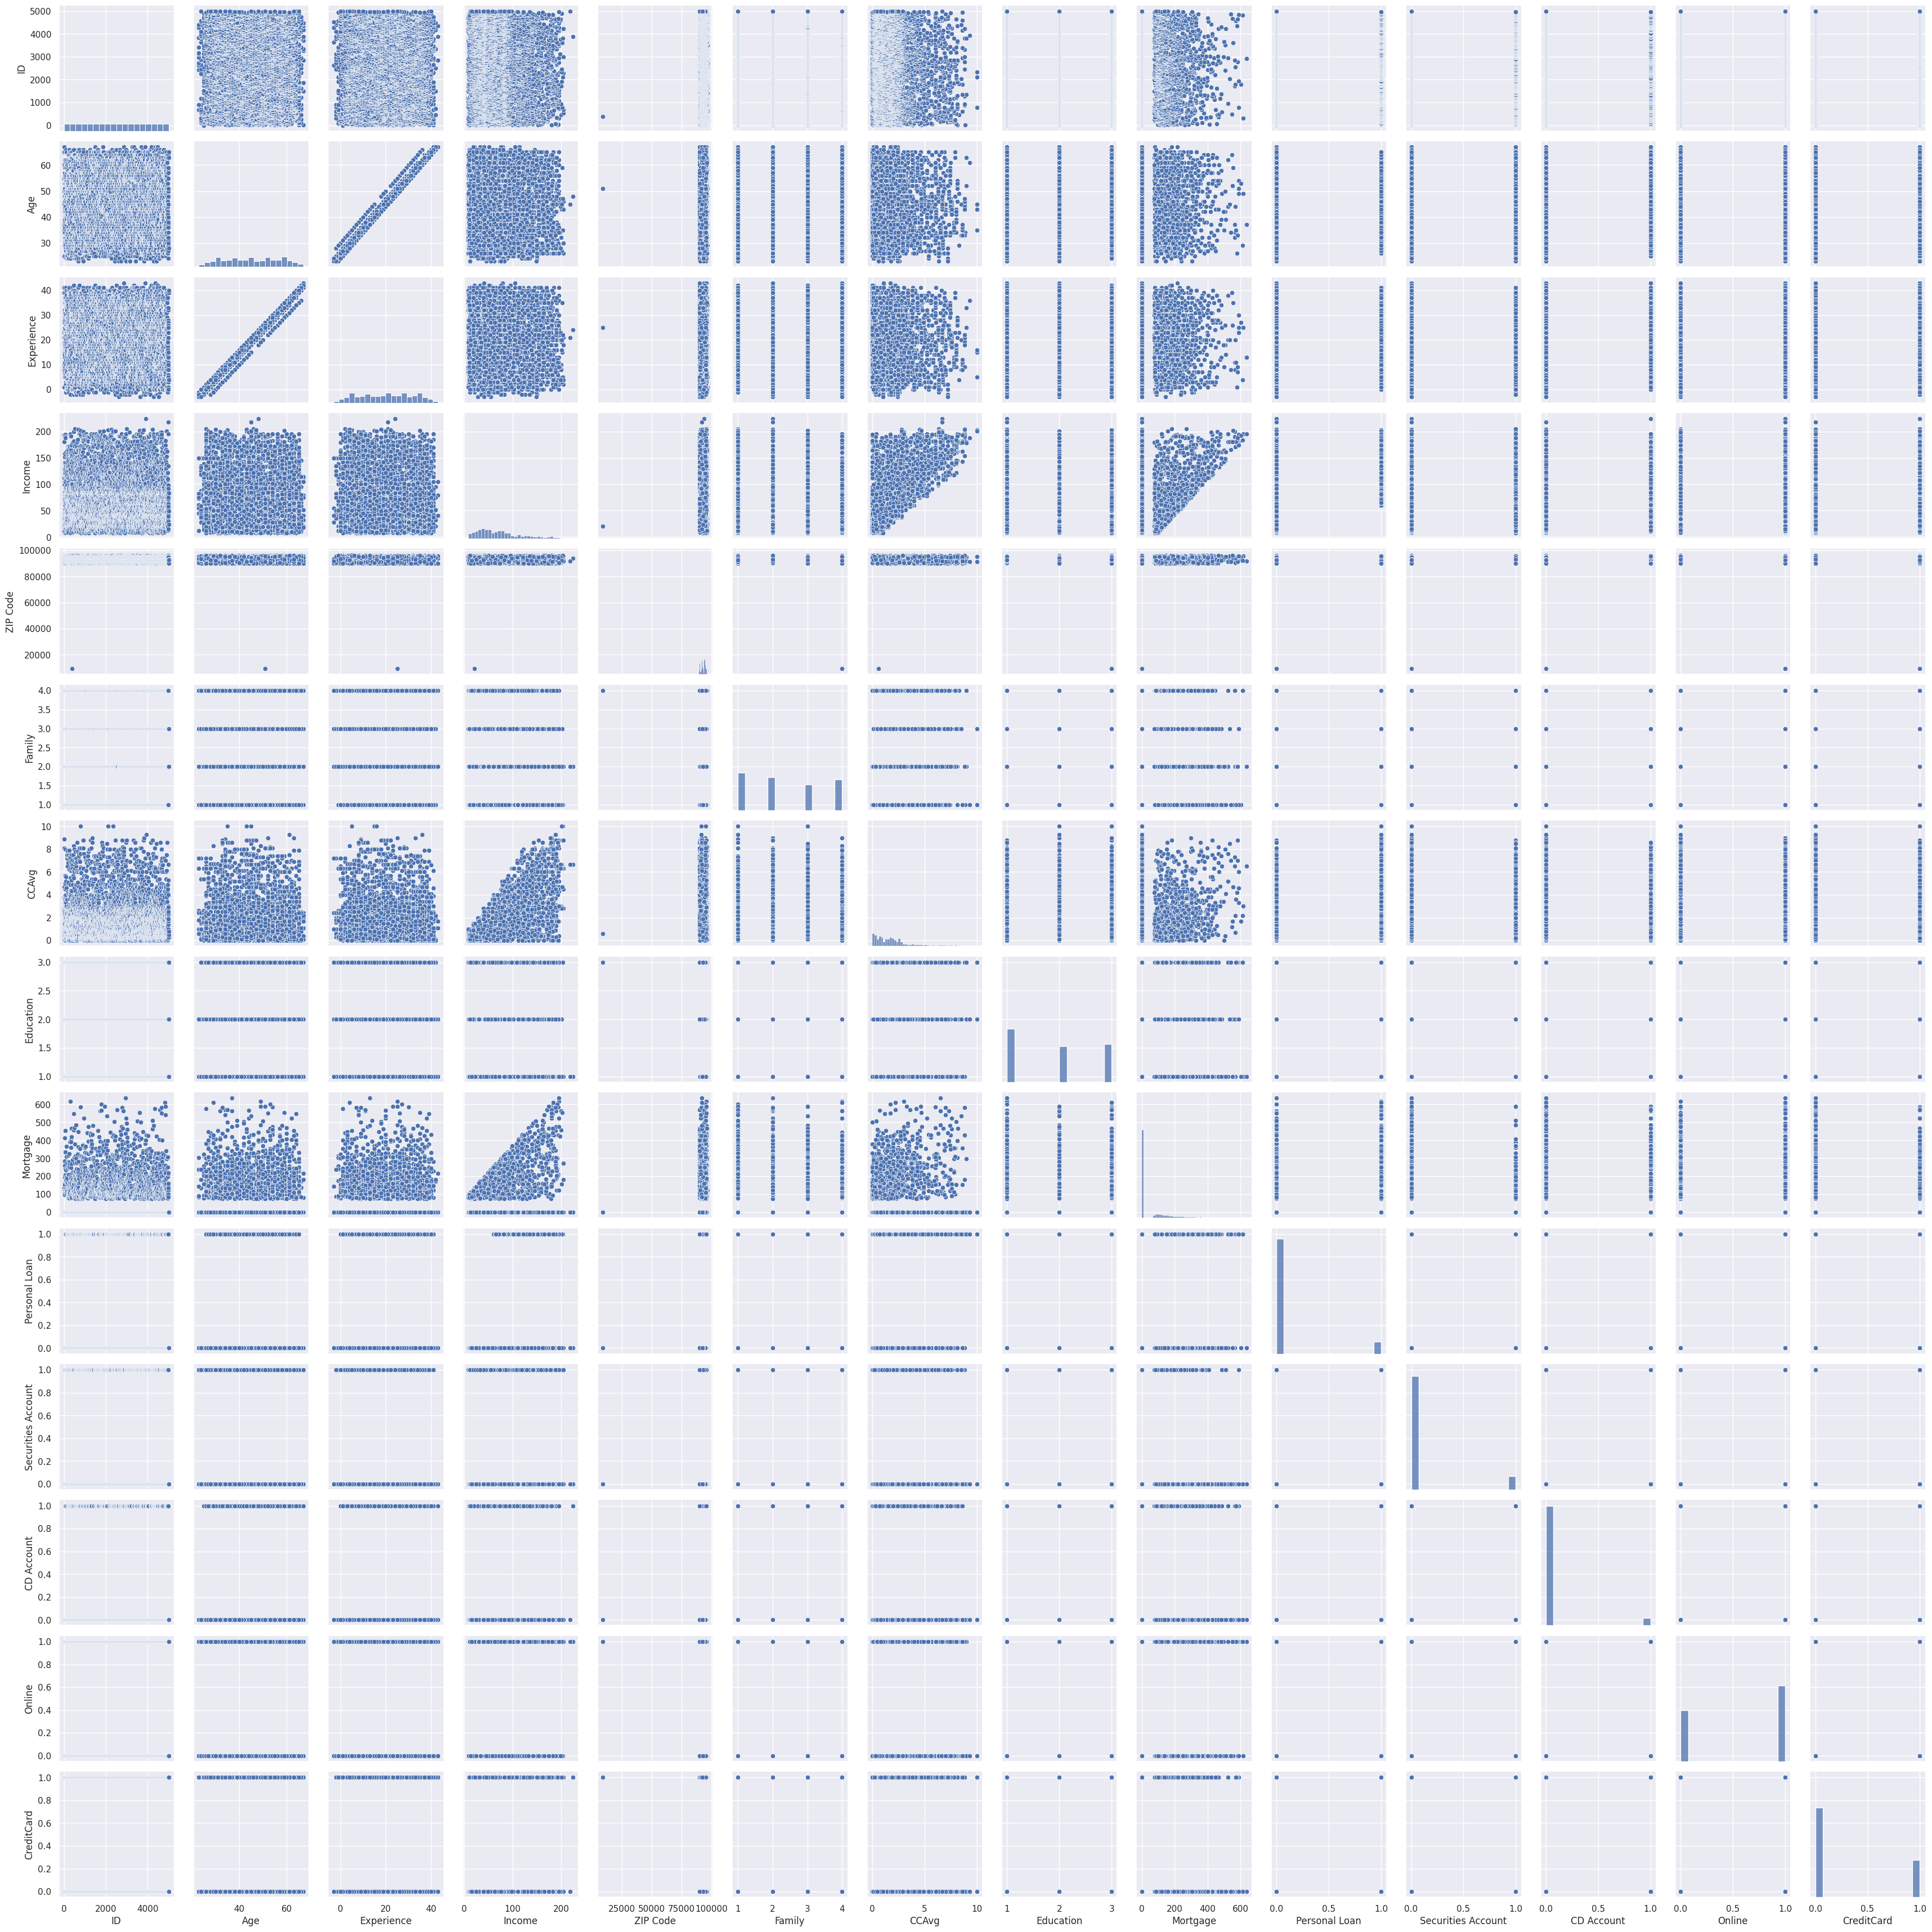

In [66]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(df)

In [67]:
import pandas as pd



# Rename the columns by replacing spaces with underscores
df = df.rename(columns={'ZIP Code': 'ZIP_Code'})

# Print the updated column names
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [68]:
import pandas as pd



# Rename the columns by replacing spaces with underscores
df = df.rename(columns={'Personal Loan': 'Personal_Loan'})

# Print the updated column names
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [69]:
import pandas as pd



# Rename the columns by replacing spaces with underscores
df = df.rename(columns={'Securities Account': 'Securities_Account'})

# Print the updated column names
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [70]:
import pandas as pd



# Rename the columns by replacing spaces with underscores
df = df.rename(columns={'CD Account': 'CD_Account'})

# Print the updated column names
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


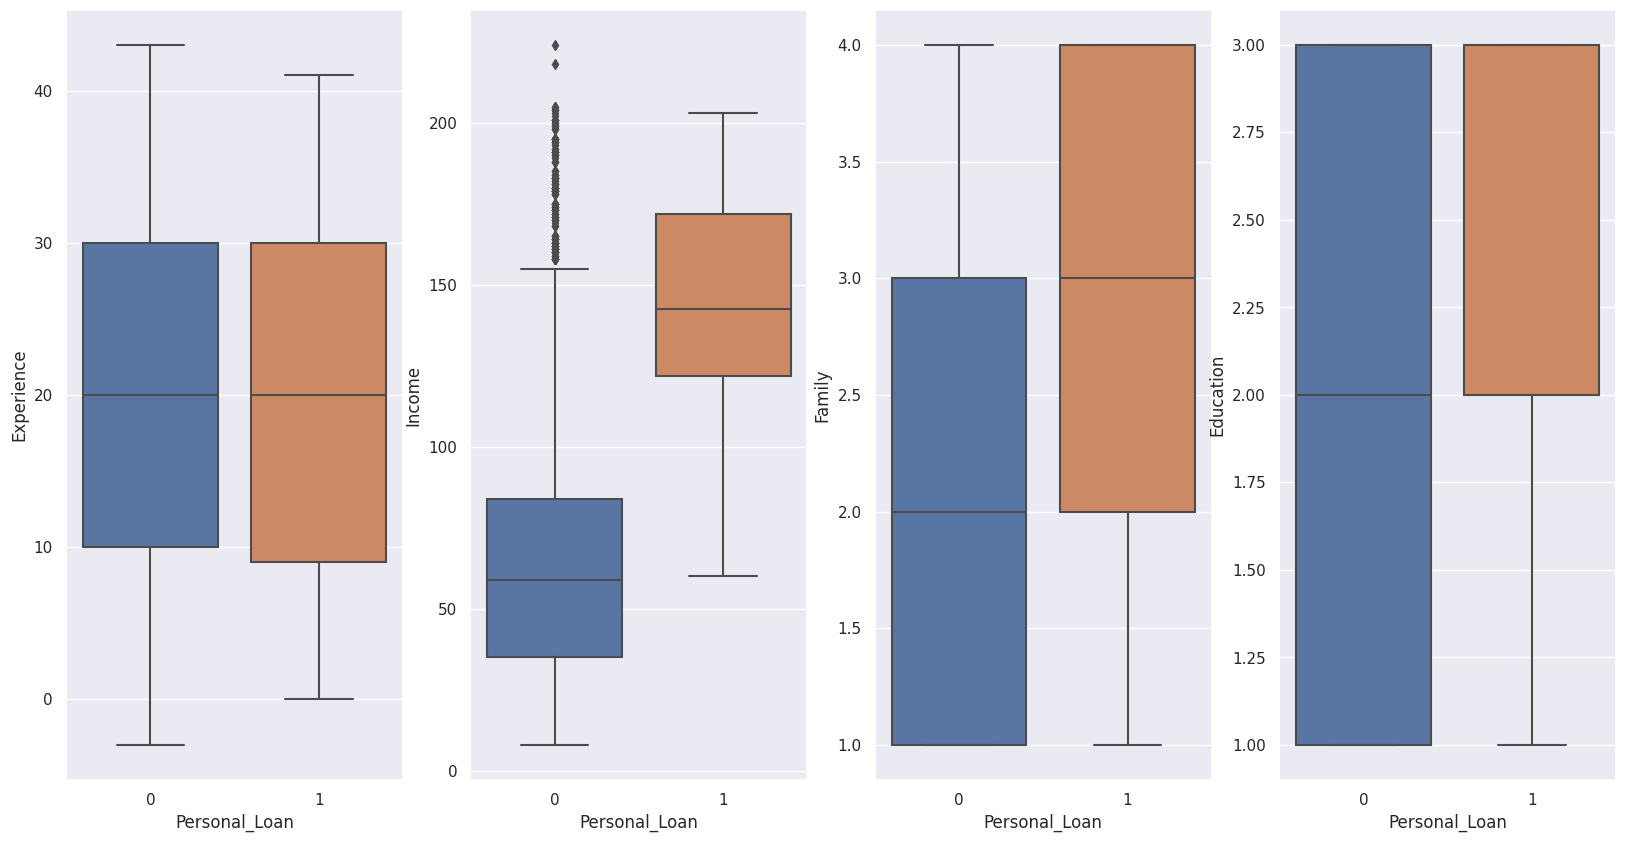

In [71]:
names = df[
    [
        "Experience",
        "Income",
        "Family",
        "Education",
        "Personal_Loan",
    ]
].columns.drop("Personal_Loan")
ncols = len(names)
fig, axes = plt.subplots(1, ncols)
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(
        y=name,
        x="Personal_Loan",
        data=df[
    [
        "Experience",
        "Income",
        "Family",
        "Education",
        "Personal_Loan",
    ]
        ],
        orient="v",
        ax=ax,
    )
plt.rcParams["figure.figsize"] = (12, 16)

# **What kind of data exploration did you do?**


Preliminary findings from the EDA.

Datatype Check - All the features in the dataset are Integers/ Float.

Missing Data Check - Our Dataset Didn't had any missing values in any of the features.

Distribution of training data - I checked the probability distribution of each and every feature in the training dataset

Correlation Check - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that the didn't had any significant multi colinearity issues.

Barplot - Performed Barplot analysis to findout how a variable impacts the Personal Loan.


The above graphs are a cohesive representation of how Personal Loan is changing w.r.t. all the significant variables



A few findings which we can interpret from the above graph as:

Personal Loan increase as the Experience increases


Personal Loan increase as the Income 
decrease


Personal Loan increase as the Family decreases


Personal Loan increase as the level of Education increase


These are the preliminary findings about how the individual parameters are affecting the Personal Loan.


**Data Cleaning**


This dataset was relatively cleaner with no missing values. But handing missing values is one of the most important tasks in any Data Science project.
Handling Missing Data
In any ML modeling task, one of the very important task is to check if we have any missing values in our dataset. If there are missing values in the dataset it can horribly change the results and make our model inefficient.


But there are ways to tackle this problem, we will discuss these methods in a bit detail below


**How to handle missing data - **

Data Imputation techniques
Delete rows with missing data

Fill the missing data points by either mean/mode/median
Model a regression with rest of the feature as input and the missing value as the target i.e. MICE Imputation
Our dataset doesn't have any missing values, lets deliberately create some missing values and have a comparative analysis of how effectively each method is recovering the data back.


We will remove 1%, 5% and 10% of the data from alcohol in our dataset and see how well Mean Imputation and MICE imputation will recover the data back



In [72]:
df_imputation = df.copy()
# Creating three extra coloumns of Alcohol for performing Data Imputation techniques
df_imputation["Income_1_percent"] = df_imputation[["Income"]]
df_imputation["Income_5_percent"] = df_imputation[["Income"]]
df_imputation["Income_10_percent"] = df_imputation[["Income"]]

In [73]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


# Modified function to impute data using mean imputation
def mean_impute(train_df):
    mm_impute_train_df = train_df.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["Income_1_percent"] = mm_impute_train_df[
        "Income_1_percent"
    ].fillna(mm_impute_train_df["Income"].mean())
    mm_impute_train_df["Income_5_percent"] = mm_impute_train_df[
        "Income_5_percent"
    ].fillna(mm_impute_train_df["Income"].mean())
    mm_impute_train_df["Income_10_percent"] = mm_impute_train_df[
        "Income_10_percent"
    ].fillna(mm_impute_train_df["Income"].mean())
    return mm_impute_train_df


# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    return mice_imputed_train_df


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [74]:
# Checking for % missing values in dataset
print(get_percent_missing(df_imputation))

                           column_name  percent_missing
ID                                  ID              0.0
Age                                Age              0.0
Experience                  Experience              0.0
Income                          Income              0.0
ZIP_Code                      ZIP_Code              0.0
Family                          Family              0.0
CCAvg                            CCAvg              0.0
Education                    Education              0.0
Mortgage                      Mortgage              0.0
Personal_Loan            Personal_Loan              0.0
Securities_Account  Securities_Account              0.0
CD_Account                  CD_Account              0.0
Online                          Online              0.0
CreditCard                  CreditCard              0.0
Income_1_percent      Income_1_percent              0.0
Income_5_percent      Income_5_percent              0.0
Income_10_percent    Income_10_percent          

In [75]:
# Creating missing values in respected coloumns to perform data imputation
create_missing(df_imputation, 0.01, "Income_1_percent")
create_missing(df_imputation, 0.05, "Income_5_percent")
create_missing(df_imputation, 0.1, "Income_10_percent")

In [76]:
# Performing Mean Imputation
mm_imputed_df_imputation = mean_impute(df_imputation)

In [77]:
# Dataframe for 1% missing value
df_imputation_1_percent = df_imputation.drop(
    ["Income", "Income_5_percent", "Income_10_percent"], axis=1
)
# Dataframe for 5% missing value
df_imputation_5_percent = df_imputation.drop(
    ["Income", "Income_1_percent", "Income_10_percent"], axis=1
)
# Dataframe for 10% missing value
df_imputation_10_percent = df_imputation.drop(
    ["Income", "Income_1_percent", "Income_5_percent"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
mice_imputed_df_imputation_1_percent = mice_impute(df_imputation_1_percent)
# Performing Imputation on Dataframe with 5% missing values
mice_imputed_df_imputation_5_percent = mice_impute(df_imputation_5_percent)
# Performing Imputation on Dataframe with 10% missing values
mice_imputed_df_imputation_10_percent = mice_impute(df_imputation_10_percent)

In [78]:
# This is the average % error on residuals for 1% missing data imputed using Mean Imputation
print("Average % error on residuals for 1% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Income"],
        mm_imputed_df_imputation["Income_1_percent"],
    )
)

# This is the average % error on residuals for 1% missing data imputed using MICE Imputation
print("Average % error on residuals for 1% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Income"],
        mice_imputed_df_imputation_1_percent["Income_1_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using Mean Imputation
print("Average % error on residuals for 5% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Income"],
        mm_imputed_df_imputation["Income_5_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using MICE Imputation
print("Average % error on residuals for 5% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Income"],
        mice_imputed_df_imputation_5_percent["Income_5_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using Mean Imputation
print("Average % error on residuals for 10% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Income"],
        mm_imputed_df_imputation["Income_10_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using MICE Imputation
print("Average % error on residuals for 10% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Income"],
        mice_imputed_df_imputation_10_percent["Income_10_percent"],
    )
)

Average % error on residuals for 1% missing data imputed using Mean Imputation
0.8485182874196165
Average % error on residuals for 1% missing data imputed using MICE Imputation
0.5302494774918967
Average % error on residuals for 5% missing data imputed using Mean Imputation
3.910329959548587
Average % error on residuals for 5% missing data imputed using MICE Imputation
2.4980481810057533
Average % error on residuals for 10% missing data imputed using Mean Imputation
8.896906927724824
Average % error on residuals for 10% missing data imputed using MICE Imputation
5.475979360514948


**Interpreting the Imputation Methods**

From the above 6 readings we can conclude that the MICE imputation works well when compared to the Mean imputation method as the imputed value is a function of rest of the features.

We can also observe that the % error of residuals increase as the missing data points increase. From this we can conclude that if we have less missing data in the dataset, more perfectly it is imputed back by the imputation method.


**Why Imputing data is always better than deleting the row ?**


For obvious reason - Data Loss. When we delete a row we end up deleting a sample from training data which will do more harm to the model instead of doing any good.

Selecting of imputation method is really a personal choice, although from the above analysis we can come to the conclusion that MICE does a better job in getting the databack, but after creating a model it hardly has any positive effects on the accuracy of model. But it is always a better choice to use MICE as it can give you the closest possible value.

# **Feature Importance and Selection**

In [79]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
dff = df.drop(["Personal_Loan"], axis=1)
df_norm = (dff - dff.min()) / (dff.max() - dff.min())
df_norm = pd.concat((df_norm, df.Personal_Loan), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [80]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "Personal_Loan ~ ID + Age + Experience + Income + ZIP_Code + Family + CCAvg + Education + Mortgage + Securities_Account + CD_Account + Online + CreditCard ",
    data=df
).fit()
print(results.summary())  # OLS Linear Model Summary

                            OLS Regression Results                            
Dep. Variable:          Personal_Loan   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     241.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:42:30   Log-Likelihood:                 237.63
No. Observations:                5000   AIC:                            -447.3
Df Residuals:                    4986   BIC:                            -356.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3178      0

In [81]:
df_norm_feature_selected = df_norm[
    [
        "Experience",
        "Income",
        "Family",
        "Education",
        "Personal_Loan",
    ]
]

In [82]:
results2 = smf.ols(
  "Personal_Loan ~ Experience + Income  + Family + Education ",
    data=df_norm_feature_selected,
).fit()
print(results2.summary())  # OLS Linear Model Summary

                            OLS Regression Results                            
Dep. Variable:          Personal_Loan   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     604.5
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:42:30   Log-Likelihood:                 3.1342
No. Observations:                5000   AIC:                             3.732
Df Residuals:                    4995   BIC:                             36.32
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2788      0.012    -23.996      0.0

# **Feature Selection**


Feature Selection is the process of selecting the features which are relevant to a machine learning model. It means that you select only those attributes that have a significant effect on the model's output.

Consider the case when you go to the departmental store to buy grocery items. A product has a lot of information on it, i.e., product, category, expiry date, retail cost, ingredients, and manufacturing details. All this information is the features of the product. Normally, you check the brand, retail cost, expiry date, weather the item is vegetarian or not before buying a product. However, manufacturing section is not your concern. Therefore, brand, retail cost, expiry date, vegetraian/non-vegetarian are relevant features, and the manufacturing details are irrelevant. This is how feature selection is done.



In [83]:
predicted_Personal_Loan_1 = results.predict(
    df_norm[
  [
        "ID",
        "Age",
        "ZIP_Code",
        "CCAvg",
        "Mortgage",
        "CD_Account",
        "CreditCard",
        "Experience",
        "Income",
        "Family",
        "Education",
        "Securities_Account",
        "Online",

    ]
    ]
)
df_norm["predicted_Personal_Loan_1"] = predicted_Personal_Loan_1.round()

In [84]:
print(
    "Accuracy of predicting the correct Personal_Loan of df using all features = ",
    100 - percentage_change(df_norm["Personal_Loan"], df_norm["predicted_Personal_Loan_1"]),
)


Accuracy of predicting the correct Personal_Loan of df using all features =  90.4000000096


From the above summary of the models trained on the dataset, the AutoML's model with tuned hyperparameters.

AutoML's Hyperparameter Tuned Version ~ 90.40%

From the above studies let's stick to the data with all featues and try using different models

In [85]:
df_norm = df_norm.drop(["predicted_Personal_Loan_1"], axis=1)

# **How did you split the data into train, and test?**

The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [86]:
X = df_norm.drop(["Personal_Loan"], axis=1)  # Training Feature
Y = df_norm["Personal_Loan"]  # Target

In [87]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

# **Fitting a Linear Model**

In [88]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [89]:
y_linear_predictions = linear_model.predict(x_test).round()

# **Fitting a Tree Based Model**

In [90]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=X.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=13, n_estimators=10, random_state=0)

In [91]:
y_tree_based_predictions = tree_model.predict(x_test).round()

# **Fitting a Support Vector Machine (SVM)**

In [119]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

In [120]:
svm_predictions = svm_model.predict(x_test).round()

# **Fitting a MLP Regressor**

In [94]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [95]:
mlp_predictions = regr.predict(x_test).round()

# **Using AutoML to find out the best Model**

In [96]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [97]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

3


In [98]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:27990..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2h_099if
  JVM stdout: /tmp/tmp2h_099if/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2h_099if/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:27990
Connecting to H2O server at http://127.0.0.1:27990 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_j7kjax
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:27990
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [99]:
df_hf = h2o.H2OFrame(df)  # Converting Pandas dataframe in H2O dataframe

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [100]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df_hf.split_frame([pct_rows])

In [101]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "Personal_Loan"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [102]:
df_train['Personal_Loan'] = df_train['Personal_Loan'].asfactor()

In [103]:
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [104]:
autoML[2].leaderboard  # Leaderbord of AutoML output

model_id                                                      auc    logloss     aucpr    mean_per_class_error       rmse         mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  ---------  ----------
StackedEnsemble_AllModels_2_AutoML_1_20230409_234255     0.998226  0.0317499  0.985843               0.0432774  0.0964671  0.0093059
StackedEnsemble_BestOfFamily_2_AutoML_1_20230409_234255  0.998223  0.0317513  0.985968               0.040092   0.0965498  0.00932187
GBM_4_AutoML_1_20230409_234255                           0.998192  0.0359246  0.985716               0.0389381  0.100716   0.0101438
StackedEnsemble_AllModels_1_AutoML_1_20230409_234255     0.998137  0.0324073  0.98517                0.0367685  0.0978396  0.00957258
GBM_5_AutoML_1_20230409_234255                           0.998091  0.0364154  0.984609               0.0406934  0.0986736  0.00973647
StackedEnsemble_AllModels_3_AutoML_1_20230409_234255     0.998089  0.0325896  0.984967               0.0364923  0.0976082  0.00952736
StackedEnsemble_BestOfFamily_3_AutoML_1_20230409_234255  0.998076  0.0327493  0.985013               0.0356147  0.0979415  0.00959253
GBM_2_AutoML_1_20230409_234255                           0.998011  0.0352638  0.984523               0.0513544  0.0999962  0.00999924
GBM_grid_1_AutoML_1_20230409_234255_model_2              0.998007  0.0332112  0.984565               0.0448456  0.0979532  0.00959483
GBM_3_AutoML_1_20230409_234255                           0.997882  0.0366022  0.983708               0.0409696  0.10049    0.0100983
[30 rows x 7 columns]

In [105]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model
print(autoML_model)

12
Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20230409_234255


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          70405                  11           19           13.94         64            178           107.24

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.012908868460185323
RMSE: 0.11361720142736012
LogLoss: 0.07368718493122606
Mean Per-Class Error: 0.0475677045412366
AUC: 0.9921991662740731
AUCPR: 0.9720345399683752
Gini: 0.9843983325481462

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40909090909090906
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      36

In [106]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model

12


In [107]:
autoML_best_predictions = autoML_model.predict(df_test).round()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [108]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["Personal_Loan"], use_pandas=False)

In [109]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [x for x in listt if x != '']
    listt = [float(x) if x.replace('.', '', 1).isdigit() else None for x in listt]
    x = pd.Series(listt)
    return x

In [110]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)


# **Hyperparameter Tuning of AutoML's Best Model**

In [111]:
train, validate, test = np.split(
    df.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="Personal_Loan",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model



"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


**What evaluation metric are you using?**

The evaluation metrics which I am using are

Mean Squared Error
Root Mean Squared Error
Mean Absolute Error
Mean Residual Deviance
Accuracy

These evaluation metrics are used to evaluate the best model, as it is a regression problem. Here, Mean Residual Deviance and Accuracy are the most important metrics used to evaluate the mode.

The residual deviance tells us how well the response variable can be predicted by a model with p predictor variables. The lower the value, the better the model is able to predict the value of the response variable.

**How do training, validation, and test metrics compare?** 


The best model (AutoML's Hyperparameter tuned model) has done pretty well on both the Training Dataset as well as Validation Dataset.

As the Mean Residual Deviance of this model on training and validation dataset is ~0.0127 . 



In [113]:
best_drf_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: gbm_grid2_model_11


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         116341                 10           14           12.58         55            146           87.89

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.012762683993608272
RMSE: 0.11297204961231903
MAE: 0.03537885277874512
RMSLE: 0.07960048037292212
Mean Residual Deviance: 0.012762683993608272

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.0073254069300182825
RMSE: 0.08558859112065277
MAE: 0.028374634455144477
RMSLE: 0.05955400602723103
Mean Residual Deviance: 0.0073254069300182825

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae          training_deviance     validation_rmse      validation_mae        validation_deviance
---  -------------------  ----------  -----------------  -------------------  --------------------  --------------------  -------------------  --------------------  ---------------------
     2023-04-09 23:47:04  19.266 sec  0.0                nan                  nan                   nan                   nan                  nan                   nan
     2023-04-09 23:47:04  19.293 sec  1.0                0.23134449947387709  0.05382180011741504   0.05352027743681872   0.2035790865264293   0.04166666668653488   0.04144444447093539
     2023-04-09 23:47:04  19.305 sec  2.0                0.19457505524012148  0.04032669730975106   0.03785945212169632   0.1393686159712216   0.03208333334326744   0.019423611117733847
     2023-04-09 23:47:04  19.329 sec  3.0                0.19501648474046282  0.04117762128908496   0.03803142932052717   0.1311040487852366   0.031722222228844944  0.017188271607881698
     2023-04-09 23:47:04  19.350 sec  4.0                0.19924769566739972  0.0440476190525127    0.03969964422876873   0.12690903348238636  0.03429166667163372   0.016105902779433464
     2023-04-09 23:47:04  19.374 sec  5.0                0.19177627863410143  0.04116039623576854   0.03677814104674451   0.11535934196603843  0.031233333337306934  0.013307777778837397
     2023-04-09 23:47:04  19.403 sec  6.0                0.17646493239083932  0.037993562720866986  0.031139872363703497  0.10937885796001486  0.03002777778108916   0.011963734568637105
     2023-04-09 23:47:04  19.427 sec  7.0                0.1735360799090354   0.03814786259143343   0.030114771030195126  0.10839218705097044  0.02988095238379067   0.011748866213692564
     2023-04-09 23:47:04  19.447 sec  8.0                0.1723256568979189   0.038880606288346525  0.029696132025299263  0.1067776928710223   0.02977083333581686   0.011401475694858366
     2023-04-09 23:47:04  19.471 sec  9.0                0.163418265133367    0.03799685876705342   0.026705529379199427  0.1081091380698647   0.0314629629651705    0.01168758573420907
---  ---                  ---         ---                ---                  ---                   ---                   ---                  ---                   ---
     2023-04-09 23:47:06  21.526 sec  91.0               0.11433605108415468  0.035816648587692845  0.013072732577518427  0.08665689906462802  0.02874794995064262   0.0075094181554971285
     2023-04-09 23:47:06  21.556 sec  92.0               0.11422381498603386  0.03575103298915839   0.013047079909963694  0.0864586655959306   0.028641993972918223  0.007475100856628954
     2023-04-09 23:47:07  21.587 sec  93.0               0.11417815139442371  0.03576726147477315   0.01303665025584794   0.0862703079662677   0.028721112317295634  0.007442566036594671
     2023-04-09 23:47:07  2

In [136]:
best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

Model ID with best R2: gbm_grid2_model_11
Best R2: 0.8622566783277679




Best Model here, after comparison is gbm_grid2_model_11 having low R2 value that is "0.8622566783277679" and also having very low RMSE value "0.11297204961231903".

In [114]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["Personal_Loan"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [123]:
print(
    "Accuracy of predicting the correct Personal_Loan of df using MLP Regressor = ",
    100 - percentage_change(y_test, mlp_predictions),
)
print(
    "Accuracy of predicting the correct Personal_Loan of df using Linear Model = ",
    100 - percentage_change(y_test, y_linear_predictions),
)
print(
    "Accuracy of predicting the correct Personal_Loan of df using Tree Based Model = ",
    100 - percentage_change(y_test, y_tree_based_predictions),
)
print(
    "Accuracy of predicting the correct Personal_Loan of df using SVM = ",
    100 - percentage_change(y_test, svm_predictions),
)
print(
    "Accuracy of predicting the correct Personal_Loan of df using best AutoML model = ",
    100 - percentage_change(y_test_h2O, autoMLpredictions),
)
print(
    "Accuracy of predicting the correct Personal_Loan of df using best AutoML model with Tuned Hyper-Parameters = ",
    100 - percentage_change(y_test_h2O_2, autoMLpredictions_2),
)

Accuracy of predicting the correct Personal_Loan of df using MLP Regressor =  -399999901.79999995
Accuracy of predicting the correct Personal_Loan of df using Linear Model =  -599999907.7999998
Accuracy of predicting the correct Personal_Loan of df using Tree Based Model =  -599999900.9999999
Accuracy of predicting the correct Personal_Loan of df using SVM =  -399999903.79999995
Accuracy of predicting the correct Personal_Loan of df using best AutoML model =  -45812310702.5227
Accuracy of predicting the correct Personal_Loan of df using best AutoML model with Tuned Hyper-Parameters =  99.59718026223565



From the above summary of the models trained on the dataset, AutoML's model performed very well with tuned hyperparameters with **99.59%** accuracy.



# **Interpreting SVM Regressor using SHAP values**

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of fixed_acidity

The cross is made at approx E[f(x)] 0.0536

So as the fixed_acidity increases the expected value also increases

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

In [125]:
svm_explainer = shap.Explainer(svm_model.predict, x_train_100)
svm_shap_values = svm_explainer(x_train_100)

Permutation explainer: 101it [04:04,  2.49s/it]


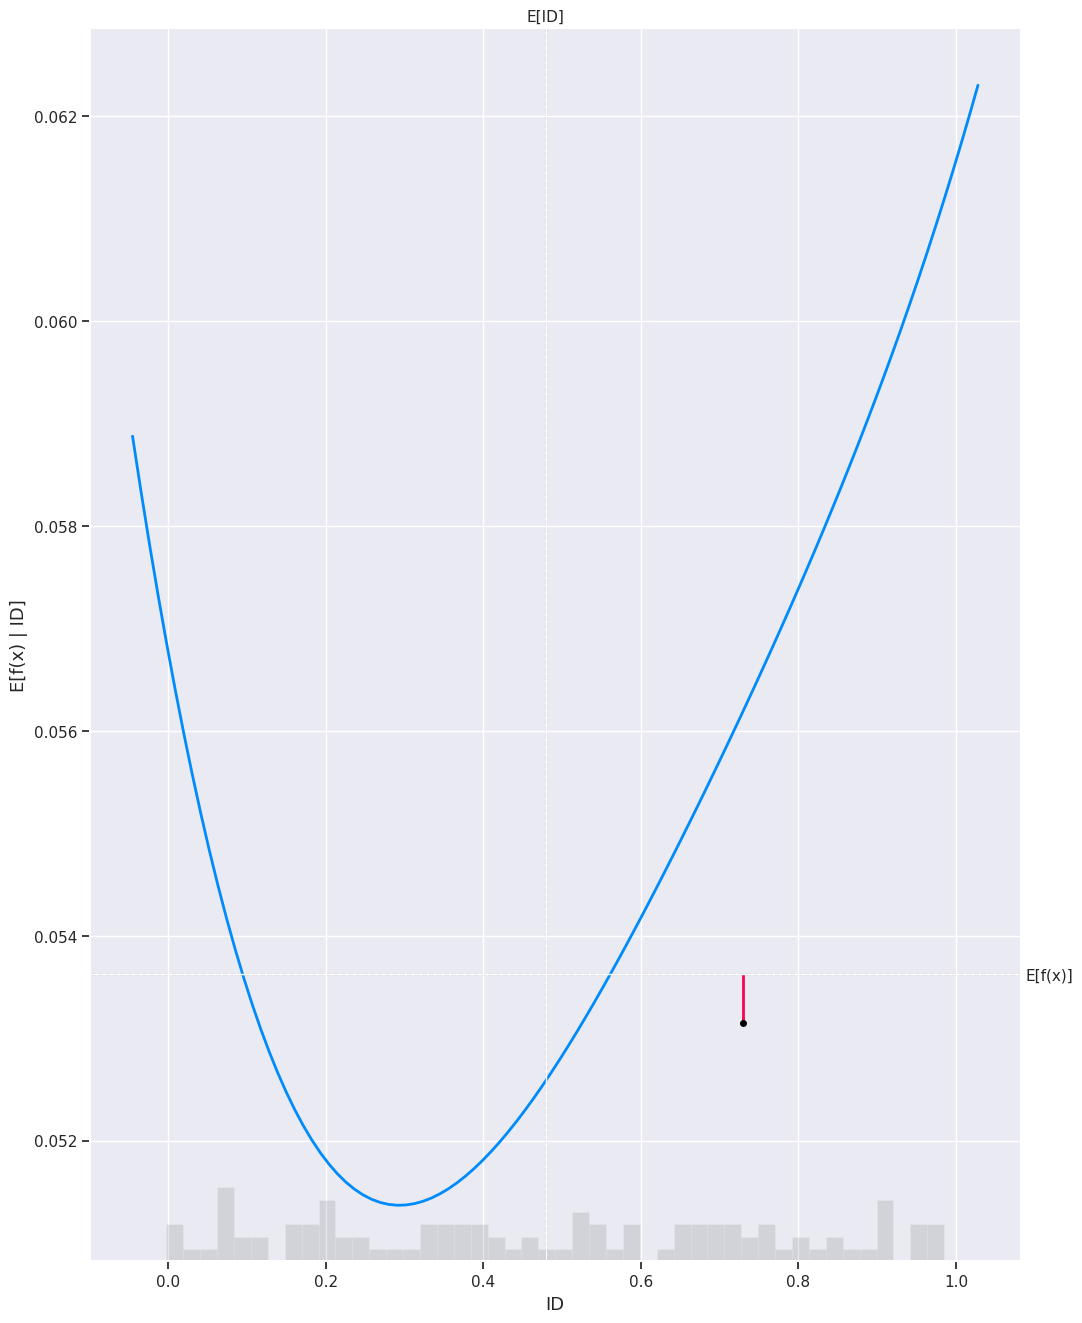

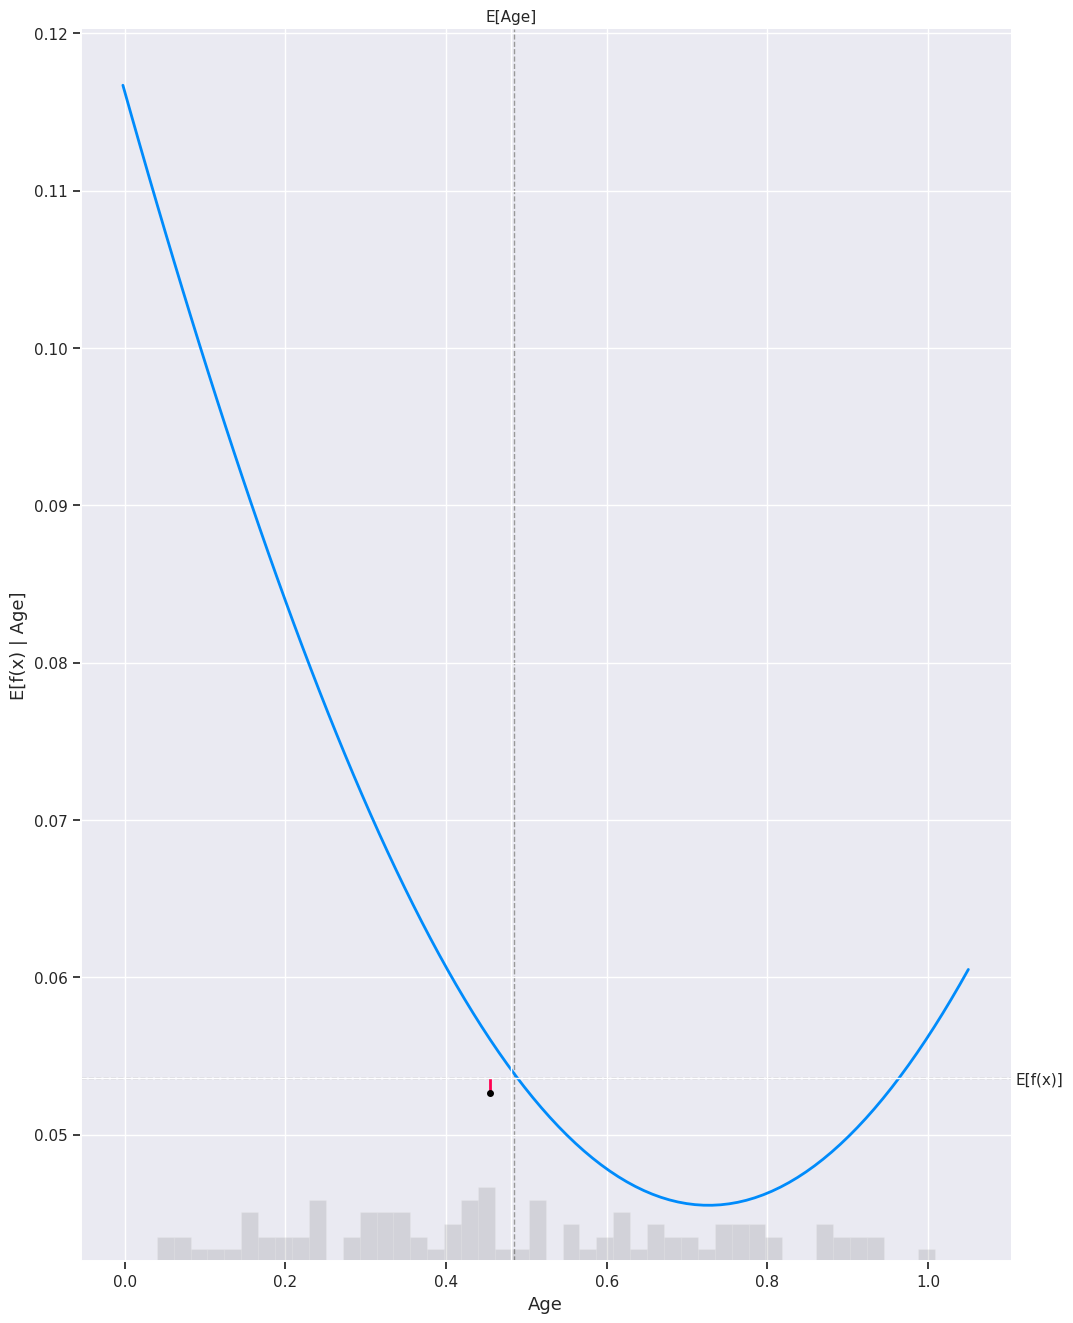

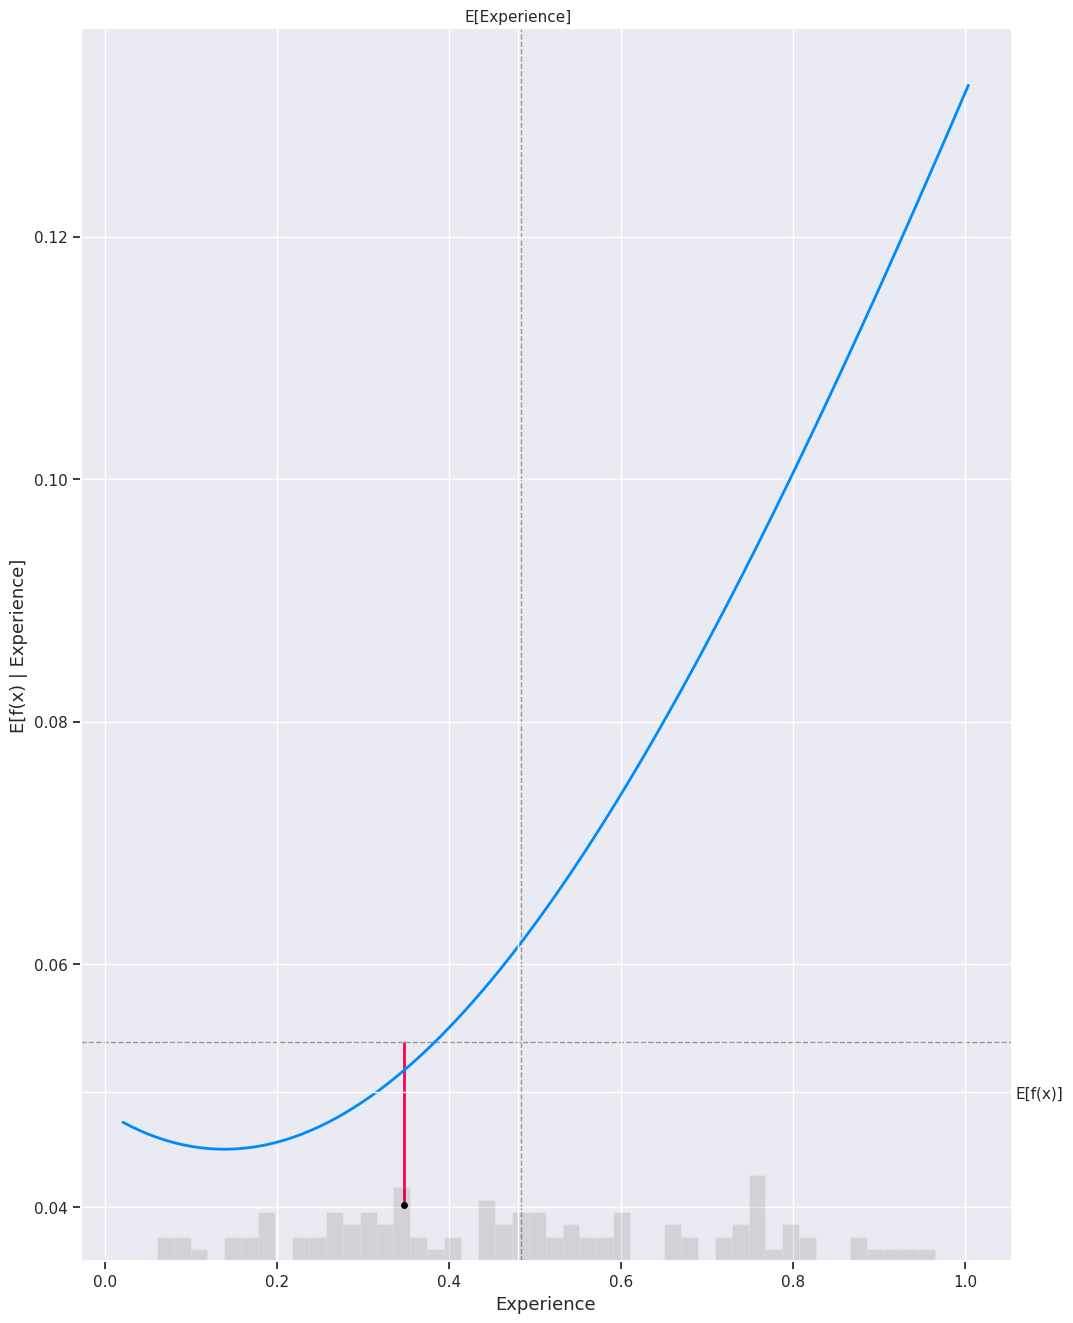

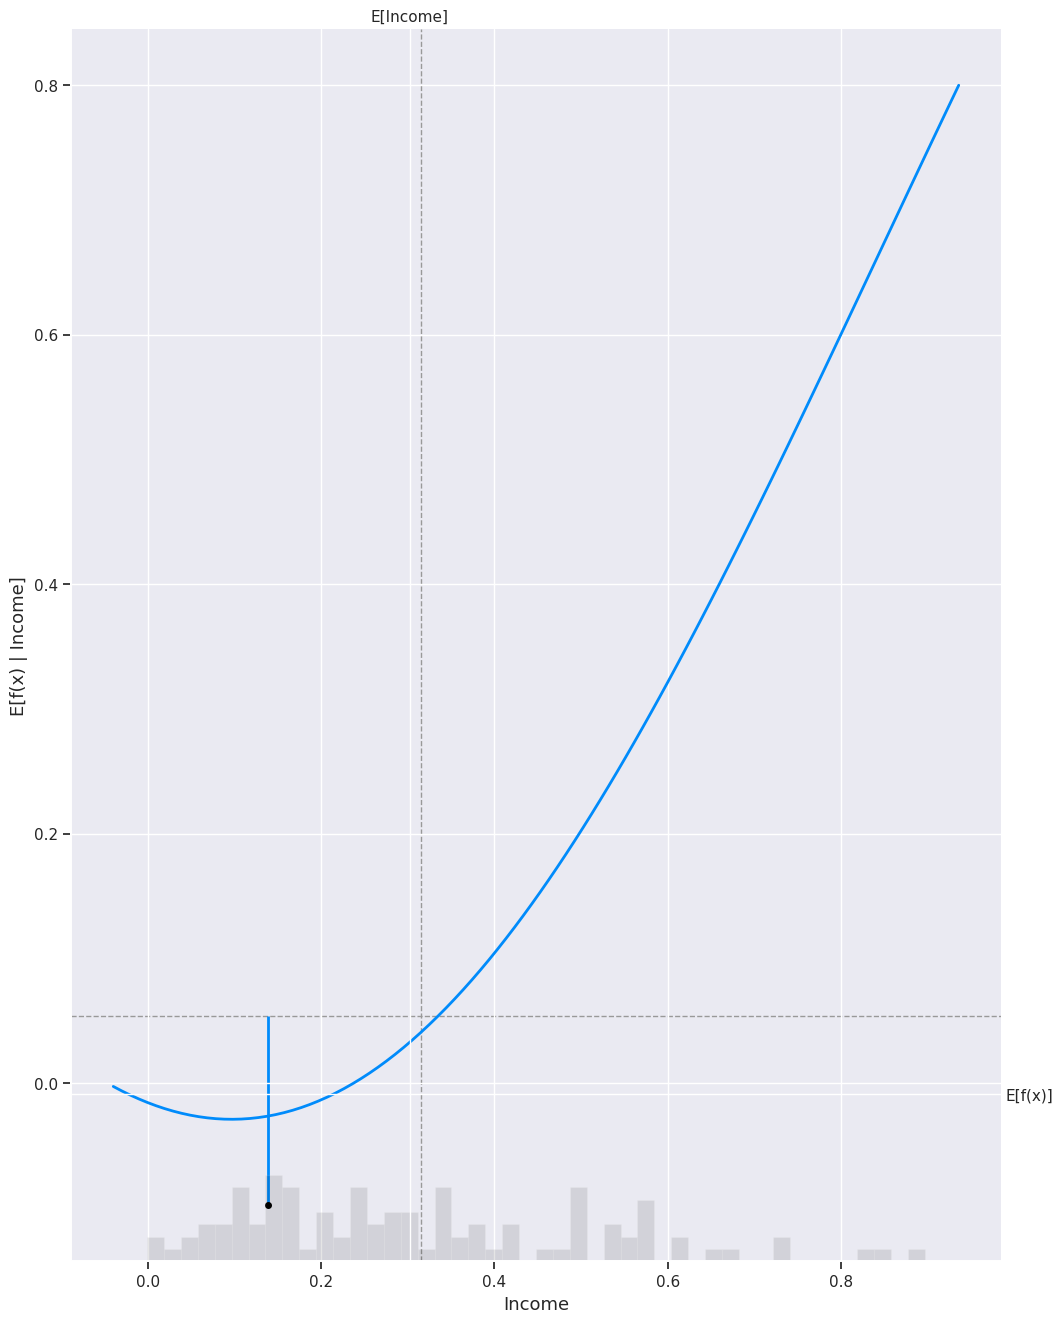

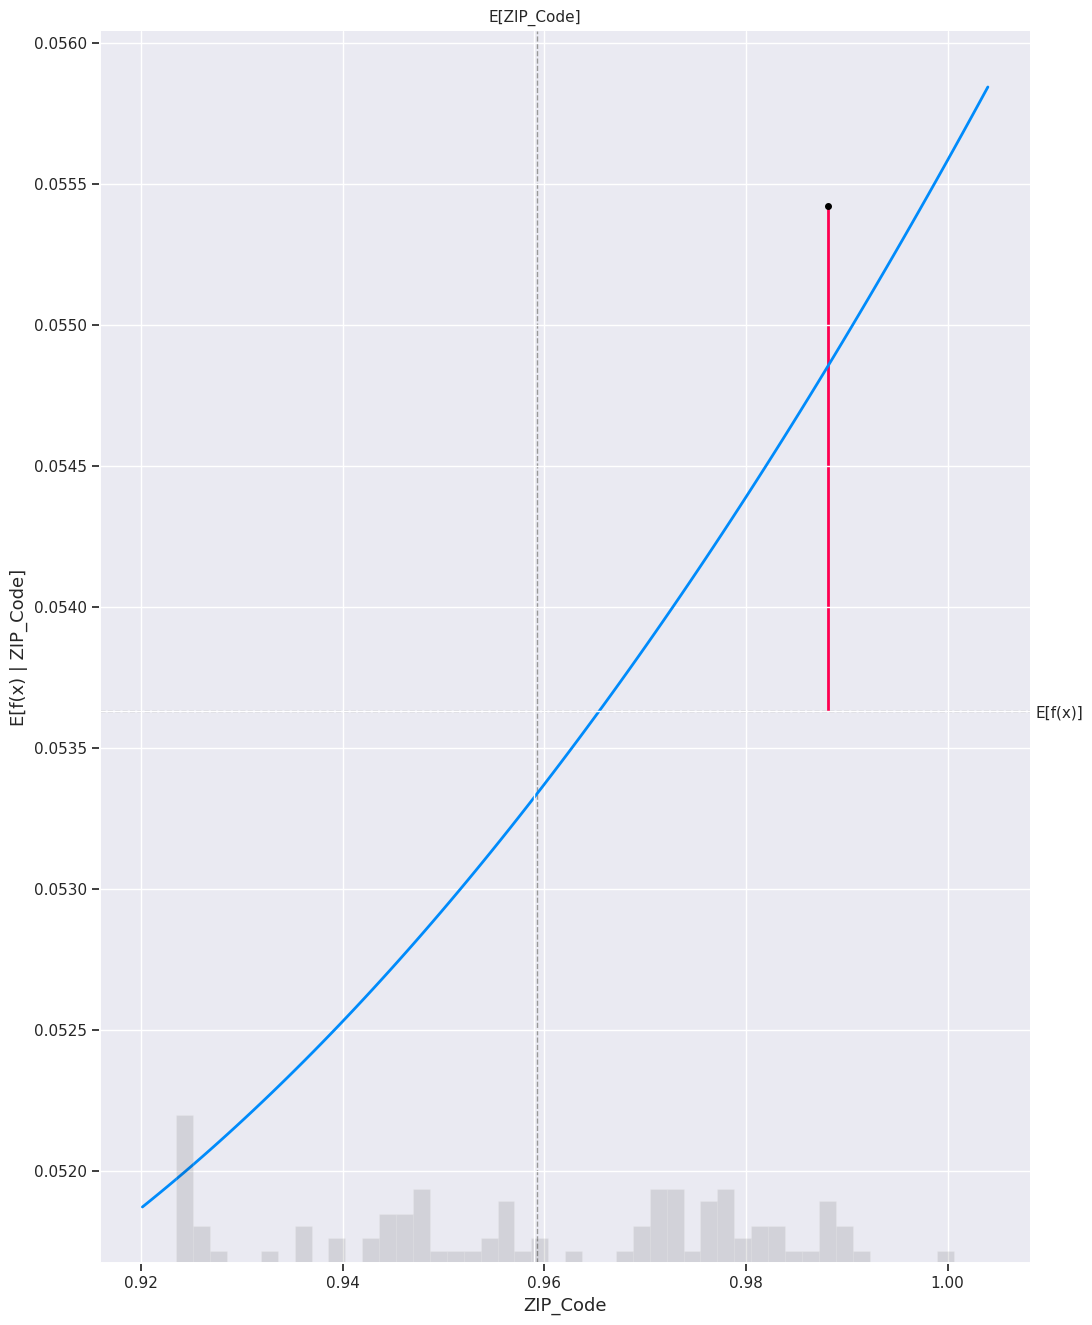

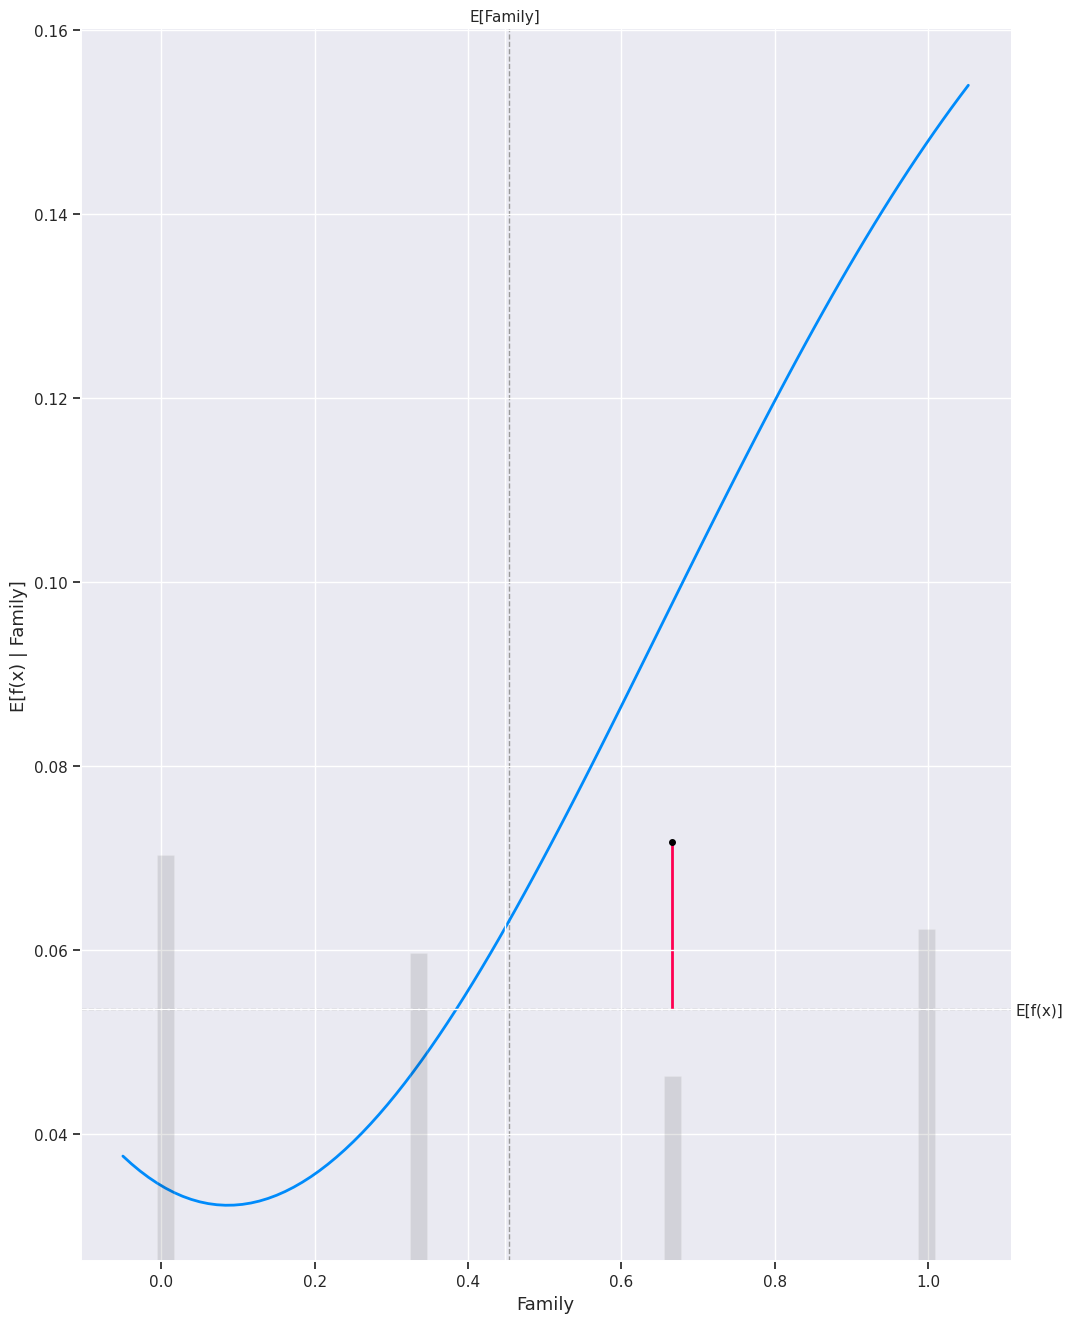

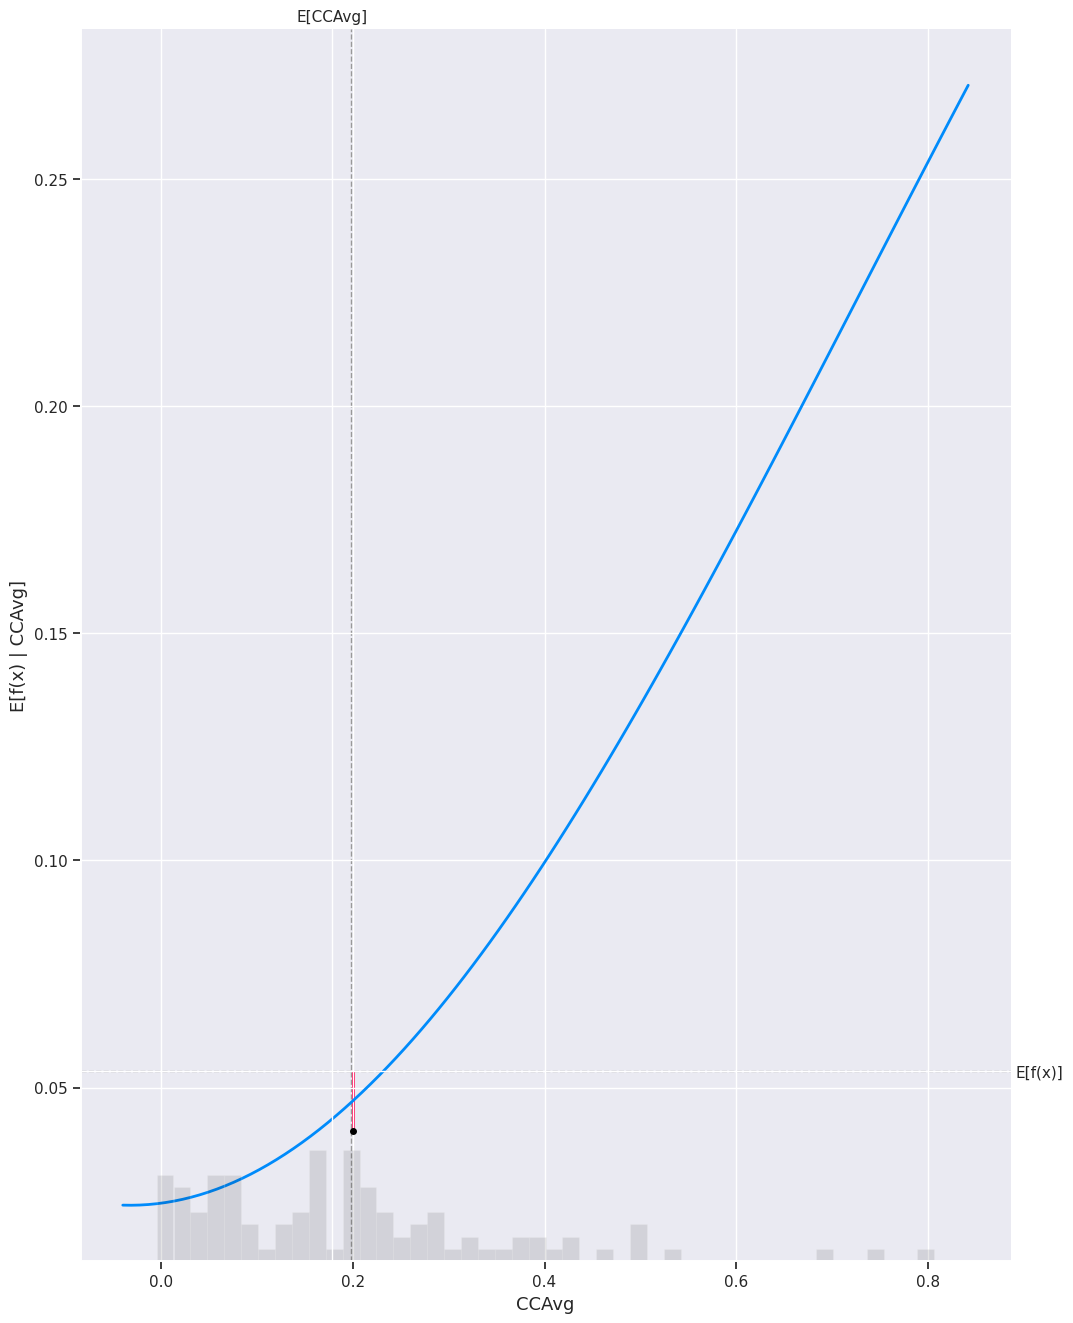

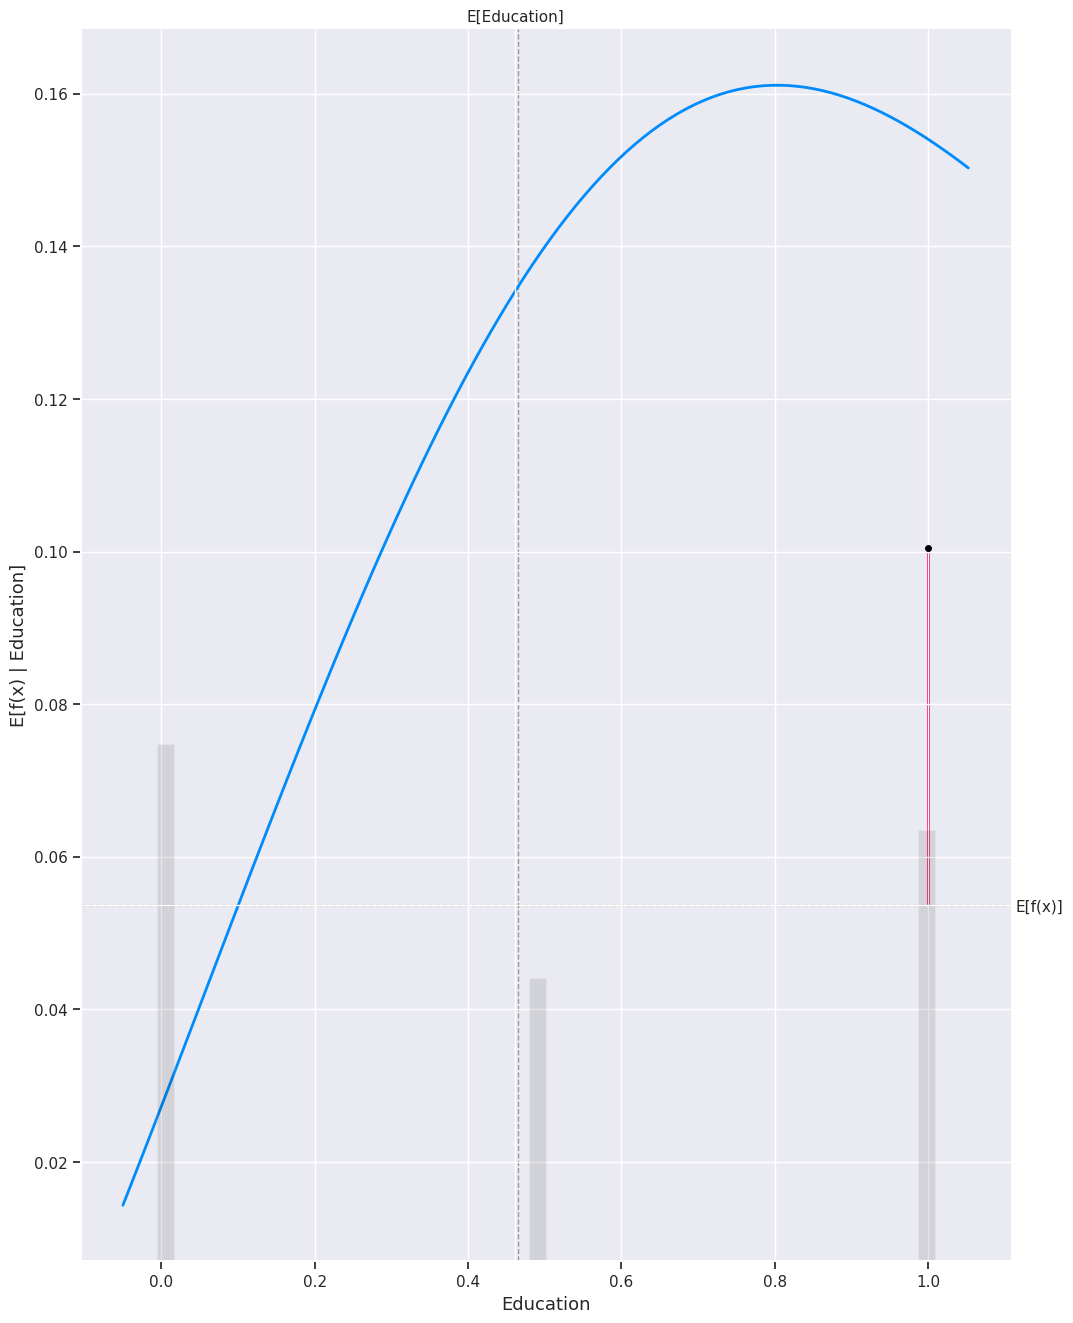

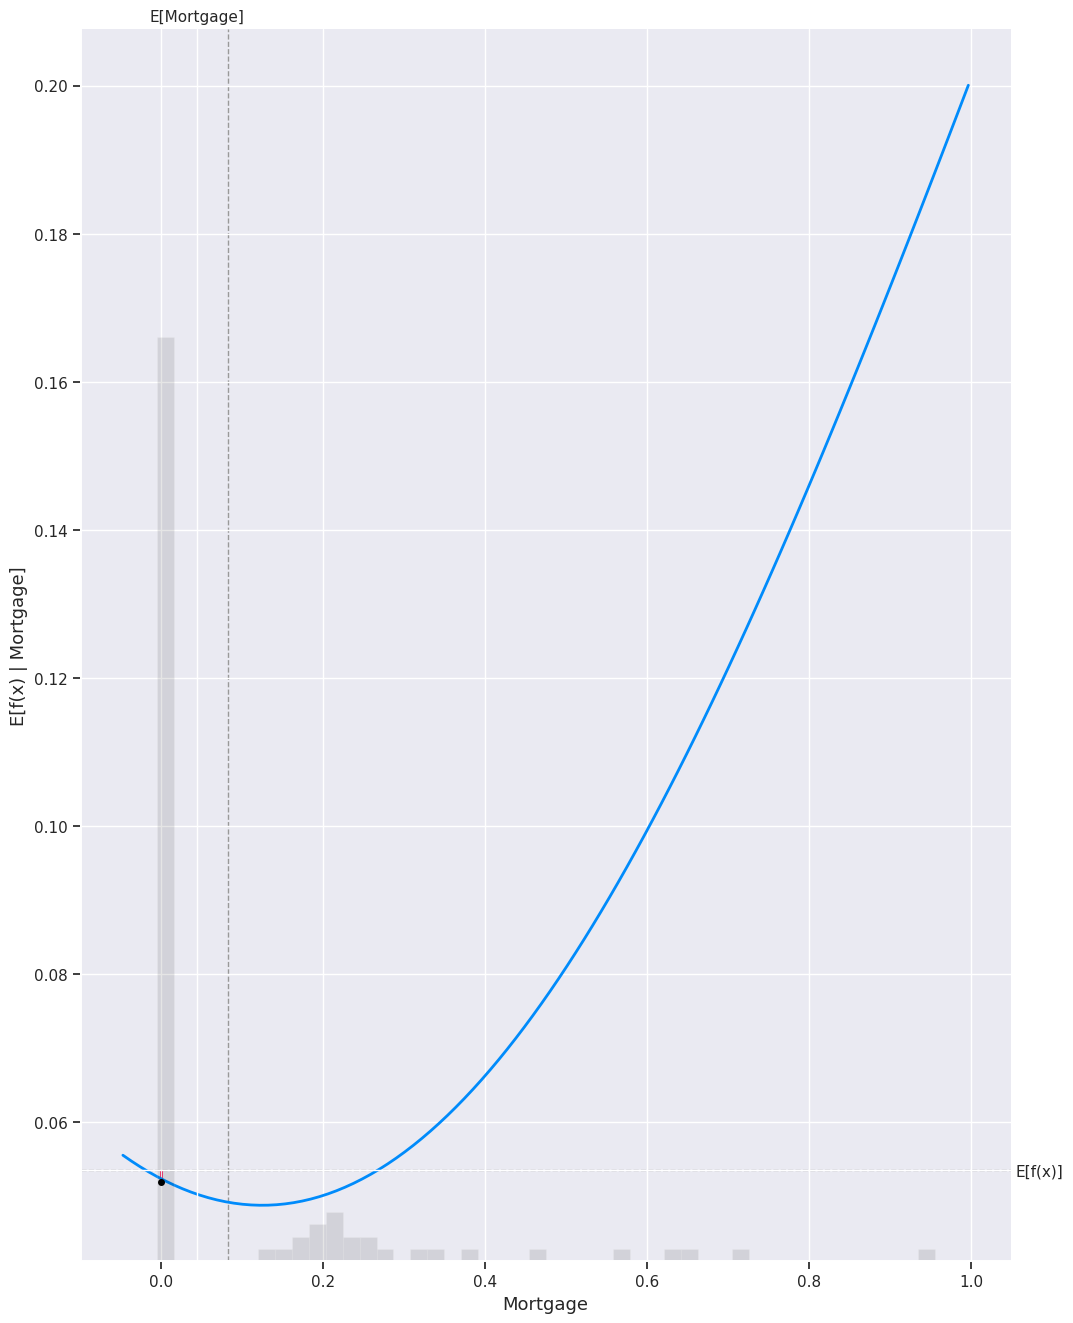

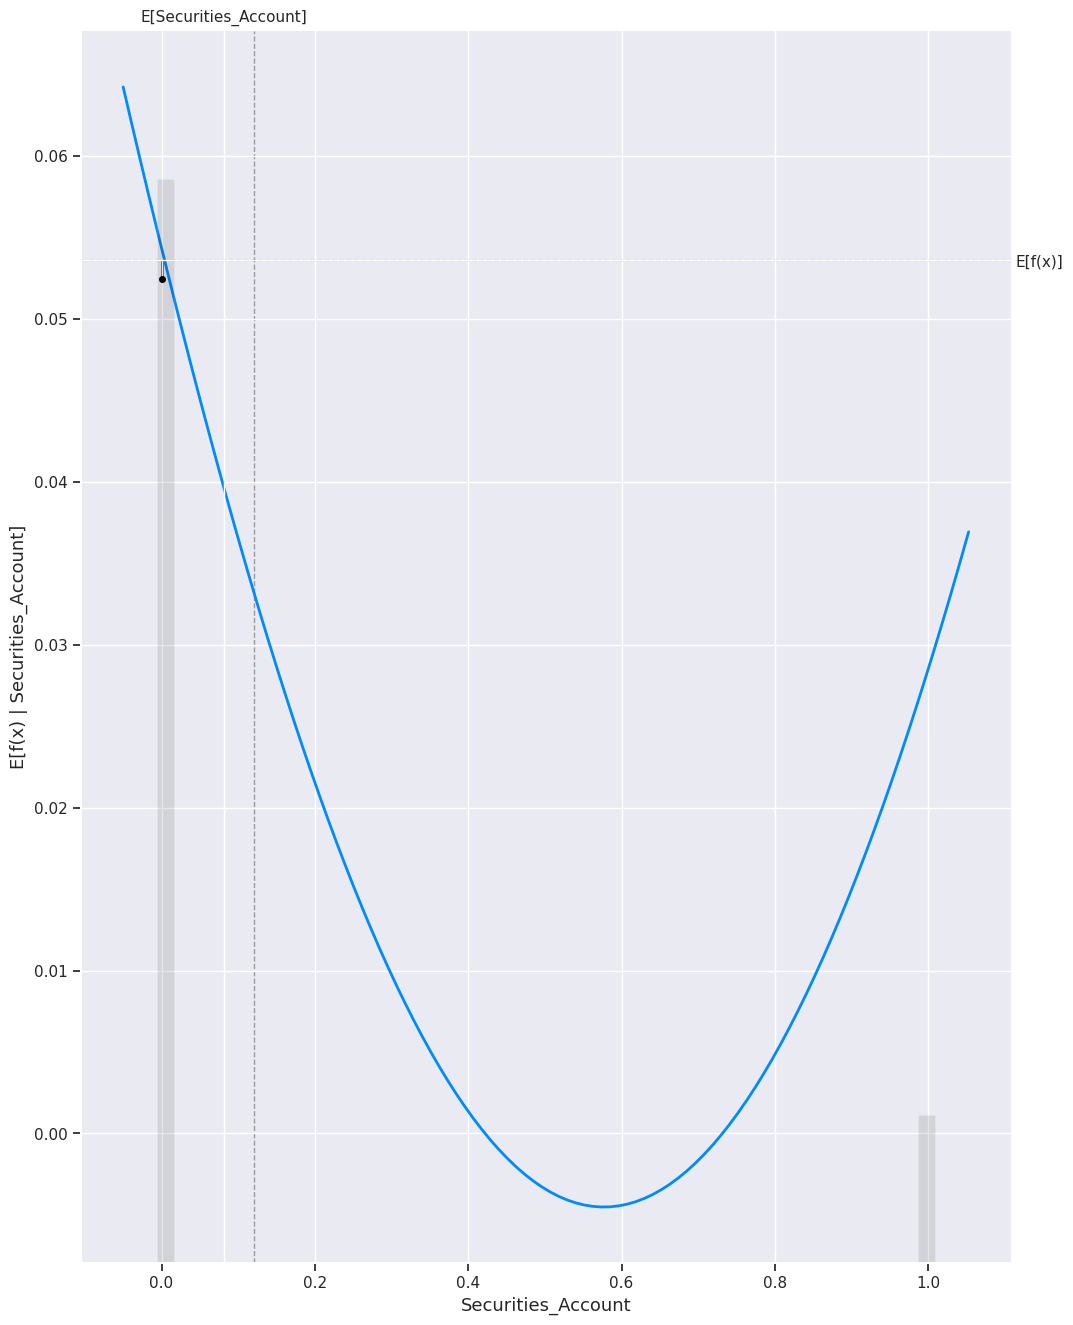

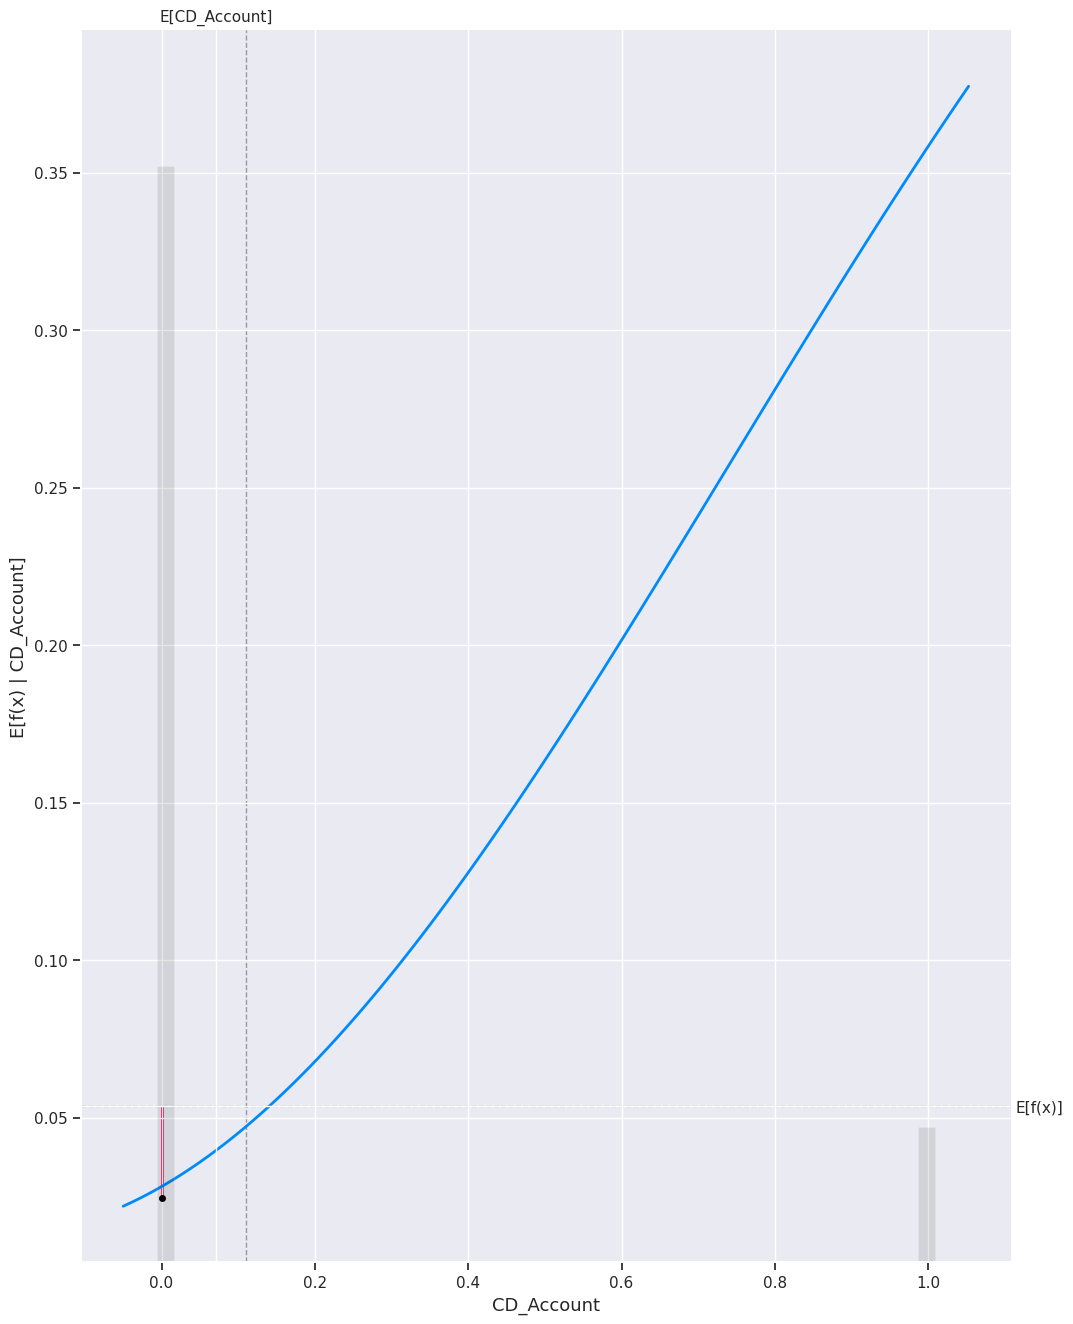

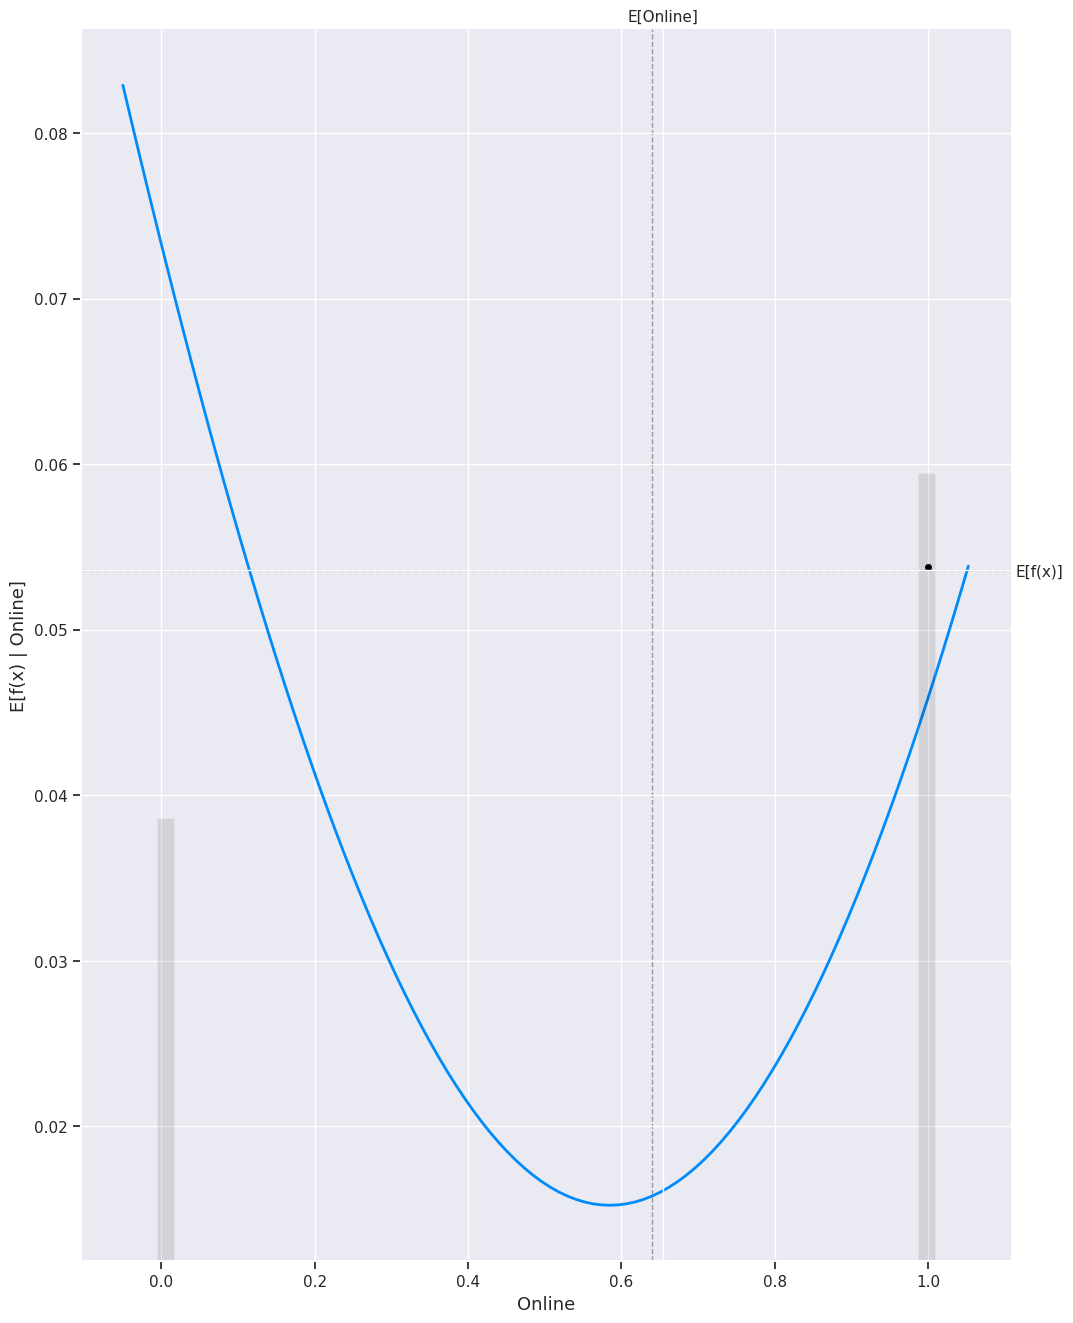

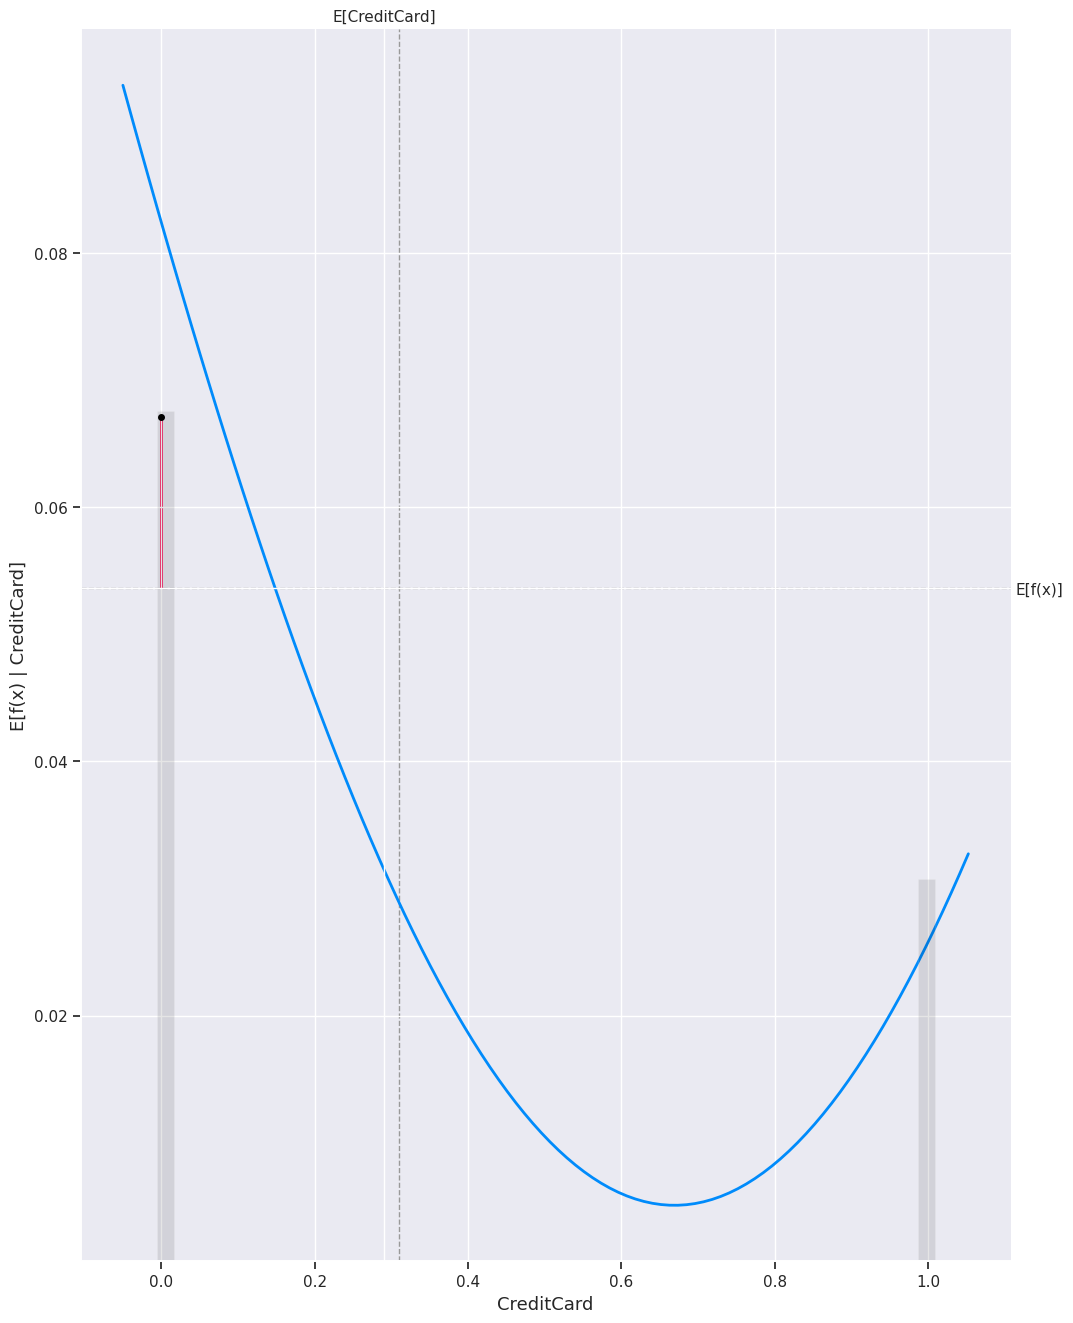

In [126]:
for i in x_train_100.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        svm_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
    )

# **Interpreting SHAP Feature Importance Plot for Linear and Tree-based model**

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

The following plot is

SHAP feature importance plot for SVM model
Using the below plot we can come on the conclusion that the Income is the most important feature, followed by Education and CD_Account.

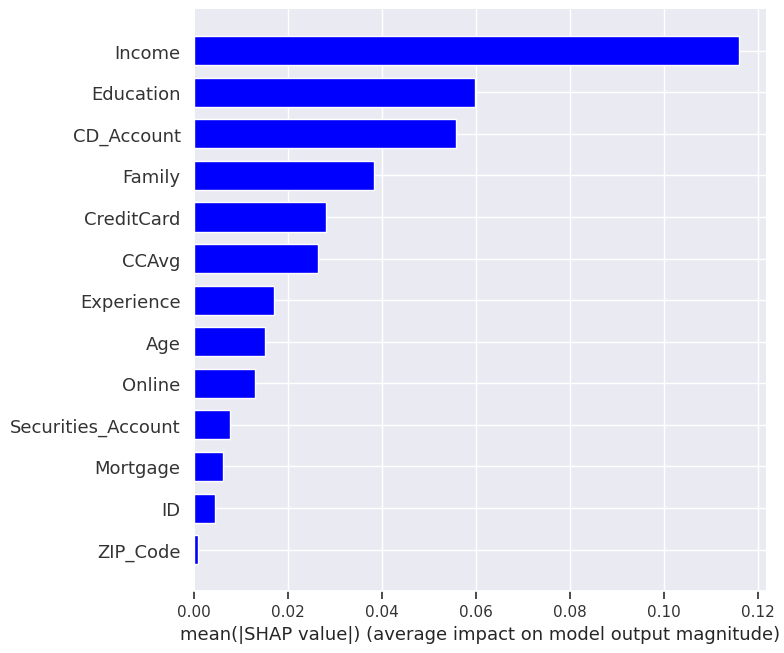

In [127]:
# SHAP variable importance for a Linear Model
shap.summary_plot(svm_shap_values, x_train, plot_type="bar", color="blue")

In [128]:
# Waterfall plot for linear model
def get_SHAP(index=18):
    shap.plots.waterfall(svm_shap_values[index], max_display=14)

# **Interpreting Waterfall SHAP visualization**


Let's consider the same sample (sample_ind = 18).

It says that f(x) = -0.077 is what we got as a model output and the expected output for this sample was 0.054. 

We came pretty close to determining it as the difference is only 0.023.

The waterfall model explains how we got the expected output, and which features contributed to what.
 
The below graph shows that Education has the biggest and most positive impact in increasing the quality of wine by 0.05 for this specific sample.

Followed by income had a negative impact and it bought the Personal Loan down again by 0.15 for this sample, and so on. 
 
Using this model we can visually interpret why exactly this specific sample is giving an output of 0.054

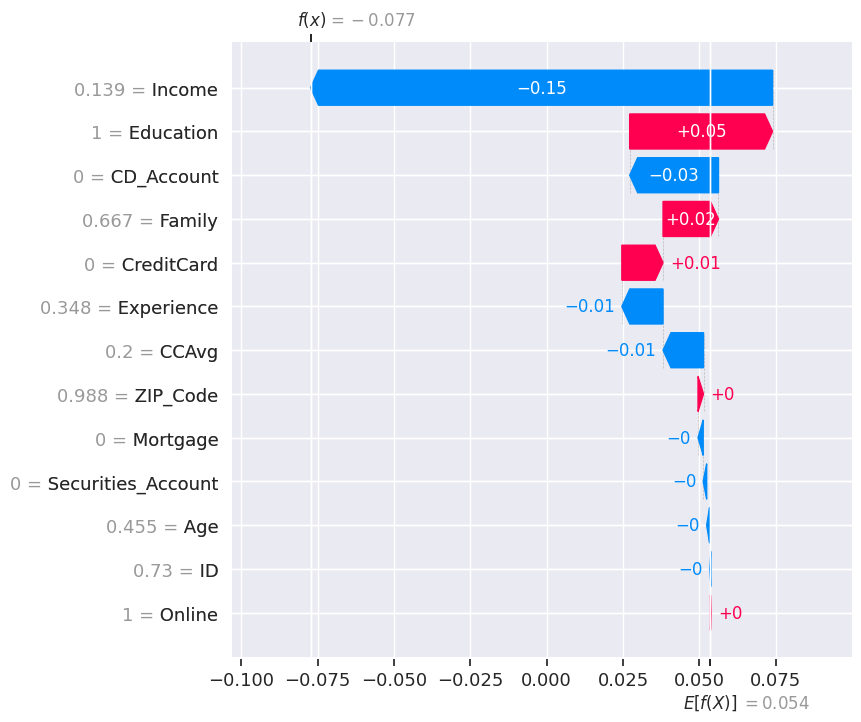

In [129]:
get_SHAP()

# **Interpret the summary plot SVM Model**


Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

Each dot(both red and blue) represents a feature of a wine
Red color represents high values whereas blue color represents low value

If a dot(a feature of wine) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
The position of a dot(a feature of wine) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.
Let us try to understand how the features are affecting the model.

Higher value of alcohol tends to have a positive impact on the quality of wine
Lower values of volatile_acidity tend to have a positive impact on the quality of the wine.
Higher values of sulfates tends to have a positive impact on the quality of wine
Lower value of total_sulphur_dioxide tends to have a positive impact on the quality of wine, and so on.
We could also interpret the intensity of impact

Higher amount of sulfates have a much positive impact on the quality of the wine but it doesn't really care if the value is low it will always have the same intensity of negative impact on the quality
This visualization is very useful when it comes to interpreting how our model is working.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


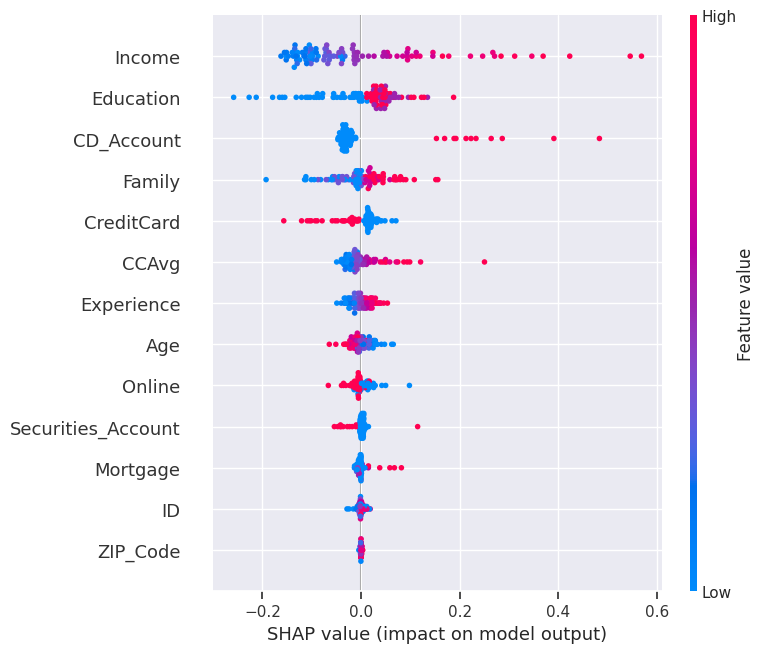

In [130]:
# SHAP summary for Linear Model
shap.summary_plot(svm_shap_values, x_train_100)

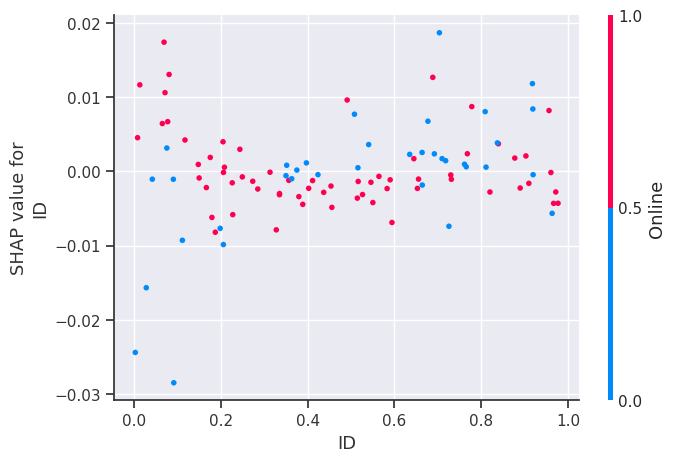

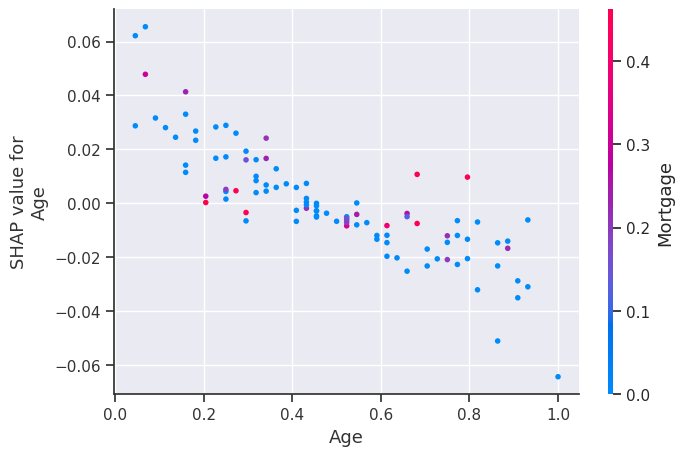

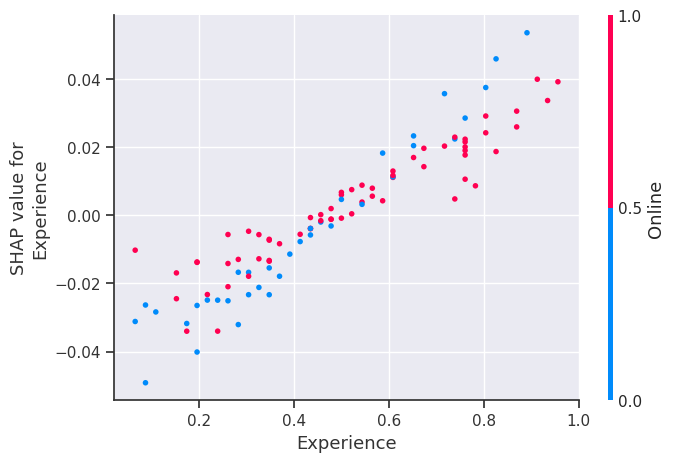

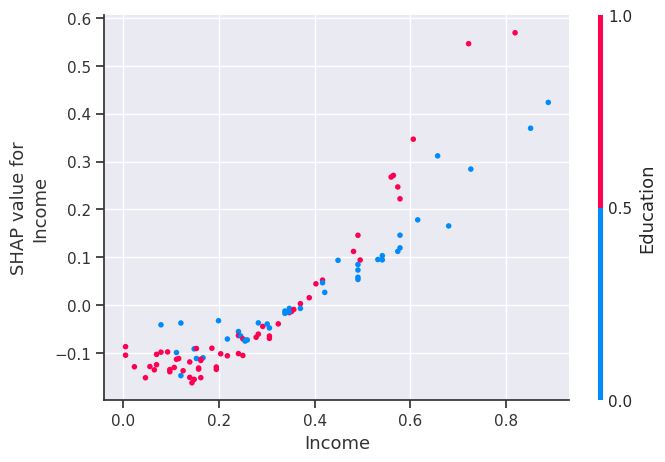

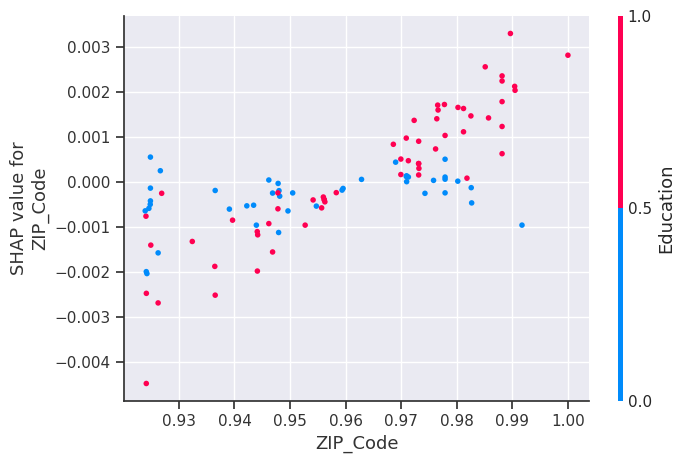

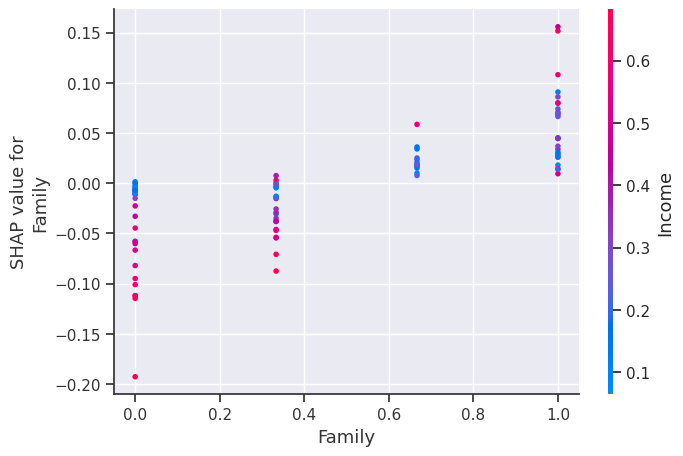

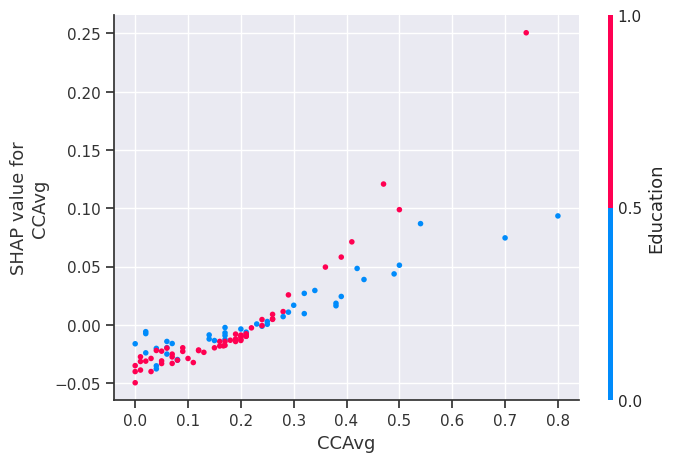

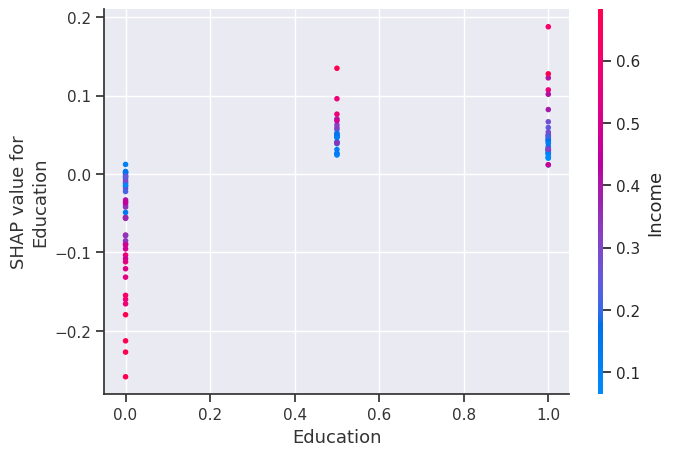

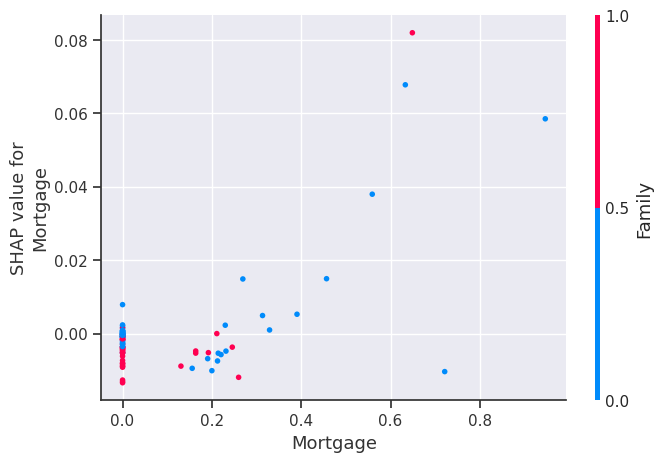

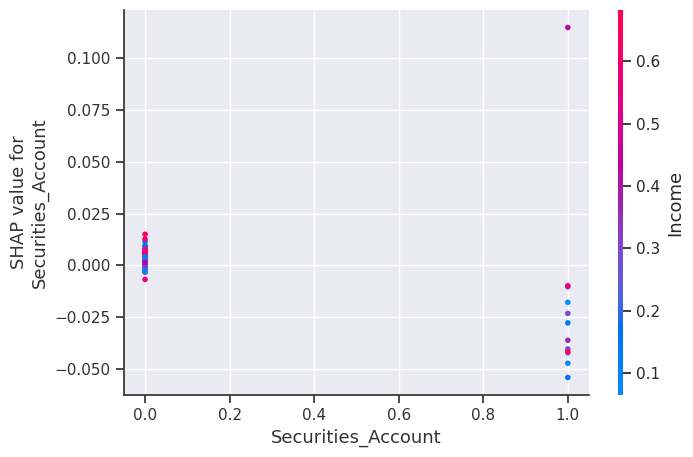

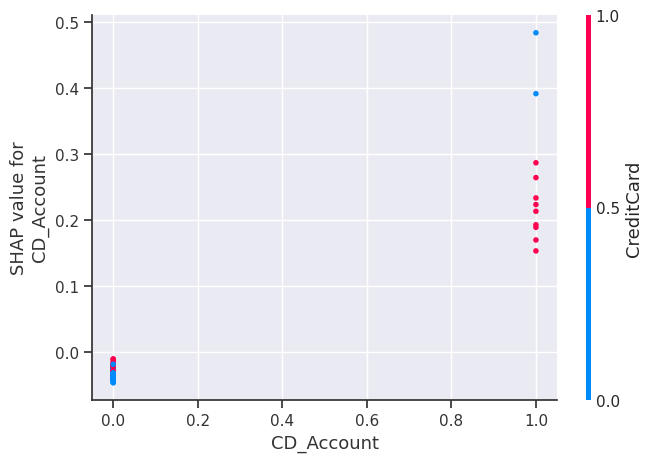

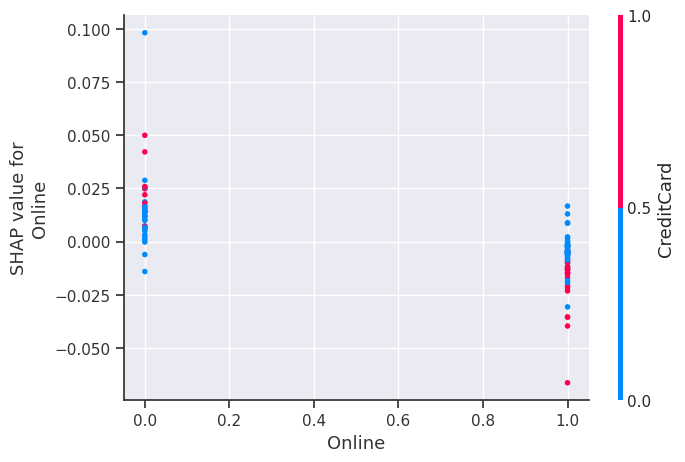

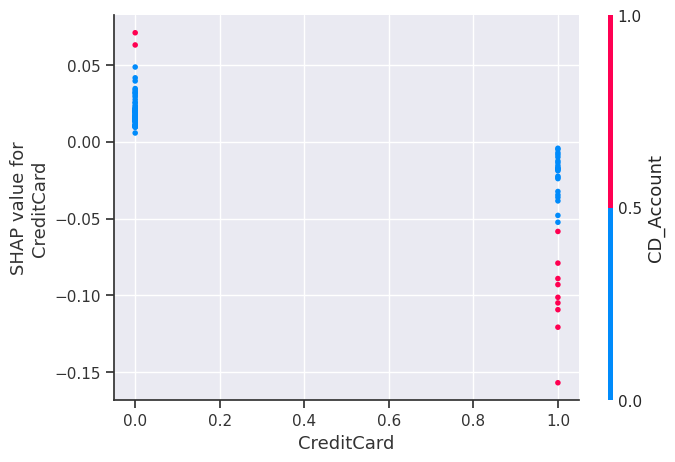

In [131]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, svm_shap_values.values, x_train_100)

# **Heatmap Visualization for Linear and Tree-based model**


This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target(quality of wine).

Here the Y-axis is Features
and X-axis is Instance of that feature

The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect

The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is

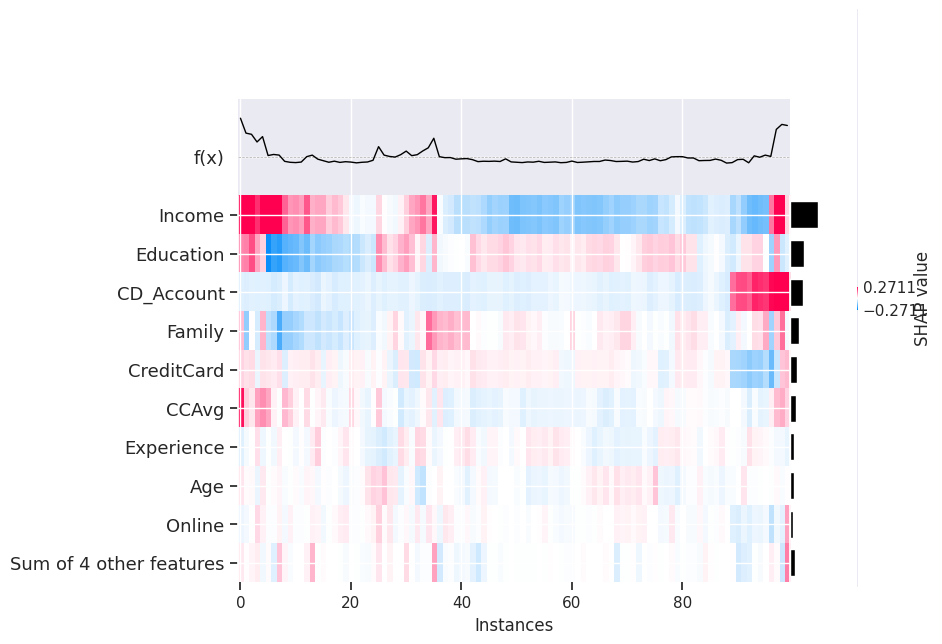

In [132]:
shap.plots.heatmap(svm_shap_values)  # SHAP HeatMap of a Tree Based Model

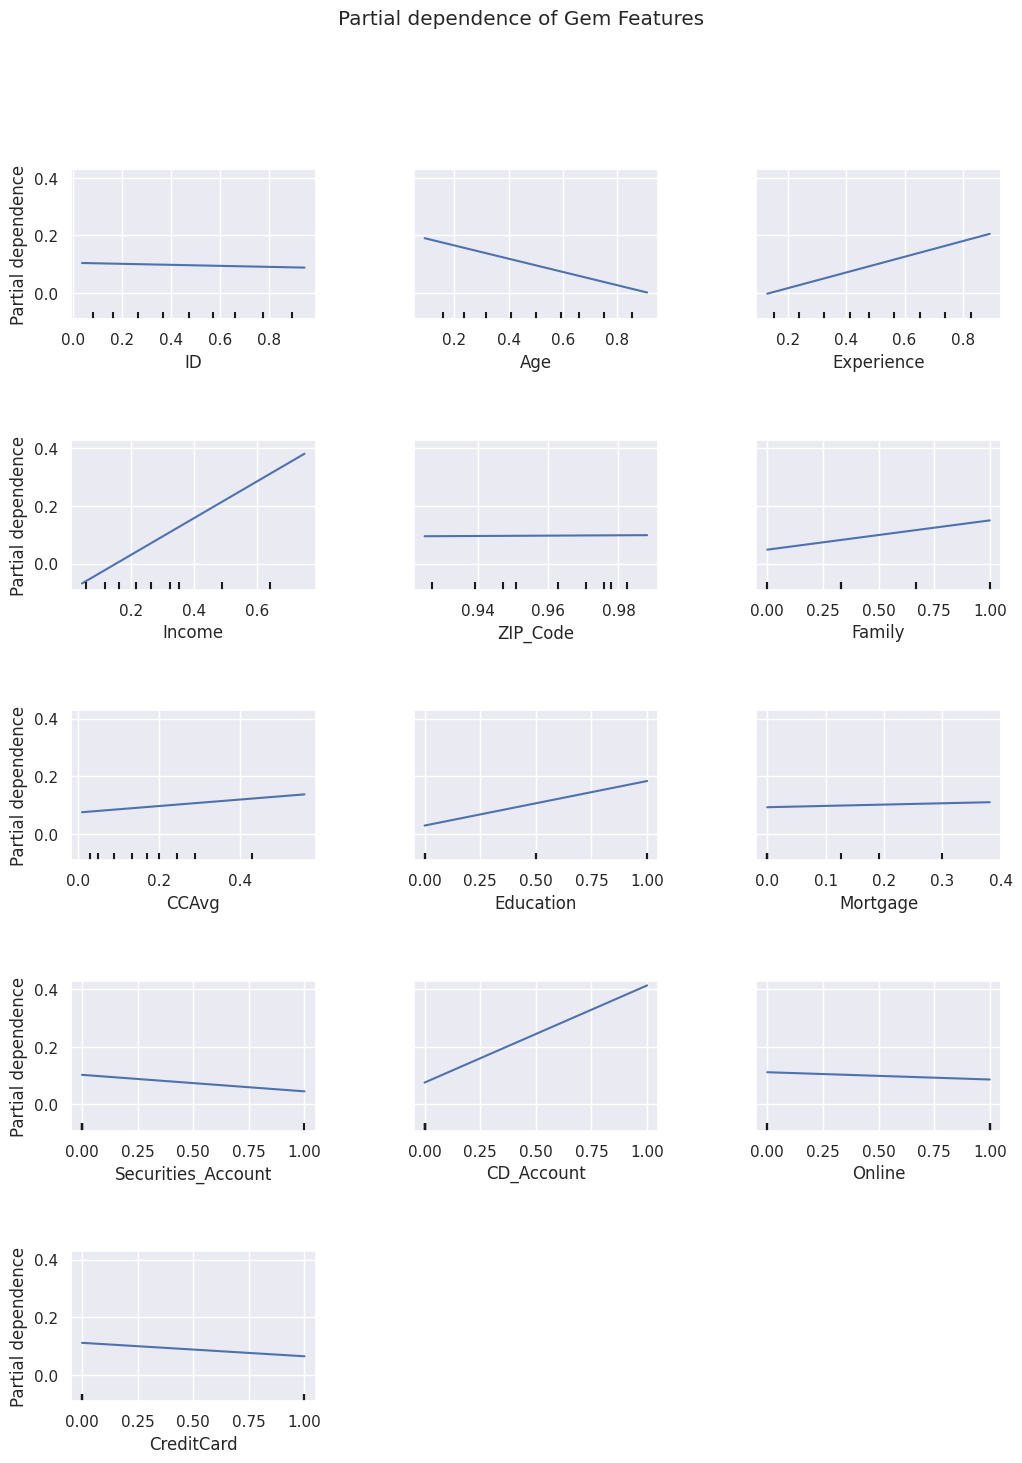

In [133]:
# PDP Plot for Linear Model
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(linear_model, x_test, x_test.columns,n_jobs=3, grid_resolution=20 )
fig = plt.gcf()
fig.suptitle("Partial dependence of Gem Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)

# **Interpreting AutoML's best model with tuned hyperparameters**


How are errors/residuals distributed and how interpretable is your model ?

**Residual Analysis**

Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.

**Variable Importance**

In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. The variable importance has been scaled between 0 to 1 for ease of understanding

**SHAP Summary**

From the SHAP summary diagram, we can interpret a few conclusions -

All the features are listed as per their importance in making the prediction, that is Income is more significant followed by Education, and so on. Hence, ID is the least significant predictor in our model.

The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see Income has the most impact on the Personal Loan. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight amount of Income results in high Personal Loan, a low amount of ID results in high Personal Loan, and so on. 

As we can see the distribution of red points in the Income feature is far more spread than the blue points. From this visual, we can interpret that the Personal Loan is vastly increases as the amount of Income increases. It doesn't have much impact if the content is low i.e. between the shap value of 0.1 to 0.6 the blue data points are pretty concentrated. 

Inversely for the ID , less is better for the Personal Loan. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the Personal Loan.

The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

**Partial Dependence Plot (PDP)**

A partial dependence plot shows the marginal effect of a feature on the target(Personal Loan in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP. For Interpretation purposes, let us pick up the two most important variables - Income and Education.

As we can see that when the rest of the variables are kept constant and a marginal change is made in Income, we can see the mean response increases between Income levels of 110 and 150. This could be interpreted as this range of Income could be the deciding factor in the Personal Loan.

Similarly when the rest of the variables are kept constant and a marginal change is made in sulfate we can observe the mean response of Personal loan going up between the sulfate range of 1.0 to 1.25 . Hence, it can be interpreted that this range is deciding factor in the Personal Loan.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

**ICE (Individual Conditional Expectation) Plot**

ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.

Let us go back to the Income and Education features, as we interpreted in PDP the Personal Loan increases when Income and Education value is between 110 to 150 and 1.0 to 1.25 respectively. 

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

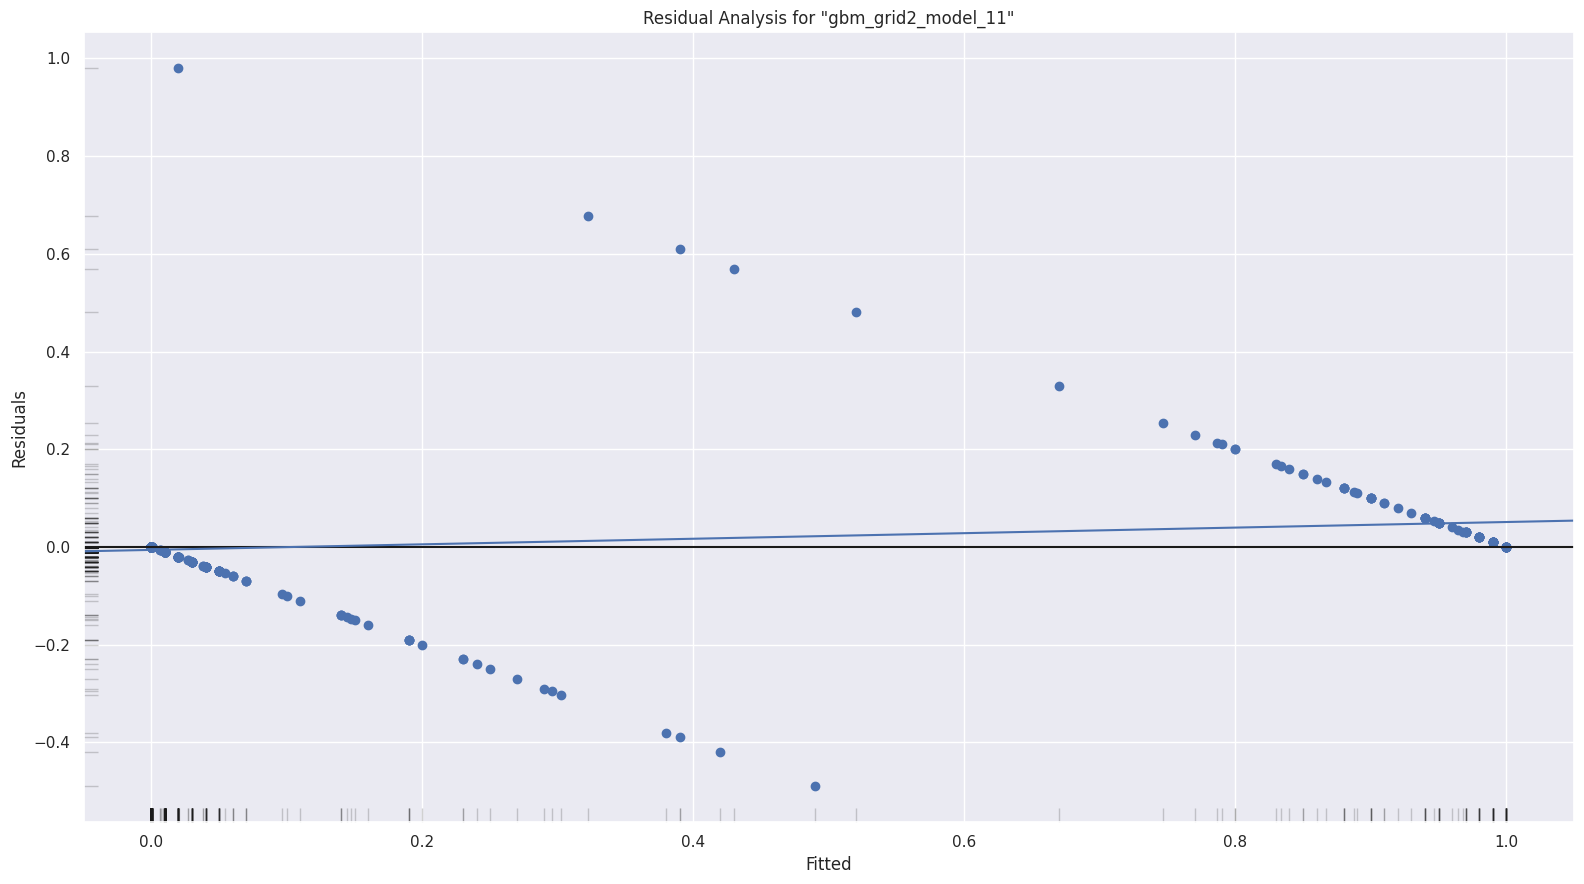

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

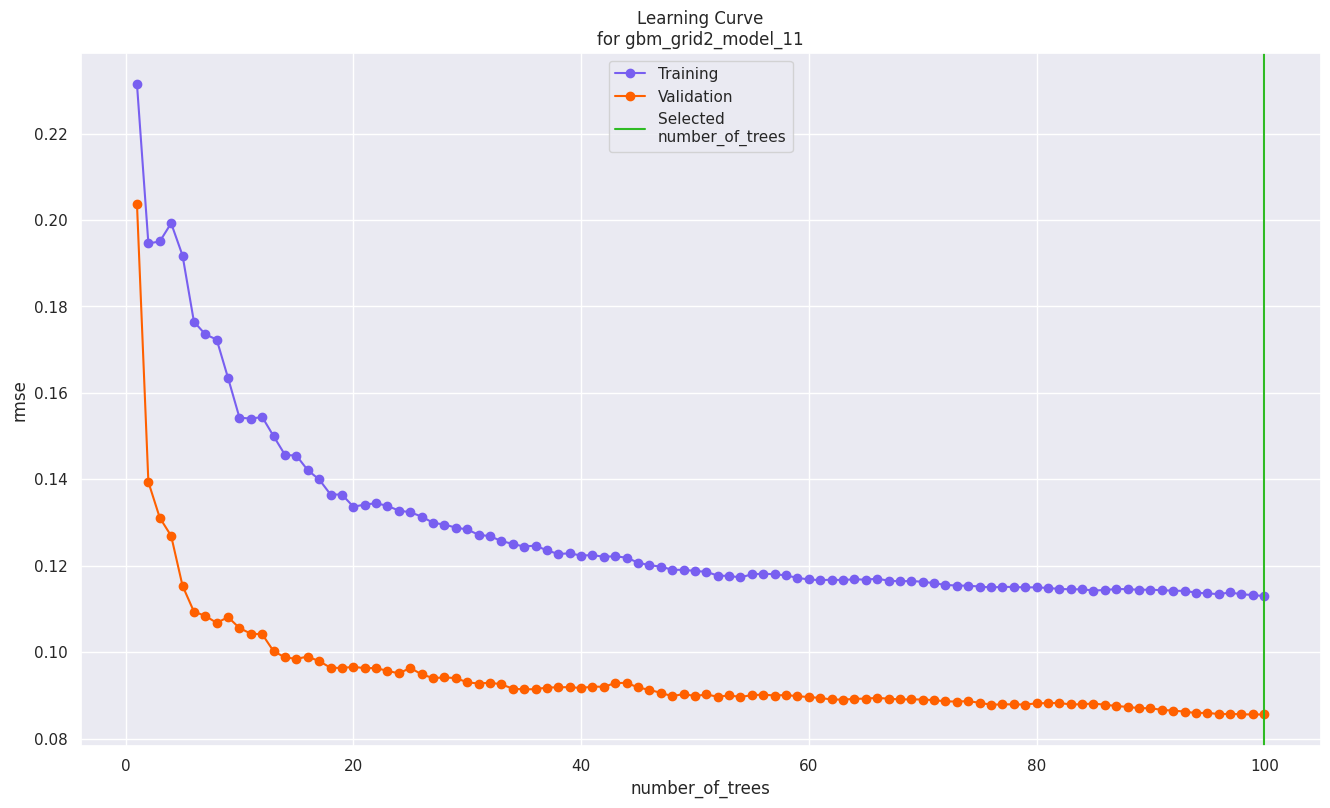

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

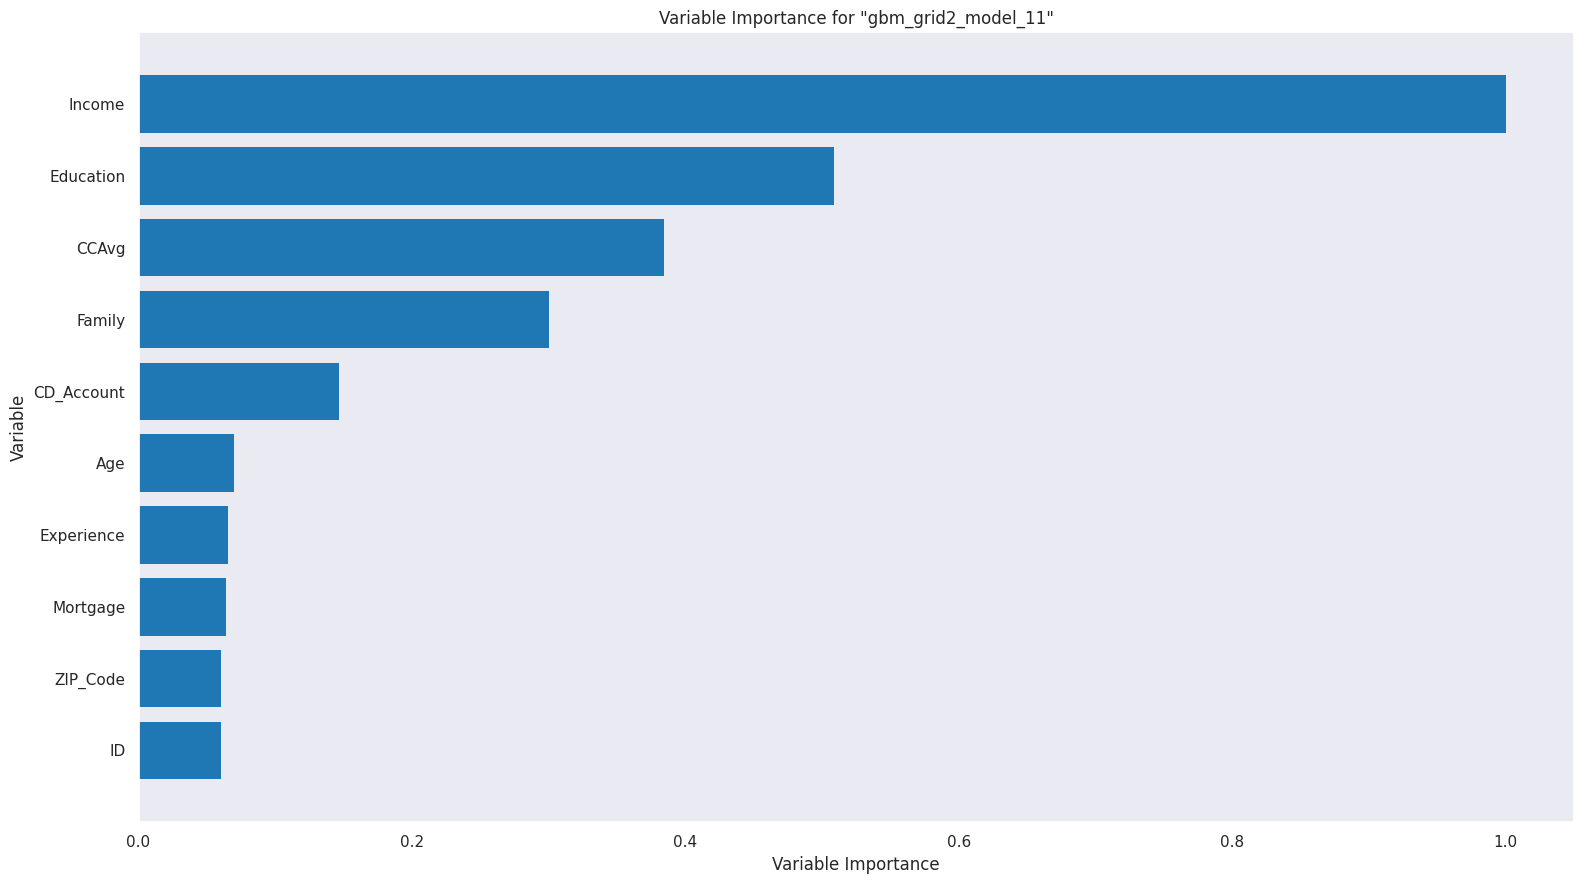

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

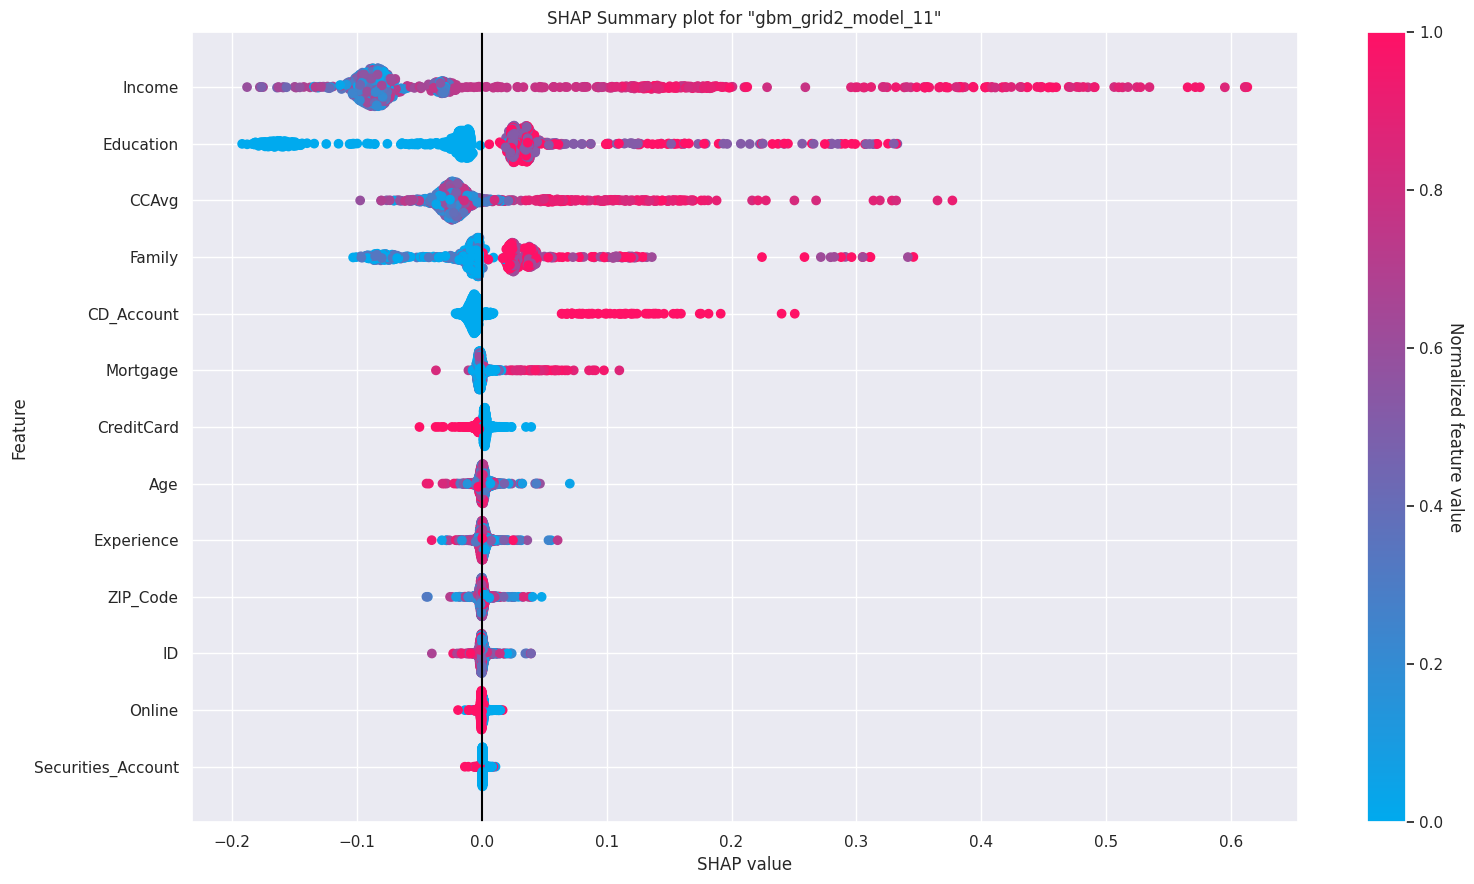

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

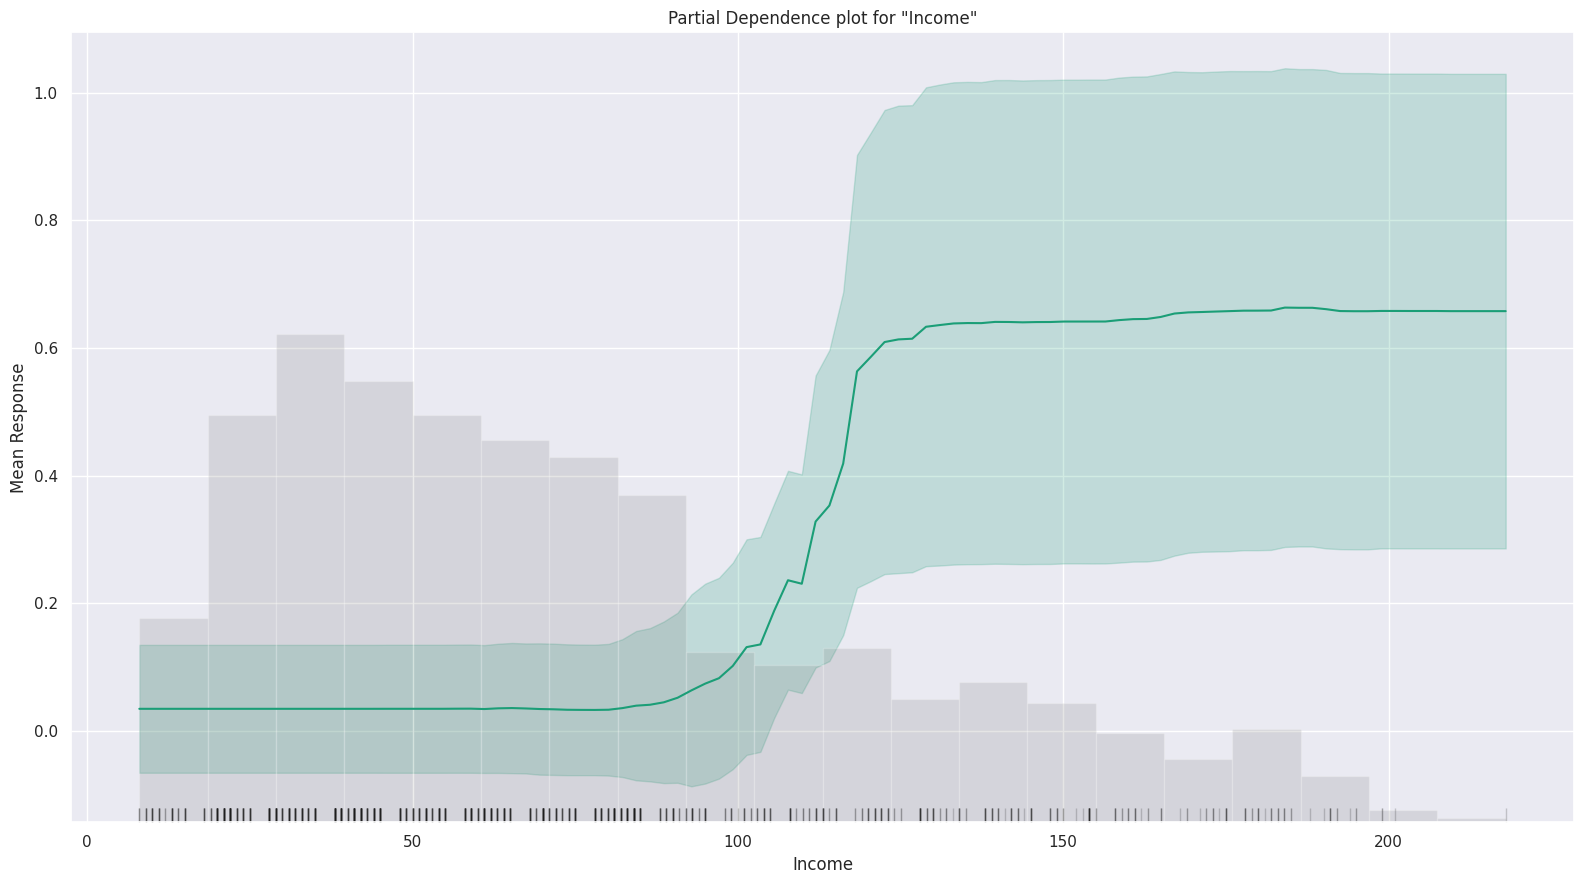

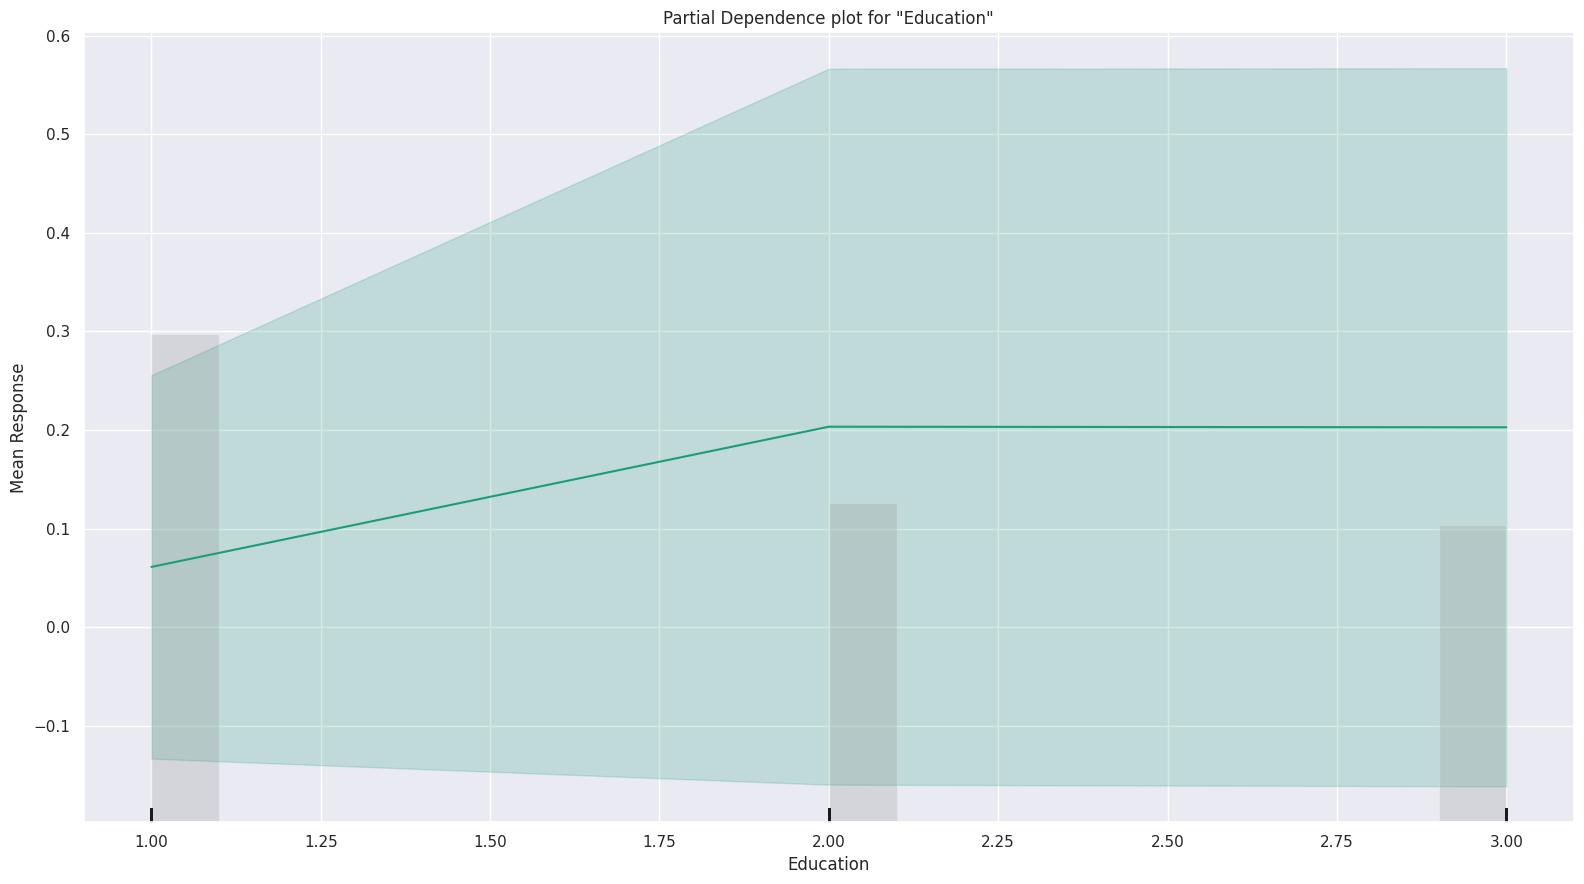

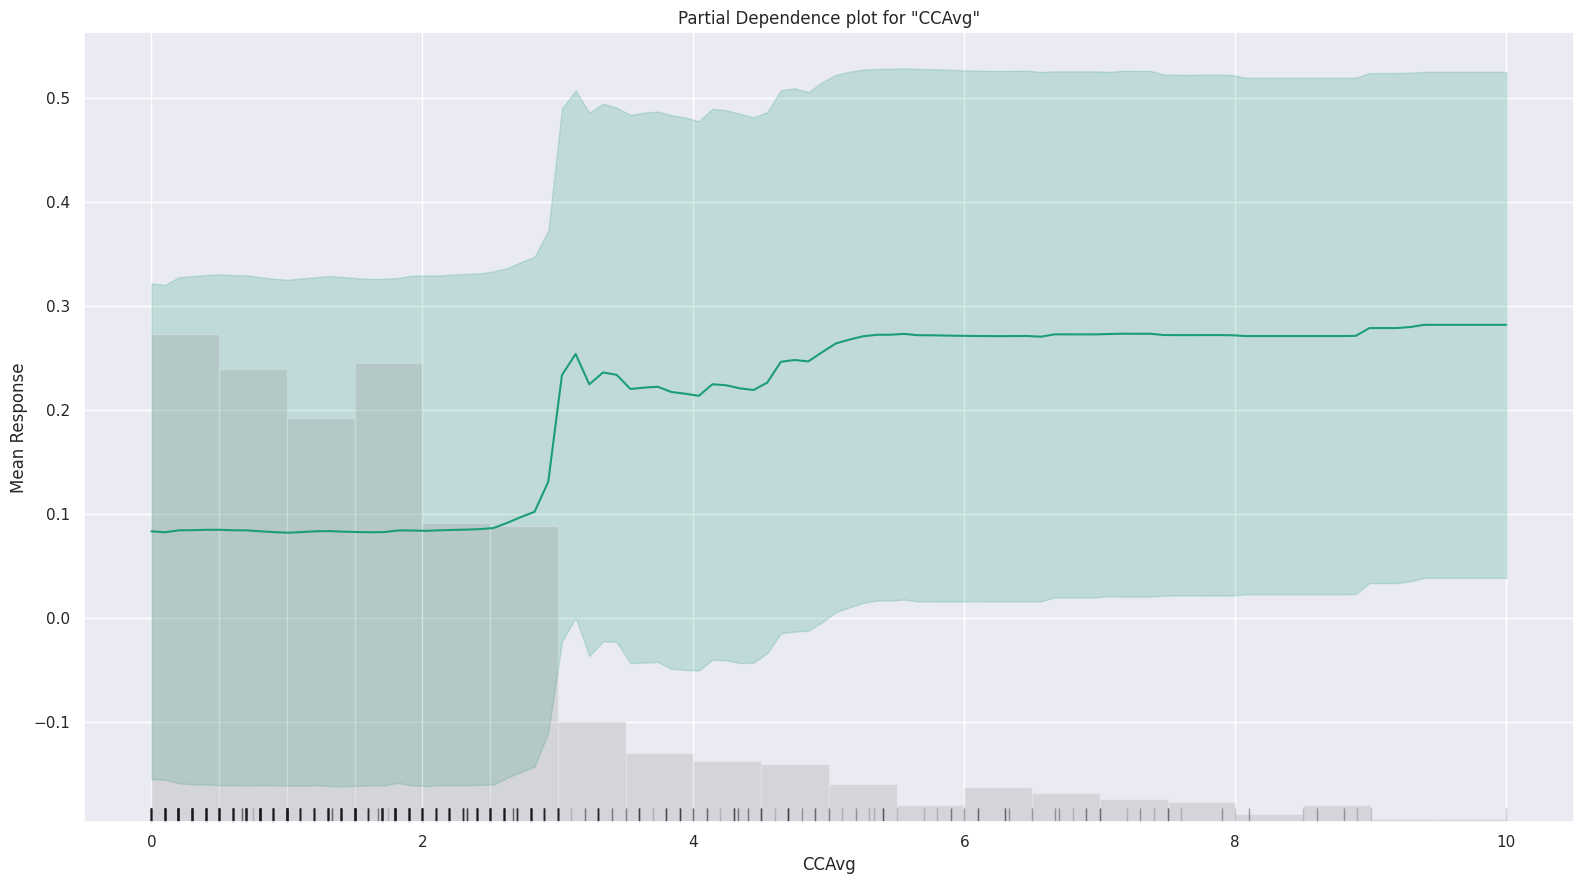

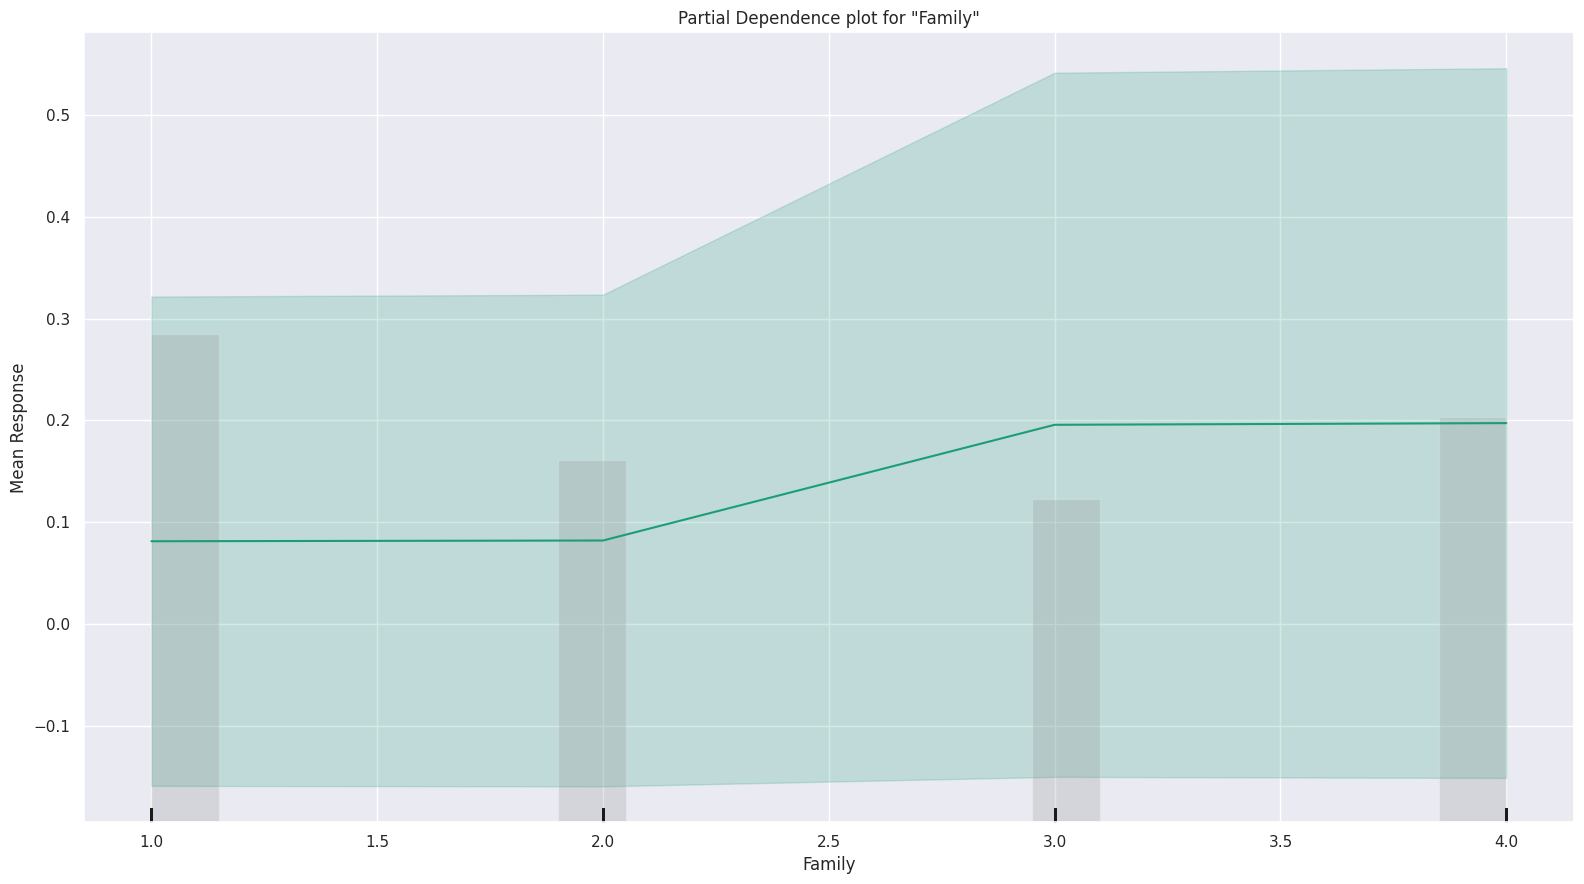

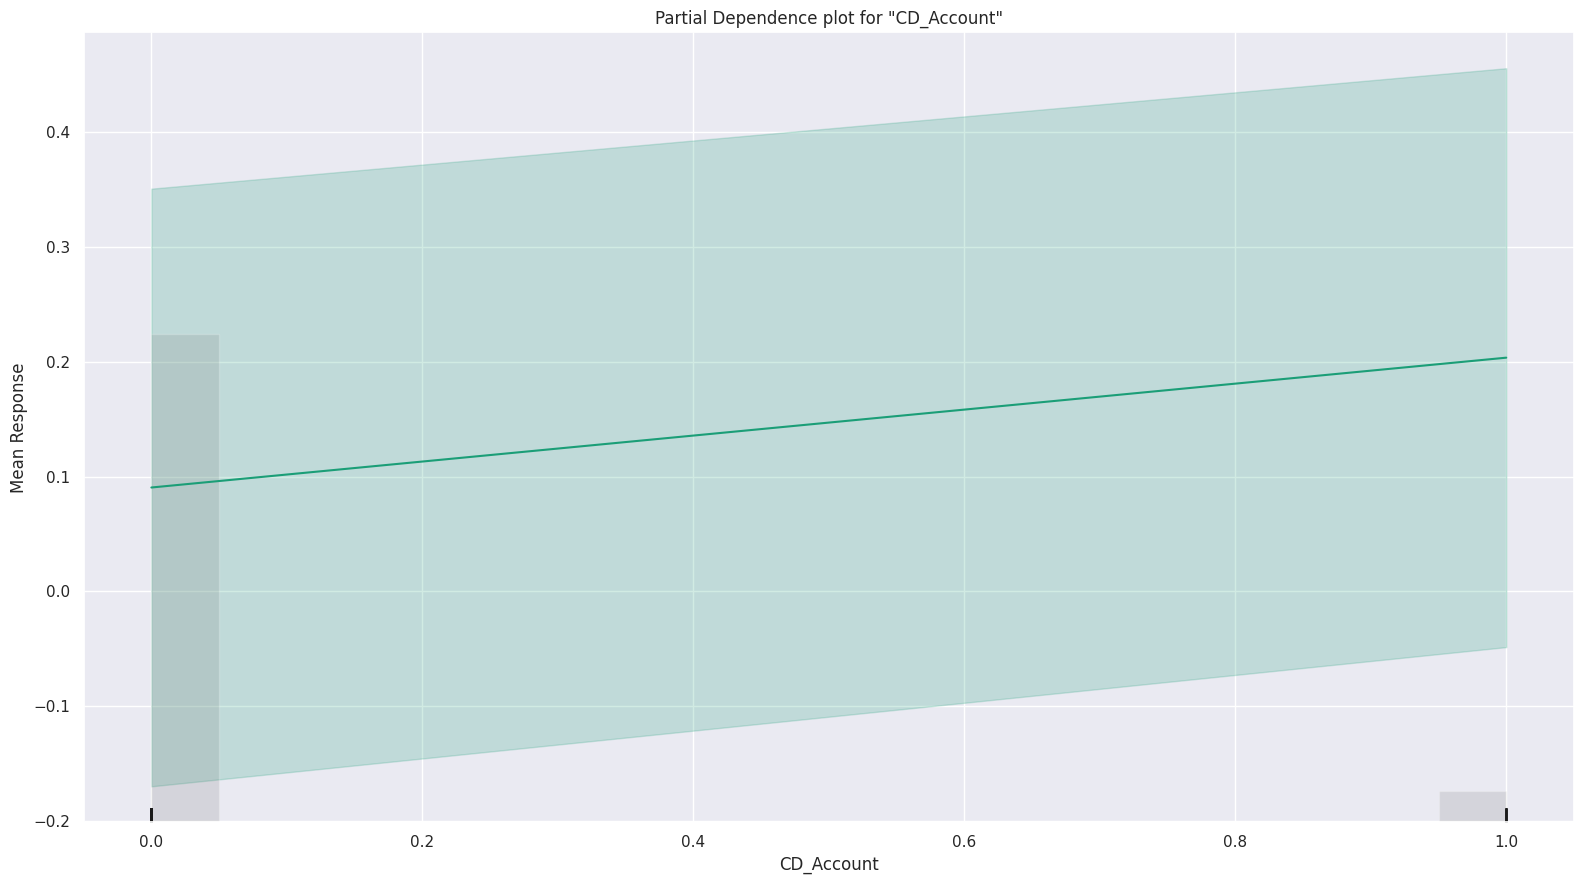

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

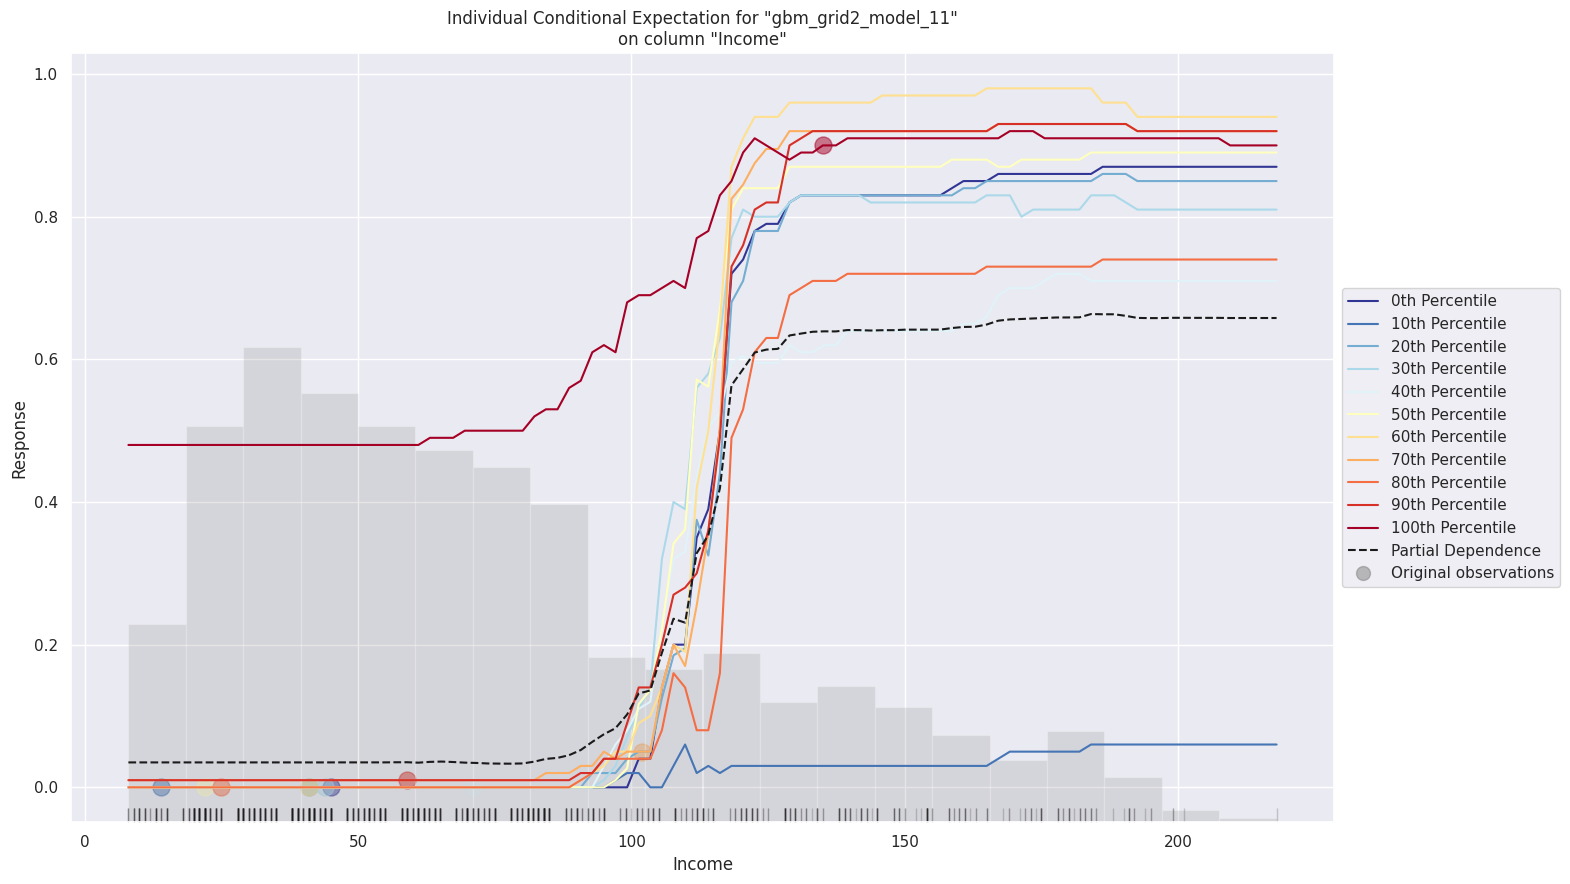

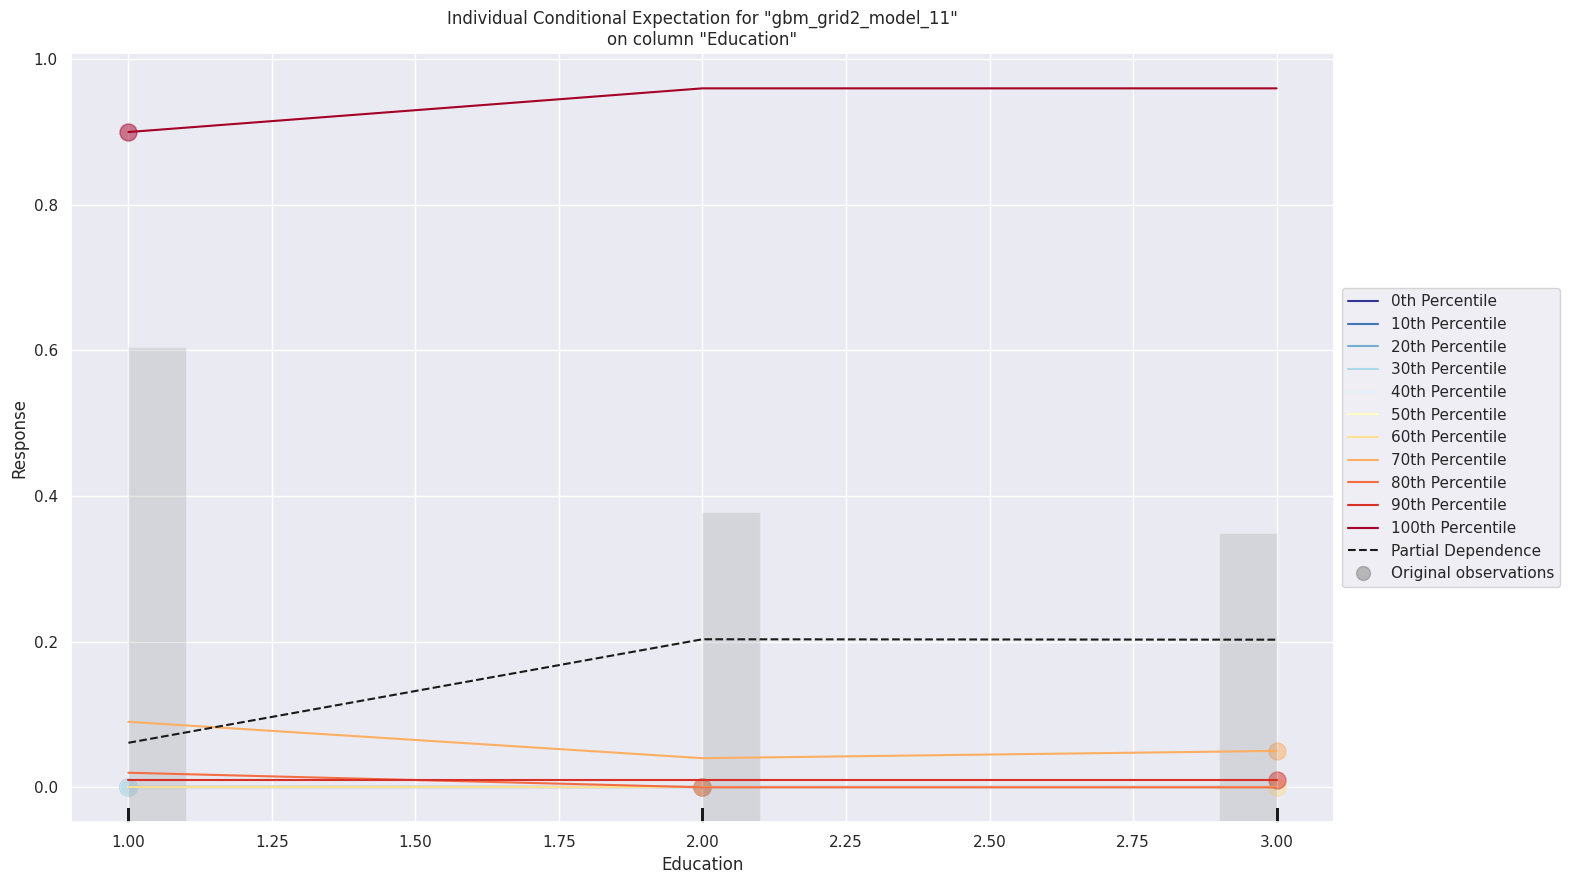

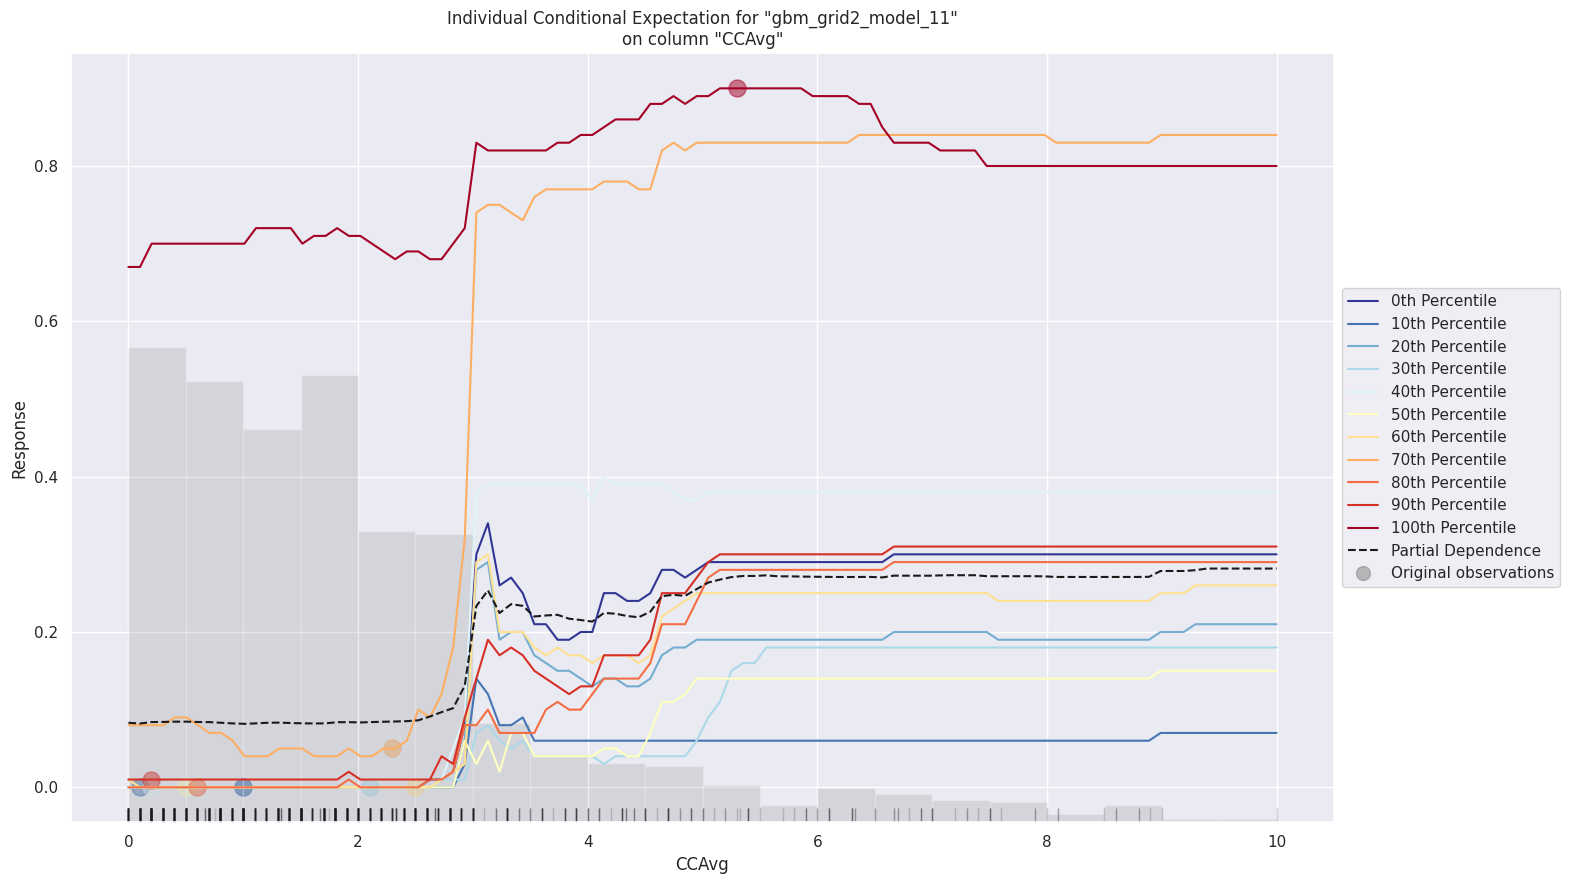

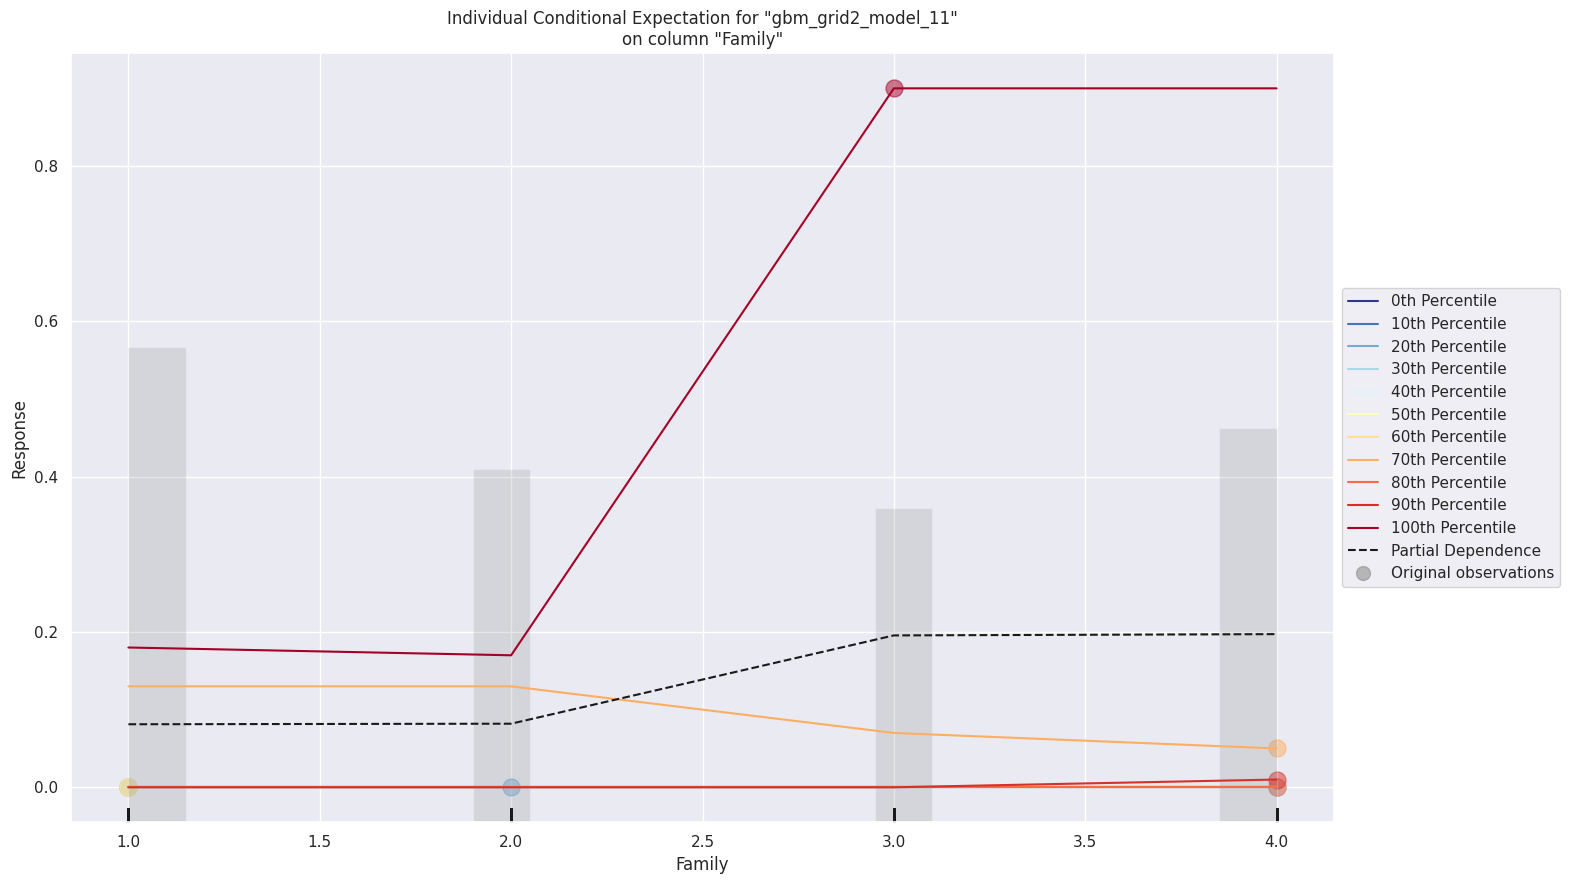

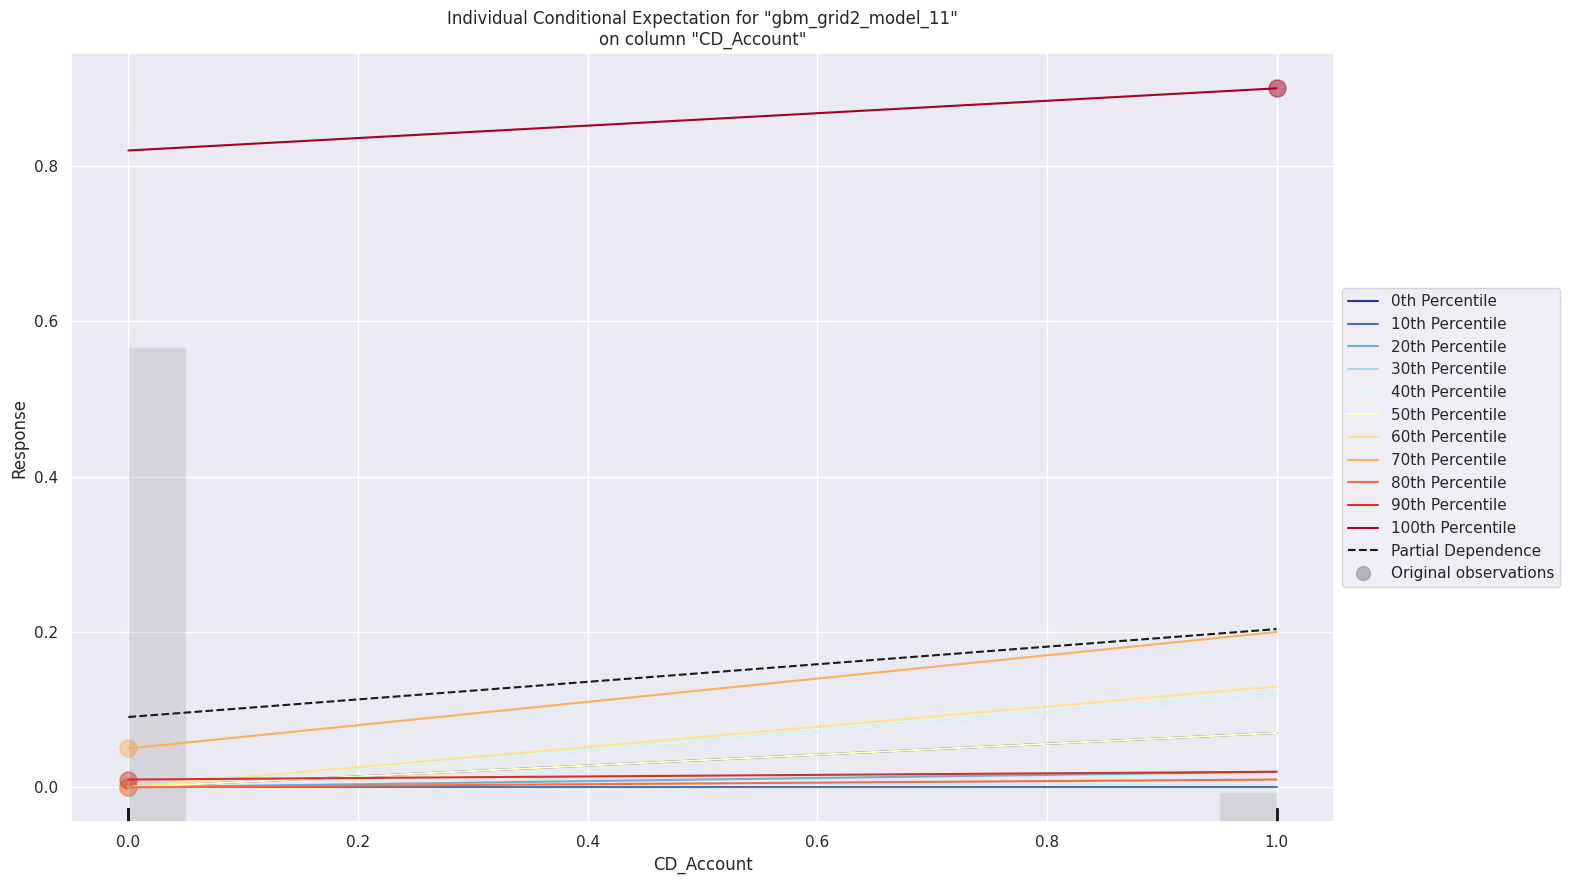

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [134]:
best_drf_model.explain(autoML[1])  # AutoML Explainability

# **Learning Outcomes**

1.I gained knowledge of the entire data science project lifecycle, starting with data preparation and ending with hyperparameter tuning.

2.The majority of the time should be used for data preparation, including cleaning, normalizing, choosing features, and imputation, among other things.

3.After data preparation, hyperparameter tuning is the second-most crucial step, which the majority of practitioners overlook. However, the outcome justifies the time spent.

4.The best models should be chosen to be deployed after multiple models have been trained, as some algorithms perform significantly better than others on certain tasks.

5.The assignment series' Model Interpretation (Unboxing the Black Blox) is the one that offers the most valuable lessons. Understanding what caused a model to accurately predict an outcome has been made simpler by SHAP, LIME, and PDP.

# **References**

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Full_ML_Report/Wine-Quality-Analysis.ipynb
